<a href="https://colab.research.google.com/github/nineMAN9/mh429-is465-/blob/master/is465HW-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work # 1

In [1]:
print('hello world')

hello world


Let's get started

In [0]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

let's import some packages

web mining basically is mining the text 
web mining will bring the future foundation of artificial intellgience to advancements unforeseen to the human eye

In [0]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

always rememember to define variables lol

In [4]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
print(n_samples)

2000


In [0]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

woah whered all that code come from ahaha no we like to have fun around here 

so basically Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
to filter out useless terms early on: the posts are stripped of headers,
footers and quoted replies, and common English words, words occurring in
only one document or in at least 95% of the documents are removed.


In [7]:
print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

Loading dataset...
done in 10.880s.


In [8]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
done in 0.347s.


In [9]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

Extracting tf features for LDA...
done in 0.355s.



In [10]:
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.388s.

Topics in NMF model (Frobenius norm):
Topic #0: just people don think like know time good make way really say right ve want did ll new use years
Topic #1: windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2: god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3: thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4: car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5: edu soon com send university internet mit ftp mail cc pub article information hope program mac email home contact blood
Topic #6: file problem files format win sound ftp pub read save sit

In [11]:
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 1.407s.

Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: people don just like think did say time make know really right said things way ve course didn question probably
Topic #1: windows help thanks using hi looking info video dos pc does anybody ftp appreciated mail know advance available use card
Topic #2: god does jesus true book christian bible christians religion faith believe life church christ says know read exist lord people
Topic #3: thanks know bike interested mail like new car edu heard just price list email hear want cars thing sounds reply
Topic #4: 10 00 sale time power 12 new 15 year 30 offer condition 14 16 model 11 monitor 100 old 25
Topic #5: space government number public data states earth security water research nasa general 1993 phone information science technology provide blood internet
Topic #6: edu file com 

had to fit some nmf models real quick on that last dipset
anyways for a streamlined help lets go over the first two which were different form of tf-idf features. one for nmf. one for lda.
thats raw

In [12]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 3.752s.

Topics in LDA model:
Topic #0: edu com mail send graphics ftp pub available contact university list faq ca information cs 1993 program sun uk mit
Topic #1: don like just know think ve way use right good going make sure ll point got need really time doesn
Topic #2: christian think atheism faith pittsburgh new bible radio games alt lot just religion like book read play time subject believe
Topic #3: drive disk windows thanks use card drives hard version pc software file using scsi help does new dos controller 16
Topic #4: hiv health aids disease april medical care research 1993 light information study national service test led 10 page new drug
Topic #5: god people does just good don jesus say israel way life know true fact time law want believe make think
Topic #6: 55 10 11 18 15 team game 19 period play 23 12 13 flyers 20 25 22 17 24 16
Topic #7: car year just cars new engine like bike good oil i

# **HOMEWORK** **#2**

Hey so you know add the wordlist and worldlist that detects the word frequency through BigString

In [0]:
wordlist = data_samples[0].split()
BigString = ''.join(BigString)
print (BigString)
wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))
str(list(zip(wordlist, wordfreq)))

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.







Yeah, do you expect people to read the FAQ, etc. and actually accept hard
atheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out
of steam!







Jim,

Sorry I can't pity you, Jim.  And I'm sorry that you have these feelings of
denial about the faith you need to get by.  Oh well, just pretend that it will
all end happily ever after anyway.  Maybe if you start a new newsgroup,
alt.atheist.hard, you won't be bummin' so much?






Bye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) 
--
Bake Timmons, IIIAlthough I realize that principle is not one of your strongest
points, I would still like to know why do do not ask any question
of this sort about the Arab countries.

   If you want to continue this think tank charade of yours, your
fixation on Israel must stop.  You might have to start asking the
same sort of questions of Arab countries as well.  You realize it
would not work, as the Arab countries' treatment of Jews over the
last several decades is so bad that your fixation on Israel would
begin to look like the biased attack that it is.

   Everyone in this group recognizes that your stupid 'Center for
Policy Research' is nothing more than a fancy name for some bigot
who hates Israel.Notwithstanding all the legitimate fuss about this proposal, how much
of a change is it?  ATT's last product in this area (a) was priced over
$1000, as I suspect 'clipper' phones will be; (b) came to the customer 
with the key automatically preregistered with government authorities. Thus,
aside from attempting to further legitimize and solidify the fed's posture,
Clipper seems to be "more of the same", rather than a new direction.
   Yes, technology will eventually drive the cost down and thereby promote
more widespread use- but at present, the man on the street is not going
to purchase a $1000 crypto telephone, especially when the guy on the other
end probably doesn't have one anyway.  Am I missing something?
   The real question is what the gov will do in a year or two when air-
tight voice privacy on a phone line is as close as your nearest pc.  That
has got to a problematic scenario for them, even if the extent of usage
never surpasses the 'underground' stature of PGP.Well, I will have to change the scoring on my playoff pool.  Unfortunately
I don't have time right now, but I will certainly post the new scoring
rules by tomorrow.  Does it matter?  No, you'll enter anyway!!!  Good!

--
    Keith Keller				LET'S GO RANGERS!!!!!
						LET'S GO QUAKERS!!!!!
	kkeller@mail.sas.upenn.edu		IVY LEAGUE CHAMPS!!!! 
 
I read somewhere, I think in Morton Smith's _Jesus the Magician_, that
old Lazarus wasn't dead, but going in the tomb was part of an initiation
rite for a magi-cult, of which Jesus was also a part.   It appears that
a 3-day stay was normal.   I wonder .... ?
Ok.  I have a record that shows a IIsi with and without a 64KB cache.
It's small enough that I will attach it.

I have also measured some real programs with and without the 64 KB
cache.  The speedup varies a lot from app to app, ranging from 0% to
40%.  I think an average of 20%-25% is about right.  The subjective
difference is not great, but is sometimes noticable.  A simple cache
card certainly does not transform a IIsi into something enormously
better.  I do not have an FPU.

The conventional wisdom says that cache cards from all of the makers
offer about the same speedup and that there is not much difference
between 32K and 64K caches.  I bought mine from Third Wave for well
under $150.  I have had absolutely no problems at all with it.

If you get *complete* speedometer runs for a 32K cache, I'd like to
see them.  Let's check the conventional wisdom!  The so called
"Performance Rating" numbers by themselves are of no interest. 

Cheers.

(This file must be converted with BinHex 4.0)
:#@0KBfKP,Q0`G!"338083e"$9!!!!!!'A!!!!!$qK3%"a+!!!!BGJ&CfGiGfH(H
)GhQ!QSQBUC!!@SQUU(QSCfPhGhL(H+HCL&KjQTU)LDH)HBL*UCUCJ!U@GQ9hGiK
hCAKR9SPiJ)QRQ)QUJ+N(J!UCLD#U#S!!S!QUUTQC#U#DL3J)#3LT#UU)QUUBUT!
!S!L3!!UU#!QJS+UT!!QJS*UD#TUUQCQ3!*!!UCFJ!!%c4ACSL'D)L)D!#!!)#!!
!!!!!!!!)!!!!!!!!J!B8*%9@9L0A"i!!G`!!G`B!!(J)"i###B!P[US),B")21Z
-1I"k-cQFM-VXMHhA!irdjPcVr,lUCVSZ2SI8j@,-l,jPI`F#lZq0A"AL8XRHjf,
6[LJ09"aZ2TV6l!$9lN@eAP@Rei8(VIpIQkfDK$-ZV[b+9[T5lkC0XZ6LGhf(Ik&
a$Lkh*Q6-qhh2MIlc*Q2Iq$p([GeSp(ejN!"bHMdHll$&Qh'lR`E26C2(QBqSrMM
pa-k()jPGXqcpR2rYR9eYd0,*Mh0,h1rj1*hA%pcLHRSG6PF2eIYmc4rIS60EFp+
CGE@Vr$[TRAFA(QkA`pG8JkS[@fe1mcBikFQC(,(9K[U&h""0rr"BDDT(i%XP3Z$
V04L8D82FeU01V4K-9U#JaD@1*fZa`EZr3-eGTYkNXH49SjF2Ei[G*5el3[VZ'j[
Vf($bTBHjlEX3Pe0KJ8,ZKH!9Cc3+fJ%kHGZC*BHhNV9+DC6Xd$[S58DFD"pJ%ei
q#CXHkEL`@d%&PYYY"1f0rG`jm0rJTCYMi4B1KbB'pUBQ)PU9'q"*m1miHG#YR`b
eUNG1'mSAP#mR`i-1*K`l[DiNq'MQjZA(,4bq"$*Mimq(KC9@@(-Mc'"f88e9U&0
F'Y4U5eXb("+6T8D@6(R3ae+10Padk"CAK!*Ea6SThLiA9HF!H&&Da@[,[2bA2!p
2VIr&TI)!6V`%S!*eJ#GS!Q!!QqD#2P!*M49m9IdHhm2frUq2Ek))G3e"Vi)+rQJ
C[`%m#+E&0jf"YI2ql`VI&0qHH!R[339`'9hY46)TR+ZkXI!pQRQKCU3%ed9R&Cr
!QCiUk+ZmEf)IYI&bqMEffkT5bB`JhYl2K[0PXVe0B@@2*@Uam121D`A`h+cC)Xl
IEjf8S+#9`a6[P8p0ZC&6H0ajcY1BR"JDM3`F%lJ1&5bI+SC2Jh([qeTfVK961rR
ZVIq[+Rb-TH3'B3f0r$h''cP%"UY1'jU53jY@5P(RCdPAXAfrl"Xrhf#Y"dmV1i$
9%Dm@T+f4NMlP5jd-XN0(K5C91'R@)4Qb9C5Ke1h%V-kiaRA-NTa`b9(YYL5TM5*
F2#bUFFLGJ%,D8QA*9R`eUQ29Sj!!p0b'"c5LEFR4@%9KpDGj1,bijhNaDH,6mrm
(3qpJITeraM0+0RHJ*aJ%f`#HJ!R4JJXDK22e!Cab5DK)jkRq0r[IcrC`[c!Krd(
$m1VrbJCX!NR)3FrcHYPk(r1CHJjiJ#Hk%'J84pq+#+$a2&r&bZ,Ff1V,-KG6qG9
MbmUPG9XkUeX$2Gl!Gl!Gl!GE!k5hrX(F4IX4IRNYkb"M%rSbN4`8m8qPq2rAd[j
FhRC#4(PeI2RFhY0+j-GH'!P*S)h!#HN!R6JJXb5f'b!clJkfb121qGm2MclEe,S
mHpf12b4arQ$Q%%PLK"q(8@I8[qRmmS5[l`"2fP!"4CpjY0,DDAp2AlE#eIPBD0c
rL1,PeXj39[%9k`HF4Z,ZKGN4h9A+b-T23l)RDf'a13X"'-#VbKJ[!9ME*!Tlp2-
QckRpM@J2e5BN*f&jHN*[Vp-#f+F(J)PQXJNlYRLpQ3C,%`Cm0l3E[MP"cXZ6`)B
mpVS0)P3Y@XTB5F5qaSr"XrmrZf1iLXSV,pPVjICFMRrekXdDI`0FHmT[Q!4VL`T
aalM336chGUr@"Me6YarIDI&Y2LpE9HPaI#fhNFmq$qLchVC(dUajJ%eb%(6NdIH
p#jqEd#X1cGDTVmDY965+@Pi,Mr1JeR&pq`q@"AacVkC[0lZi3-Z-5PZk8%f$Vrd
HfR&1mci,3&Nqh9r"e%"j5Ve$0rN`AbfB"Qqlk$C`3@LKQRh0(-MKhNYA+UC&Qhq
5kajHR1eFqR,2H5b8Z!SLfG3!!2TPmiF!!3!+58PcD5eMB@0SC3%!!!!)6@0S9(0
3C$1R$)JJT`b+33%!ADmicJ!#!!!4a3!!!!!!!!B9!!!!!,AP!!!:
-- 


Sounds like wishful guessing.




'So-called' ? What do you mean ? How would you see the peace process?

So you say palestineans do not negociate because of 'well-founded' predictions ?
How do you know that they are 'well founded' if you do not test them at the 
table ? 18 months did not prove anything, but it's always the other side at 
fault, right ?

Why ? I do not know why, but if, let's say, the Palestineans (some of them) want
ALL ISRAEL, and these are known not to be accepted terms by israelis.

Or, maybe they (palestinenans) are not yet ready for statehood ?

Or, maybe there is too much politics within the palestinean leadership, too many
fractions aso ?

I am not saying that one of these reasons is indeed the real one, but any of
these could make arabs stall the negotiations.

 
I like California oranges. And the feelings may get sharper at the table.



Regards, Nobody is saying that you shouldn't be allowed to use msg.  Just
don't force it on others. If you have food that you want to 
enhance with msg just put the MSG on the table like salt.  It is
then the option of the eater to use it.  If you make a commerical
product, just leave it out. You can include a packet (like some
salt packets) if you desire.

Salt, pepper, mustard, ketchup, pickles ..... are table options.
Treat MSG the same way.  I wouldn't shove my condiments down your
throat, don't shove yours down mine.

WFL

  I was wondering if anyone can shed any light on just how it is that these
electronic odometers remember the total elapsed mileage?  What kind of
memory is stable/reliable enough, non-volatile enough and independent enough
(of outside battery power) to last say, 10 years or more, in the life of a
vehicle?  I'm amazed that anything like this could be expected to work for
this length of time (especially in light of all the gizmos I work with that
are doing good to work for 2 months without breaking down somehow).

Side question:  how about the legal ramifications of selling a used car with
a replaced odometer that starts over at 0 miles, after say 100/200/300K
actual miles.  Looks like fraud would be fairly easy - for the price of a
new odometer, you can say it has however many miles you want to tell the
buyer it has.

Thanks for any insight.
Archive-name: graphics/resources-list/part1
Last-modified: 1993/04/17


Computer Graphics Resource Listing : WEEKLY POSTING [ PART 1/3 ]
===================================================
Last Change : 17 April 1993

Many FAQs, including this Listing, are available on the archive site
pit-manager.mit.edu (alias rtfm.mit.edu) [18.172.1.27] in the directory
pub/usenet/news.answers.  The name under which a FAQ is archived appears
in the Archive-name line at the top of the article.
This FAQ is archived as graphics/resources-list/part[1-3]

There's a mail server on that machine. You send a e-mail message to
mail-server@pit-manager.mit.edu  containing the keyword "help" (without
quotes!) in the message body.

You can see in many other places for this Listing. See the item:

0. Places to find the Resource Listing

for more information.

Items Changed:
--------------

RE-ARRANGED the subjects, in order to fir better in the 63K/article limit.
I PLAN ON CHANGING HEADERS SOON, SO BE CAREFUL! ONLY THE "Resource Listing"
keys are sure to remain in the Subject: line!

0. Places to find the Resource Listing
6.  3D graphics editors
   a. Public domain, free and shareware systems
9. Plotting packages
18. Molecular visualization stuff

[ I'm thinking of making this post bi-weekly. What do you think??? ]

--------------

Lines which got changed, have the `#' character in front of them.
Added lines are prepended with a `+'
Removed lines are just removed. Use 'diff' to locate these changes.

========================================================================

This text is (C)Copyright 1992, 1993 of Nikolaos C. Fotis. You can copy
freely this file, provided you keep this copyright notice intact.

Compiled by Nikolaos (Nick) C. Fotis, e-mail: nfotis@theseas.ntua.gr

Please contact me for updates,corrections, etc.

Disclaimer: I do not guarantee the accuracy of this document.
Use it at your own risk.

========================================================================

This is mainly a guide for computer graphics software.
I would suggest reading the Comp. Graphics FAQ for image analysis stuff.

It's entitled: 
 (date) comp.graphics Frequently Asked Questions (FAQ)

 John T. Grieggs <grieggs@jpl-devvax.jpl.nasa.gov> is the poster of the
 official comp.graphics FAQ

I have included my comments within braces '[' and ']'.

Nikolaos Fotis

========================================================================

Contents of the Resource Listing
================================

PART1:
------
0. Places to find the Resource Listing
1. ARCHIE
2. Notes
3. Computer graphics FTP site list, by Eric Haines
4. Mail servers and graphics-oriented BBSes
5. Ray-tracing/graphics-related mailing lists.
6.  3D graphics editors
   a. Public domain, free and shareware systems
   b. Commercial systems
7. Scene description languages
8. Solids description formats

PART2:
------

9. Plotting packages
10. Image analysis software - Image processing and display

PART3:
------
11. Scene generators/geographical data/Maps/Data files
12. 3D scanners - Digitized 3D Data.
13. Background imagery/textures/datafiles
14. Introduction to rendering algorithms
   a. Ray tracing
   b. Z-buffer (depth-buffer)
   c. Others
15. Where can I find the geometric data for the:
   a. Teapot ?
   b. Space Shuttle ?
16. Image annotation software
17. Scientific visualization stuff
18. Molecular visualization stuff
19. GIS (Geographical Information Systems software)

Future additions:
[Please send me updates/info!]

========================================================================

0. Places to find the Resource Listing
======================================

#This file is crossposted to comp.graphics, comp.answers and news.answers,
so if you can't locate it in comp.graphics, you're advised to search in
#comp.answers or news.answers
(The latter groups usually are archived in your site. Contact your sysadmin
for more info).

These 3 articles are posted to comp.graphics 3-4 times a month and are kept in
many places (see below)

--

Many FAQs, including this one, are available on the archive site
pit-manager.mit.edu (alias rtfm.mit.edu) [18.172.1.27] in the directory
pub/usenet/news.answers.  The name under which a FAQ is archived appears
in the Archive-name line at the top of the article.
This FAQ is archived as graphics/resources-list/part[1-3]

There's a mail server on that machine. You send a e-mail message to
mail-server@pit-manager.mit.edu  containing: help in the Subject: field

--

The inria-graphlib mail server mirrors this posting (see under the
Subject 4: Mail servers )

--

The Resource Listing is accesible through WAIS in the machine
enuxva.eas.asu.edu (port 8000) under the name graphics-resources-list.
It's got a digest-type line before every numbered item for purposes of
indexing.

--

Another place that monitors the Listing is the MaasInfo files.
For more info contact Robert E. Maas <rem@btr.com>

--

Yet another place to search for FAQs in general is the SWITCH
(Swiss Academic and Research Network) system in Switzerland:

interactive:
  telnet nic.switch.ch [130.59.1.40], login as "info". Move to the
  info_service/Usenet/periodic-postings directory. Search in the
  00index file by typing "/" and the word to look for.
  You may then just read the FAQ in the "faqs" directory, or decide
  to fetch it by one of the following methods.

ftp:
  login to nic.switch.ch [130.59.1.40] as user anonymous and
  enter your internet-style address after being prompted for a
  password.

	cd info_service/Usenet/periodic-postings

mail:
  send e-mail to

RFC-822:
   archive-server@nic.switch.ch
X.400:
  /S=archive-server/OU=nic/O=switch/PRMD=switch/ADMD=arcom/C=ch/

Enter 'help' in the bodypart to receive instructions. No information
is required in the subject header line.


1. ARCHIE
=========

The Archie is a service system to locate FTP places for
requested files. It's appreciated that you will use Archie
before asking help in the newsgroups.

Archie servers:
  archie.au or 139.130.4.6             (Aussie/NZ)
  archie.funet.fi or 128.214.6.100  (Finland/Eur.)
  archie.th-darmstadt.de or 130.83.128.111  (GER.)
  cs.huji.ac.il or 132.65.6.5             (Israel)
  archie.kuis.kyoto-u.ac.jp or 130.54.20.1 (JAPAN)
  archie.sogang.ac.kr or 163.239.1.11      (Korea)
  archie.ncu.edu.tw or telnet 140.115.19.24  (TWN)
  archie.doc.ic.ac.uk or 146.169.3.7  (UK/Ireland)
  archie.sura.net or 128.167.254.179    (USA [MD])
  archie.unl.edu (password: archie1)    (USA [NE])
  archie.ans.net or 147.225.1.2         (USA [NY])
  archie.rutgers.edu or 128.6.18.15     (USA [NJ])
  archie.nz or 130.195.9.4           (New Zealand)

Connect to Archie server with telnet and type "archie" as username.
To get help type 'help'.
You can get 'xarchie' or 'archie', which are clients that call Archie
without the burden of a telnet session.
'Xarchie' is on the X11.R5 contrib tape, and 'archie' on comp.sources.misc,
vol. 27.

To get information on how to use Archie via e-mail, send mail with
subject "help" to "archie" account at any of above sites.

(Note to Janet/PSS users -- the United Kingdom archie site is
accessible on the Janet host doc.ic.ac.uk [000005102000].
Connect to it and specify "archie" as the host name and "archie" as
the username.)

==========================================================================

2. Notes
========
(Excerpted from the FAQ article)

Please do *not* post or mail messages saying "I can't FTP, could
someone mail this to me?"  There are a number of automated mail servers
that will send you things like this in response to a message.

There are a number of sites that archive the Usenet sources newsgroups
and make them available via an email query system.  You send a message
to an automated server saying something like "send comp.sources.unix/fbm",
and a few hours or days later you get the file in the mail.

==========================================================================

3. Computer graphics FTP site list, by Eric Haines
==================================================

Computer graphics related FTP sites (and maintainers), 26/03/93
	compiled by Eric Haines, erich@eye.com
	and Nick Fotis, nfotis@theseas.ntua.gr

Ray-tracers:
------------

RayShade - a great ray tracer for workstations on up, also for PC, Mac & Amiga.
PoV - son and successor to DKB trace, written by Compuservers.
	(For more questions call Drew Wells --
	73767.1244@compuserve.com or Dave Buck -- david_buck@carleton.ca)
ART - ray tracer with a good range of surface types, part of VORT package.
DKBtrace - another good ray tracer, from all reports; PCs, Mac II,
	Amiga, UNIX, VMS (last two with X11 previewer), etc.
RTrace - Portugese ray tracer, does bicubic patches, CSG, 3D text, etc. etc.
	An MS-DOS version for use with DJGPP DOS extender (GO32) exists also,
	as a Mac port.
VIVID2 - A shareware raytracer for PCs - binary only (286/287).  Author:
	Stephen Coy (coy@ssc-vax.boeing.com).  The 386/387 (no source) version
	is available to registered users (US$50) direct from the author.
RAY4 - Steve Hollasch's 4-dimensional ray tracer - renders hyperspheres,
	hypertetrahedra, hyperplanes, and hyperparallelepipeds (there's
	a separate real-time wireframe viewer written in GL called WIRE4 ) .
MTV,QRT,DBW - yet more ray tracers, some with interesting features.

Distributed/Parallel Raytracers:
--------------------------------

XDART - A distributed ray-tracer that runs under X11. There are server binaries
	which work only on DECstations, SPARCs, HP Snakes (7x0 series) and NeXT.
	The clients are distributed as binaries and C source.
Inetray - A network version of Rayshade 4.0.  Needs Sun RPC 4.0 or newer.
	Contact Andreas Thurnherr (ant@ips.id.ethz.ch)
prt, VM_pRAY - parallel ray tracers.

Volume renderers:
-----------------

VREND - Cornell's Volume Renderer, from Kartch/Devine/Caffey/Warren (FORTRAN).

Radiosity (and diffuse lighting) renderers:
-------------------------------------------

Radiance - a ray tracer w/radiosity effects, by Greg Ward.  Excellent shading
	models and physically based lighting simulation.  Unix/X based, though
	has been ported to the Amiga and the PC (386).
INDIA - An Indian radiosity package based on Radiance.
SGI_RAD - An interactive radiosity package that runs on SGI machines with a
	Spaceball. It includes a house database.
	Author: Guy Moreillon <moreillo@ligsg1.epfl.ch>
RAD - a simple public-domain radiosity package in C. The solution can be run
	stand-alone on any Unix box, but the walk-through requires a SGI 4D.
	Author: Bernard Kwok <g-kwok@cs.yorku.ca>

Renderers which are not raytracers, and graphics libraries:
-----------------------------------------------------------

SIPP - Scan line z-buffer and Phong shading renderer.
	Now uses the shadow buffer algorithm.
Tcl-SIPP - a Tcl command interface to the SIPP rendering
	program. Tcl-SIPP is a set of Tcl commands used to programmed
	SIPP without having to write and compile C code.
	Commands are used to specify surfaces, objects,
	scenes and rendering options.
	It renders either in PPM format or in Utah Raster Toolkit RLE format
	or to the photo widget in the Tk-based X11 applications.

VOGLE - graphics learning environment (device portable).
VOGL - an SGI GL-like library based on VOGLE.
REND386 - A *fast* polygon renderer for Intel 386s and up. Version 2 on up.
	[ It's not photorealistic, but rather a real-time renderer]
XSHARP21 - Dr. Dobb's Journal PC renderer source code, with budget texture
	mapping.

Modellers, wireframe viewers:
-----------------------------

VISION-3D - Mac modeler, can output Radiance & Rayshade files.
IRIT - A CSG solid modeler, with support for freeform surfaces.
X3D - A wireframe viewer for X11.
3DV - 3-D wireframe graphics toolkit, with C source, 3dv objects, other stuff
	Look at major PC archives like wuarchive. One such file is 3DKIT1.ZIP
PV3D - a shareware front end modeler for POVRAY, still in beta test.
  French docs for now, price for registering 250 French Francs. Save disabled.
  Some extra utilities, DXF files for the registered version.

Geometric viewers:
------------------

SALEM - A GL-based package from Dobkin et al. for exploring mathematical
	structures.
GEOMVIEW - A GL-based package for looking and interactively manipulating
3D objects, from Geometry Center at Minnesota.
XYZ GeoBench -(eXperimental geometrY Zurich) is a workbench for geometric
	computation for Macintosh computers.
WIRE4 - GL wireframe previewer for Steve Hollasch's RAY4 (see above)

Data Formats and Data Sets for Ray Tracing:
-------------------------------------------

SPD - a set of procedural databases for testing ray tracers.
NFF - simplistic file format used by SPD.
OFF - another file format.
P3D - a lispy file format.
TDDD - Imagine (3D modeler) format, has converters for RayShade, NFF, OFF, etc.
	Also includes a nice postscript object displayer.  Some GREAT models.
TTDDDLIB - converts to/from TDDD/TTDDD, OFF, NFF, Rayshade 4.0, Imagine,
	and vort 3d objects. Also outputs Framemaker MIF files and isometric
	views in Postscript. Registered users get a TeX PK font converter and
	a superquadric surfaces generator.
	Glenn Lewis <glewis@pcocd2.intel.com>
	[Note : TTDDDLIB is also known as T3DLIB]
CHVRTD - Chapel Hill Volume Rendering Test Datasets, includes volume sets for
	two heads, a brain, a knee, electron density maps for RNA and others.

Written Material on Rendering:
------------------------------

RT News - collections of articles on ray tracing.
RT bib - references to articles on ray tracing in "refer" format.
Rad bib - references to articles on radiosity (global illumination).
Speer RT bib - Rick Speer's cross-referenced RT bib, in postscript.
RT abstracts - collection by Tom Wilson of abstracts of many RT articles.
Paper bank project - various technical papers in electronic form.  Contact
	Juhana Kouhia <jk87377@cs.tut.fi>
Online Bibliography Project :
        The ACM SIGGRAPH Online Bibliography Project is a database of 
        over 15,000 unique computer graphics and computational geometry
        references in BibTeX format, available to the computer graphics
        community as a research and educational resource.

        The database is located at "siggraph.org".  Users may download 
        the BibTeX files via FTP and peruse them offline, or telnet to
        "siggraph.org" and log in as "biblio" and interactively search
        the database for entries of interest, by keyword.
        For the people without Internet access, there's also an e-mail
        server. Send mail to

        archive-server@siggraph.org

        and in the subject or the body of the message include the message  send
        followed by the topic and subtopic you wish. A good place to start is
        with the command
             send index
        which will give you an up-to-date list of available information.

        Additions/corrections/suggestions may be directed to the admin,
        "bibadmin@siggraph.org".

Image Manipulation Libraries:
-----------------------------

Utah Raster Toolkit - nice image manipulation tools.
PBMPLUS - a great package for image conversion and manipulation.
LIBTIFF - library for reading/writing TIFF images.
ImageMagick - X11 package for display and interactive manipulation
	of images.  Uses its own format (MIFF), and includes some converters.
xv - X-based image display, manipulation, and format converter.
xloadimage, xli - displays various formats on an X11 screen.
Khoros - a huge, excellent system for image processing, with a visual
	programming interface and much much more.  Uses X windows.
FBM - another set of image manipulation tools, somewhat old now.
Img - image manipulation, displays on X11 screen, a bit old now.
xflick - Plays .FLI animation under X11
XAnim - plays any resolution FLI along with GIF's(including GIF89a animation
	extensions), DL's and Amiga IFF animations(3,5,J,l) and IFF
	pictures(including HAM,EHB and color cycling)
SDSC - SDSC Image Tools package (San Diego Supercomputing Center)
	for image manipulation and conversion
CLRpaint - A 24-bit paint program for SGI 24bit workstations and 8bit Indigos.

Libraries with code for graphics:
---------------------------------

Graphics Gems I,II,III - code from the ever so useful books.
spline-patch.tar.Z - spline patch ray intersection routines by Sean Graves
kaleido - Computation and 3D Display of Uniform Polyhedra. Mirrored in
	wuarchive. This package computes (and displays) the metrical
	properties of 75 polyhedra. Author: Dr. Zvi Har'El,
	e-mail: rl@gauss.technion.ac.il

(*) means site is an "official" distributor, so is most up to date.


NORTH AMERICA (please look for things on your own continent first...):
-------------

wuarchive.wustl.edu [128.252.135.4]:  /graphics/graphics - get CONTENTS file
	for a roadmap.  /graphics/graphics/objects/TDDD - *the TTDDD objects
	and converters*, /mirrors/unix-c/graphics - Rayshade ray tracer, MTV
	ray tracer, Vort ray tracer, FBM, PBMPLUS, popi, Utah raster toolkit.
	/mirrors/msdos/graphics - DKB ray tracer, FLI RayTracker demos.
	/pub/rad.tar.Z - *SGI_RAD*, /graphics/graphics/radiosity - Radiance
	and Indian radiosity package.  /msdos/ddjmag/ddj9209.zip - version 21
	of Xsharp, with fast texture mapping.  There's lots more, including
	bibs, Graphics Gems I & II code, OFF, RTN, Radiance, NFF, SIPP, spline
	patch intersection routines, textbook errata, source code from Roy
	Hall's book "Illumination and Color in Computer Generated Imagery", etc
	graphics/graphics/packages/kaleido - *kaleido*
	George Kyriazis <kyriazis@turing.cs.rpi.edu>

princeton.edu [128.112.128.1]:  /pub/Graphics (note capital "G") - *Rayshade
	4.0 ray tracer (and separate 387 executable)*, *color quantization
	code*, *SPD*, *RT News*, *Wilson's RT abstracts*, "RT bib*, *Utah
	Raster Toolkit*, newer FBM, *Graphics Gems I, II & III code*.
	/pub/graphics directory - *SALEM* and other stuff.
	Craig Kolb <cek@princeton.edu>
	[replaces weedeater.math.yale.edu - note the capital "G" in
	pub/Graphics] Because there's a trouble with princeton's incoming
	area, you can upload Rayshade-specific stuff to
	weedeater.math.yale.edu [128.36.23.17]

alfred.ccs.carleton.ca [134.117.1.1]:  /pub/dkbtrace - *DKB ray tracer*,
	/pub/pov-ray/POV-Ray1.0 - *PVRay Compuserve group ray tracer (or PoV)*.
	David Buck <david_buck@carleton.ca>

avalon.chinalake.navy.mil [129.131.31.11]:  3D objects (multiple formats),
	utilities, file format documents.
	This site was created to be a 3D object "repository" for the net.
	Francisco X DeJesus <dejesus@archimedes.chinalake.navy.mil>

omicron.cs.unc.edu [152.2.128.159]:  pub/softlab/CHVRTD - Chapel Hill
	Volume Rendering Test Datasets.

ftp.mv.com [192.80.84.1]: - Official DDJ FTP repository.
	*XSHARP*

peipa.essex.ac.uk [155.245.115.161]: the Pilot European Image Processing
	Archive; in a directory ipa/synth or something like that, there are
	image synthesis packages.
	Adrian Clarke <alien@essex.ac.uk>

barkley.berkeley.edu [128.32.142.237] : tcl/extensions/tsipp3.0b.tar.Z -
	*Tcl-SIPP*
	Mark Diekhans <markd@grizzly.com or markd@NeoSoft.com>

acs.cps.msu.edu [35.8.56.90]: pub/sass - *X window fonts converter into
	Rayshade 3.0 polygons*, Rayshade animation tool(s).
	Ron Sass <sass@cps.msu.edu>

hobbes.lbl.gov [128.3.12.38]: *Radiance* ray trace/radiosity package.
	Greg Ward <gjward@lbl.gov>

geom.umn.edu [128.101.25.31] : pub/geomview - *GEOMVIEW*
	Contact (for GEOMVIEW): software@geom.umn.edu

ftp.arc.umn.edu [137.66.130.11] : pub/gvl.tar.Z - the latest version of Bob,
	Icol and Raz.  Source, a manual, man pages, and binaries for
	IRIX 4.0.5 are included (Bob is a real time volume renderer)
	pub/  contains also many volume datasets.
	Ken Chin-Purcell <ken@ahpcrc.umn.edu>

ftp.kpc.com [144.52.120.9] : /pub/graphics/holl91 - Steve Hollasch's
	Thesis, /pub/graphics/ray4 - *RAY4*, /pub/graphics/wire4 - *WIRE4*.
	/pub/mirror/avalon - mirror of avalon's 3D objects repository.
	Steve Hollasch <hollasch@kpc.com>

swedishchef.lerc.nasa.gov [139.88.54.33] : programs/hollasch-4d - RAY4,
	SGI Explorer modules and Postscript manual, etc.

zamenhof.cs.rice.edu [128.42.1.75] : pub/graphics.formats - Various electronic
	documents about many object and image formats.
	Mark Hall <foo@cs.rice.edu>
	will apparently no longer be maintaining it, see ftp.ncsa.uiuc.edu.

rascal.ics.utexas.edu [128.83.144.1]:  /misc/mac/inqueue - VISION-3D facet
	based modeller, can output RayShade and Radiance files.

ftp.ncsa.uiuc.edu [141.142.20.50] :  misc/file.formats/graphics.formats -
	contains various image- and object-format descriptions.  Many SciVi
	tools in various directories, e.g.  SGI/Alpha-shape/Alvis-1.0.tar.Z -
	3D alpha-shape visualizer (SGI machines only),
	SGI/Polyview3.0/polyview.Z - interactive visualization and analysis of
	3D geometrical structures.
	Quincey Koziol <koziol@ncsa.uiuc.edu>

tucana.noao.edu [140.252.1.1] : /iraf - the IRAF astronomy package

ftp.ipl.rpi.edu [128.113.14.50]:  sigma/erich - SPD images and Haines thesis
	images.  pub/images - various 24 and 8 bit image stills and sequences.
	Kevin Martin <sigma@ipl.rpi.edu>

ftp.psc.edu [128.182.66.148]:  pub/p3d - p3d_2_0.tar P3D lispy scene
	language & renderers.  Joel Welling <welling@seurat.psc.edu>

ftp.ee.lbl.gov [128.3.254.68]: *pbmplus.tar.Z*, RayShade data files.
	Jef Poskanzer <jef@ace.ee.lbl.gov>

george.lbl.gov [128.3.196.93]: pub/ccs-lib/ccs.tar.Z - *CCS (Complex
	Conversion System), a standard software interface for image processing*

hanauma.stanford.edu [36.51.0.16]: /pub/graphics/Comp.graphics - best of
	comp.graphics (very extensive), ray-tracers - DBW, MTV, QRT, and more.
	Joe Dellinger <joe@hanauma.stanford.edu>

ftp.uu.net [192.48.96.2]:  /graphics - *IRIT*, RT News back issues (not
	complete), NURBS models, other graphics related material.
	/graphics/jpeg/jpegsrc.v?.tar.Z - Independent JPEG Group package for
	reading and writing JPEG files.

freebie.engin.umich.edu [141.212.68.23]:  *Utah Raster Toolkit*,
	Spencer Thomas <thomas@eecs.umich.edu>

export.lcs.mit.edu [18.24.0.12] : /contrib - pbmplus, Image Magick, xloadimage,
	xli, xv, Img, lots more.  /pub/R5untarred/mit/demos/gpc - NCGA Graphics
	Performance Characterization (GPC) Suite.

life.pawl.rpi.edu [128.113.10.2]: /pub/ray - *Kyriazis stochastic Ray Tracer*.
	George Kyriazis <kyriazis@turing.cs.rpi.edu>

cs.utah.edu [128.110.4.21]: /pub - Utah raster toolkit, *NURBS databases*.
	Jamie Painter <jamie@cs.utah.edu>

gatekeeper.dec.com [16.1.0.2]:  /pub/DEC/off.tar.Z - *OFF models*,
	Also GPC Benchmark files (planned, but not checked).
	Randi Rost <rost@kpc.com>

hubcap.clemson.edu [130.127.8.1]:  /pub/amiga/incoming/imagine - stuff for the
	Amiga Imagine & Turbo Silver ray tracers.  /pub/amiga/TTDDDLIB -
	*TTDDDLIB* /pub/amiga/incoming/imagine/objects - MANY objects.
	Glenn Lewis <glewis@pcocd2.intel.com>

pprg.eece.unm.edu [129.24.24.10]:  /pub/khoros - *Khoros image processing
	package (huge, but great)*.
	Danielle Argiro <danielle@bullwinkle.unm.edu>

expo.lcs.mit.edu [18.30.0.212]:  contrib - *PBMPLUS portable bitmap package*,
	*poskbitmaptars bitmap collection*, *Raveling Img*, xloadimage.  Jef
	Poskanzer <jef@well.sf.ca.us>

venera.isi.edu [128.9.0.32]:  */pub/Img.tar.z and img.tar.z - some image
	manipulation*, /pub/images - RGB separation photos.
	Paul Raveling <raveling@venera.isi.edu>

ucsd.edu [128.54.16.1]:  /graphics - utah rle toolkit, pbmplus, fbm,
	databases, MTV, DBW and other ray tracers, world map, other stuff.
	Not updated much recently.

castlab.engr.wisc.edu [128.104.52.10]:  /pub/x3d.2.2.tar.Z - *X3D*
	/pub/xdart.1.1.* - *XDART*
	Mark Spychalla <spy@castlab.engr.wisc.edu>

sgi.com [192.48.153.1]:  /graphics/tiff - TIFF 6.0 spec & *LIBTIFF* software
	and pics.  Also much SGI- and GL-related stuff (e.g. OpenGL manuals)
	Sam Leffler <sam@sgi.com>
	[supercedes okeeffe.berkeley.edu for the LIBTIFF stuff]

surya.waterloo.edu [129.97.129.72]: /graphics - FBM, ray tracers

ftp.sdsc.edu [132.249.20.22]: /sdscpub - *SDSC*

ftp.brl.mil [128.63.16.158]: /brl-cad - information on how to get the
	BRL CAD package & ray tracer.  /images - various test images.
	A texture library has also begun here.
	Lee A. Butler <butler@BRL.MIL>

cicero.cs.umass.edu [128.119.40.189]:  /texture_temp - 512x512 grayscale
	Brodatz textures,
	from Julien Flack <julien@scs.leeds.ac.uk>.

karazm.math.uh.edu [129.7.7.6]:  pub/Graphics/rtabs.shar.12.90.Z - *Wilson's
	RT abstracts*, VM_pRAY.
	J. Eric Townsend <jet@karazm.math.uh.edu or jet@nas.nasa.gov>

ftp.pitt.edu [130.49.253.1]:  /users/qralston/images - 24 bit image archive
	(small).  James Ralston Crawford <qralston@gl.pitt.edu>

ftp.tc.cornell.edu [128.84.201.1]: /pub/vis - *VREND*

sunee.waterloo.edu [129.97.50.50]: /pub/raytracers - vivid, *REND386*
	[or sunee.uwaterloo.ca]

archive.umich.edu [141.211.164.153]: /msdos/graphics - PC graphics stuff.
	/msdos/graphics/raytrace - VIVID2.

apple.apple.com [130.43.2.2?]:  /pub/ArchiveVol2/prt.

research.att.com [192.20.225.2]: /netlib/graphics - *SPD package*, ~/polyhedra -
	*polyhedra databases*.  (If you don't have FTP, use the netlib
	automatic mail replier:  UUCP - research!netlib, Internet -
	netlib@ornl.gov.  Send one line message "send index" for more info,
	"send haines from graphics" to get the SPD)

siggraph.org [128.248.245.250]: SIGGRAPH archive site.
	publications - *Online Bibliography Project*, Conference proceedings
	in various electronic formats (papers, panels), SIGGRAPH Video Review
	information and order forms.
	Other stuff in various directories.
	Automatic mailer is archive-server@siggraph.org ("send index").

ftp.cs.unc.edu [128.109.136.159]: pub/reaction_diffusion - Greg Turk's work on
	reaction-diffusion textures, X windows code (SIGGRAPH '91)

avs.ncsc.org [128.109.178.23]:  ~ftp/VolVis92 - Volume datasets from the
	Boston Workshop on Volume Visualization '92.  This site is also the
	International AVS Center.
	Terry Myerson <tvv@ncsc.org>

uvacs.cs.virginia.edu [128.143.8.100]:  pub/suit/demo/{sparc,dec,etc} - SUIT
	(Simple User Interface Toolkit).  "finger suit@uvacs.cs.virginia.edu"
	to get detailed instructions.

nexus.yorku.ca [130.63.9.66]: /pub/reports/Radiosity_code.tar.Z - *RAD*
	/pub/reports/Radiosity_thesis.ps.Z - *RAD MSc. Thesis*
	[This site will be changed to ftp.yorku.ca in the near future]

milton.u.washington.edu [128.95.136.1] - ~ftp/public/veos - VEOS Virtual
	Reality and distributed applications prototyping environment
	for Unix. Veos Software Support : veos-support@hitl.washington.edu
        oldpublic/fly - FLY! 3D Visualization Software demo.
        That package is built for "fly-throughs" from various datasets in
        near real-time. There are binaries for many platforms.
	Also, much other Virtual Reality stuff.

zug.csmil.umich.edu [141.211.184.2]: X-Xpecs 3D files (an LCD glass shutter
	for Amiga computers - great for VR stuff!)

sugrfx.acs.syr.edu [128.230.24.1]: Various stereo-pair images.
[ Has closed down :-( ]

sunsite.unc.edu [152.2.22.81]: /pub/academic/computer-science/virtual-reality -
	Final copy of the sugrfx.acs.syr.edu archive that ceased to exist.
	It contains Powerglove code, VR papers, 3D images and IRC research
	material.
	Jonathan Magid <jem@sunSITE.unc.edu>

archive.cis.ohio-state.edu [128.146.8.52]: pub/siggraph92 - Code for
	Siggraph '92 Course 23 (Procedural Modeling and Rendering Techniques)
	Dr. David S. Ebert <ebert@cis.ohio-state.edu>

lyapunov.ucsd.edu [132.239.86.10]: This machine is considered the
	repository for preprints and programs for nonlinear dynamics,
	signal processing, and related subjects  (and fractals, of course!)
	Matt Kennel <mbk@inls1.ucsd.edu>

cod.nosc.mil [128.49.16.5]: /pub/grid.{ps,tex,ascii} - a short survey of
	methods to interpolate and contour bivariate data

ics.uci.edu [128.195.1.1]: /honig --- Various stereo-pair images,
	movie.c - animates a movie on an X display (8-bit and mono) with
	digital subtraction.

taurus.cs.nps.navy.mil [131.120.1.13]: pub/dabro/cyberware_demo.tar.Z - Human
	head data

pioneer.unm.edu [129.24.9.217]:  pub/texture_maps - Hans du Buf's grayscale
	test textures (aerial swatches, Brodatz textures, synthetic swatches).
	Space & planetary image repository.  Provides access to >150 CD-ROMS
	with data/images (3 on-line at a time).
        pub/info/beginner-info - here you should start browsing.
        Colby Kraybill <opus@pioneer.unm.edu>.

cs.brown.edu [128.148.33.66] : *SRGP/SPHIGS* . For more info on SRGP/SPHIGS:
         mail -s 'software-distribution' graphtext@cs.brown.edu

pdb.pdb.bnl.gov [130.199.144.1] has data about various organic molecules,
       bonds between the different atoms, etc.
       Atomic coordinates (and a load of other stuff) are contained in the
       "*.ent" files, but the actual atomic dimemsions seem to be missing.
       You could convert these data to PoV, rayshade, etc.

biome.bio.ns.ca [142.2.20.2] : /pub/art - some Renoir paintings,
        Escher's pictures, etc.

ic16.ee.umanitoba.ca [] : /specmark - sample set of images from the
        `Images from the Edge' CD-ROM (images of atomic landscapes, advanced
        semiconductors, superconductors and experimental surface
        chemistry among others). Contact ruskin@ee.umanitoba.ca

explorer.dgp.toronto.edu [128.100.1.129] : pub/sgi/clrpaint - *CLRpaint*
        pub/sgi/clrview.* - CLRview, a tool that aids in visualization
        of GIS datasets in may formats like DXF, DEM, Arc/Info, etc.

ames.arc.nasa.gov [128.102.18.3]: pub/SPACE/CDROM - images from Magellan
        and Viking missions etc. Get pub/SPACE/Index first.
        pub/SPACELINK has most of the SpaceLink service data (see below)
        e-mail server available: send mail to archive-server@ames.arc.nasa.gov
        (or ames!archive-server) with subject:"help"
        or "send SPACE Index" (without the quotes!)
        Peter Yee <yee@ames.arc.nasa.gov>

pubinfo.jpl.nasa.gov [128.149.6.2]: images, other data, etc. from JPL
        missions. Modem access at (818)-354-1333 (no parity, 8 data bits, 1
        stop bit).
        newsdesk@jplpost.jpl.nasa.gov or phone (818)-354-7170

spacelink.msfc.nasa.gov [128.158.13.250] (passwd:guest) : space graphics
        and GIF images from NASA's planetary probes and the Hubble Telescope.
        Main function is support for teachers (you can telnet also to this
        site). Dial up access: (205)-895-0028 (300/1200/2400/9600(V.32) baud,
        8 bits, no parity, 1 stop bit).

stsci.edu [130.167.1.2] : Hubble Space Telescope stuff (images and other
        data). Read the README first!
        Pete Reppert <reppert@stsci.edu> or Chris O'Dea <odea@stsci.edu>

pit-manager.mit.edu [18.172.1.27]:  /pub/usenet/news.answers - the land of
	FAQs.  graphics and pictures directories of particular interest.
	[Also available from mail-server@pit-manager.mit.edu by sending a mail
	message containing: help]

UUCP archive: avatar - RT News back issues.  For details, write Kory Hamzeh
	<kory@avatar.avatar.com>


EUROPE:
-------

nic.funet.fi [128.214.6.100]:  *pub/sci/papers - *Paper bank project,
	including Pete Shirley's entire thesis (with pics)*, *Wilson's RT
	abstracts*, pub/misc/CIA_WorldMap - CIA world data bank,
	comp.graphics.research archive, *India*, and much, much more.
	Juhana Kouhia <jk87377@cs.tut.fi>

dasun2.epfl.ch [128.178.62.2]:  Radiance. Good for European sites, but
	doesn't carry the add-ons that are available for Radiance.

isy.liu.se [130.236.1.3]:  pub/sipp/sipp-3.0.tar.Z - *SIPP* scan line z-buffer
	and Phong shading renderer.  Jonas Yngvesson <jonas-y@isy.liu.se>

irisa.fr [131.254.2.3]:  */iPSC2/VM_pRAY ray tracer*, SPD, /NFF - many non-SPD
	NFF format scenes, RayShade data files.  Didier Badouel
	<badouel@irisa.irisa.fr> [may have disappeared]

phoenix.oulu.fi [130.231.240.17]:  *FLI RayTracker animation files (PC VGA) -
	also big .FLIs (640*480)* *RayScene demos* [Americans:  check wuarchive
	first].  More animations to come.  Jari Kahkonen
	<hole@phoenix.oulu.fi>

jyu.fi [128.214.7.5]: /pub/graphics/ray-traces - many ray tracers, including
	VM_pRAY, DBW, DKB, MTV, QRT, RayShade, some RT News, NFF files.  Jari
	Toivanen <toivanen@jyu.fi>

garbo.uwasa.fi [128.214.87.1]:  Much PC stuff, etc., /pc/source/contour.f -
	FORTRAN program to contour scattered data using linear triangle-based
	interpolation

asterix.inescn.pt [192.35.246.17]:  pub/RTrace - *RTrace* nffutils.tar.Z (NFF
	utilities for RTrace), medical data (CAT, etc.)  converters to NFF,
	Autocad to NFF Autolisp code, AUTOCAD 11 to SCN (RTrace's language)
	converter and other goodies.  Antonio Costa (acc@asterix.inescn.pt)

vega.hut.fi [128.214.3.82]: /graphics - RTN archive, ray tracers (MTV, QRT,
	others), NFF, some models.
[ It was shut down months ago , check under nic.funet.fi -- nfotis ]

sun4nl.nluug.nl [192.16.202.2]: /pub/graphics/raytrace - DBW.microray, MTV, etc

unix.hensa.ac.uk [] : misc/unix/ralcgm/ralcgm.tar.Z - CGM viewer and
        converter.
        There's an e-mail server also - mail to archive@unix.hensa.ac.uk
        with the message body "send misc/unix/ralcgm/ralcgm.tar.Z"

maeglin.mt.luth.se [130.240.0.25]:  graphics/raytracing - prt, others, ~/Doc -
	*Wilson's RT abstracts*, Vivid.

ftp.fu-berlin.de [130.20.225.2]:  /pub/unix/graphics/rayshade4.0/inputs -
	aq.tar.Z is RayShade aquarium [Americans:  check princeton.edu first).
	Heiko Schlichting <heiko@math.fu-berlin.de>

maggia.ethz.ch [129.132.17.1]: pub/inetray - *Inetray* and Sun RPC 4.0 code
	Andreas Thurnherr <ant@ips.id.ethz.ch>

osgiliath.id.dth.dk [129.142.65.24]:  /pub/amiga/graphics/Radiance - *Amiga
	port of Radiance 2.0*.  Per Bojsen <bojsen@ithil.id.dth.dk>

ftp.informatik.uni-oldenburg.de [134.106.1.9] : *PoV raytracer*
        Mirrored in wuarchive, has many goods for PoV.
	pub/dkbtrace/incoming/polyray - Polyray raytracer
        pub/dkbtrace/incoming/pv3d* - *PV3D*

ftp.uni-kl.de [131.246.9.95]: /pub/amiga/raytracing/imagine - mirror of
	the hubcap Imagine files.

neptune.inf.ethz.ch [129.132.101.33]: XYZ - *XYZ GeoBench*
	Peter Schorn <schorn@inf.ethz.ch>

iamsun.unibe.ch [130.92.64.10]: /Graphics/graphtal* - a L-system interpreter.
	Christoph Streit <streit@iam.unibe.ch>

amiga.physik.unizh.ch [130.60.80.80]: /amiga/gfx - Graphics stuff
	for the Amiga computer.

stesis.hq.eso.org [134.171.8.100]: on-line access to a huge astronomical
        database. (login:starcat;no passwd)
        DECnet:STESIS (It's the Space Telescope European Coordination Facility)
        Benoit Pirenne <bpirenne@eso.org>, phone +49 89 320 06 433


MIDDLE EAST
-----------

gauss.technion.ac.il [132.68.112.60]: *kaleida*


AUSTRALIA:
----------

gondwana.ecr.mu.oz.au [128.250.70.62]: pub - *VORT(ART) ray tracer*, *VOGLE*,
	Wilson's ray tracing abstracts, /pub/contrib/artscenes (ART scenes from
	Italy), pub/images/haines - Haines thesis images, Graphics Gems code,
	SPD, NFF & OFF databases, NFF and OFF previewers, plus some 8- and
	24bit images and lots of other stuff.  pub/rad.tar.Z - *SGI_RAD*
	Bernie Kirby <bernie@ecr.mu.oz.au>

munnari.oz.au [128.250.1.21]:  pub/graphics/vort.tar.Z - *VORT (ART) 2.1 CSG and
	algebraic surface ray tracer*, *VOGLE*, /pub - DBW, pbmplus.  /graphics
	- room.tar.Z (ART scenes from Italy).
	David Hook <dgh@munnari.oz.au>

marsh.cs.curtin.edu.au [134.7.1.1]: pub/graphics/bibliography/Facial_Animation,
	pub/graphics/bibliography/Morph, pub/graphics/bibliography/UI -
	stuff about Facial animation, Morphing and User Interfaces.
	pub/fascia - Fred Parke's fascia program.
	Valerie Hall <val@lillee.cs.curtin.edu.au>


OCEANIA - ASIA:
---------------

ccu1.aukland.ac.nz [130.216.1.5]:  ftp/mac/architec - *VISION-3D facet
	based modeller, can output RayShade files*.  Many other neat things
	for Macs.  Paul Bourke <pdbourke@ccu1.aukland.ac.nz>

scslwide.sony.co.jp [133.138.199.1]:  ftp2/SGI/Facial-Animation - Steve Franks
	site for facial animation.
 	Steve Franks <stevef@csl.sony.co.jp OR stevef@cs.umr.edu>


4. Mail servers and graphics-oriented BBSes
===========================================

Please check first with the FTP places above, with archie's help.
Don't overuse mail servers.

There are some troubles with wrong return addresses. Many of these
mail servers have a command like
   path a_valid_return_e-mail_address
to get a hint for sending back to you stuff.

DEC's FTPMAIL
-------------
  Send a one-line message to ftpmail@decwrl.dec.com WITHOUT a Subject: field,
  and having a line containing the word 'help'.
  You should get back a message detailing the relevant procedures you
  must follow in order to get the files you want.

  Note that the "reply" or "answer" command in your mailer will not work
  for this message or any other mail you receive from FTPMAIL.  To send
  requests to FTPMAIL, send an original mail message, not a reply.
  Complaints should be sent to the ftpmail-request@uucp-gw-2.pa.dec.com
  address rather than to postmaster, since DECWRL's postmaster is not
  responsible for fixing ftpmail problems.

BITFTP
------
  For BITNET sites ONLY, there's BITFTP@PUCC.
  Send a one-line 'help' message to this address for more info.

Lightwave 3D mail based file-server
-----------------------------------
  A mail based file server for 3D objects, 24bit JPEG images, GIF images
  and image maps is now online for all those with Internet mail access.
  The server is the official archive site for the Lightwave 3D mail-list
  and contains many PD and Shareware graphics utilities for
  several computer platforms including Amiga, Atari, IBM and Macintosh.

  The server resides on a BBS called "The Graphics BBS".  The BBS is
  operational 24 hours a day 7 days a week at the phone number of +1
  908/469-0049.  It has upgraded its modem to a Hayes Ultra 144
  V.32bis/V.42bis, which has speeds from 300bps up to 38,400bps.

  If you would like to submit objects, scenes or images to the server,
  please pack, uuencode and then mail the files to the address:
  server@bobsbox.rent.com.

  For information on obtaining files from the server send a mail message
  to the address file-server@graphics.rent.com with the following in
  the body of the message:
    HELP
    /DIR
  And a help file describing how to use the server and a complete
  directory listing will be sent to you via mail.

[ Now it includes the Cyberware head and shouders in TTDDD format! Check it
 out, only if you can't use FTP! -- nfotis ]

INRIA-GRAPHLIB
--------------
  Pierre Jancene and Sabine Coquillart launched the inria-graphlib mail
  server a few months ago.

    echo help | mail inria-graphlib@inria.fr

  will give you a quick summary of what inria-graphlib contains and 
  how to browse among its files.

    echo send contents | mail inria-graphlib@inria.fr

  will return the extended summary.

  As an other example :

    echo send cgrl from Misc | mail inria-graphlib@inria.fr

  will return the Computer Graphics Resource Listing mirrored from
  comp.graphics.

BBSes
-----
  There are many BBSes that store datafiles, etc.etc., but a guide to these
  is beyond the scope of this Listing (and the resources of the author!)
  If you can point to me Internet- or mail- accessible BBSes that carry
  interesting stuff, send me info!


  Studio Amiga is a 3D modelling and ray tracing specific BBS, (817) 467-3658.
  24 hours, 105 Meg online.
--
From Jeff Walkup <pwappy@well.sf.ca.us>:
  "The Castle" 415/355-2396 (14.4K/v.32bis/v.42/v.42bis/MNP)
  (In Pacifica, dang close to San Francisco, California, USA)
  The new-user password is: "TAO".
  
  [J]oin base #2; The Castle G/FX, Anim, Video, 3D S.I.G., of which
  I am the SIG-Op, "Lazerus".
--
  Bob Lindabury operates a BBS (see above the entry for "The Graphics BBS")
--
'You Can Call Me Ray' ray tracing related BBS in Chicago suburbs (708-358-5611)
 or (708-358-8721)
--
  Digital Pixel (Sysop: Mark Ng <mcng@descartes.waterloo.edu>) is based at
  Toronto, Ontario, Canada.
 
  Phone : (416) 298 1487
  Storage space: 330 megs
  Modem type:  14.4k baud,16.8k (Zyxel) , v32bis ,v32, mnp 5

  Access Fee: none.. (free)
  System supported : DOS, OS/2, Amiga, Mac.  
  Netmail:     Currently no echo mail.
  Topics:      Raytracing, Fractals, Graphics programming, CAD, Any Comp.
               Graphics related  

--
From: David Tiberio <dtiberio@ic.sunysb.edu>

  Amiga Graphics BBS (516) 473-6351 in Long Island, New York,
  running 24 hours at 14.4k v.32bis, with 157 megs on line.
  We also subscribe to 9 mailing lists, of which 5 originate
  from our BBS, with 3 more to be added soon. These include:

  Lightwave, Imagine, Real 3D (ray tracing)

  Database files include:
  Imagine 3D objects, 3D renderings, scalable fonts, music
  modules, sound samples, demos, animations, utilities,
  text databases, and pending Lightwave 3D objects.
--
The Graphics Alternative

 The Graphics Alternative is in El Cerrito, CA., running 24 hours a
 day at 14.4k HST/v.32bis, with 642MB online and a 1300+ user base.
 TGA runs two nodes, node 1 (510) 524-2780 is for public access and
 includes a free 90 day trial subscription.  TGA is the West Coast
 Host for PCGnet, The Profesional CAD and Graphics Network, supporting
 nodes across the Continental U.S., Alaska, New Zealand, Australia,
 France and the UK.
 
 TGA's file database includes MS-DOS executables for POV, Vivid,
 RTrace, Rayshade, Polyray, and others.  TGA also has numerous
 graphics utilities, viewers, and conversion utilities.  Registered
 Vivid users can also download the latest Vivid aeta code from a
 special Vivid conference.

--
From: Scott Bethke <sbathkey@access.digex.com>

The Intersection BBS, 410-250-7149.

  This BBS Is dedicated to supporting 3D Animators.The system is provided
  FREE OF CHARGE, and is NOT Commercialized in ANYWAY.
  Users are given FULL Access on the first call.

Features: Usenet NEWS & Internet Mail, Fidonet Echo's & Netmail,
	200 Megs online, V.32bis/V.42bis Modem.

Platforms of interest: Amiga & The VideoToaster, Macintosh, Ms-Dos,
	Unix Workstations (Sun, SGI, etc), Atari-ST.
--
From: Alfonso Hermida <afanh@robots.gsfc.nasa.gov>:

 Pi Square BBS (301)725-9080 in Maryland. It supports raytracers such as POV
 and VIVID. The BBS runs off a 486/33Mhz, 100Megs hard drive and CD ROM.
 Now it runs on 1200-2400bps (this will change soon)

 Topics: graphics programming, animation,raytracing,programming (general)
--
From: Lynn Falkow <ROXXIE@delphi.com>:

  Vertech Design's GRAPHIC CONNECTION. (503) 591-8412 in Portland, Oregon.
  V.32/V.42bis.

  The BBS, aside from carrying typical BBS services like message bases
  ( all topic specific ) and files ( CAD and graphics related -- hundreds
  of megabytes ), also offers material texture files that are full color,
  seamlessly tiling, photo-realistic images.  There are samples available
  to first time callers.  The BBS is a subscription system although callers
  have 2 hours before they must subscribe, and there are several subscription
  rates available.   People interested in materials can subscribe to the
  library in addition to a basic subscription rate, and can use their
  purchased time to download whichever materials they wish.

==========================================================================

5. Ray-tracing/graphics-related mailing lists
=============================================

Imagine
-------
  Modeling and animation system for the Amiga:
  send subscription requests to Imagine-request@email.sp.paramax.com
  send material to Imagine@email.sp.paramax.com
  (Dave Wickard has substituted Steve Worley in the maintenance of
  the mailing list) - PLEASE note that the unisys.com address is
  NO longer valid!!!

Lightwave
---------
  (for the Amiga. It's part of Newtek's Video Toaster):
  send subscription requests to lightwave-request@bobsbox.rent.com
  send material to lightwave@bobsbox.rent.com
  (Bob Lindabury)

Toaster
-------
  send subscription requests to listserv@karazm.math.uh.edu with a *body* of:
     subscribe toaster-list

Real 3D
-------
  Another modeling and animation system for the Amiga:
  To subscribe, send a mail containing the body

  subscribe real3d-l <Your full name>

  to listserv@gu.uwa.edu.au

Rayshade
--------
  send subscription requests to rayshade-request@cs.princeton.edu
  send material to rayshade-users@cs.princeton.edu
  (Craig Kolb)

Alladin 4D for the Amiga
----------
  send subscription requests to subscribe@xamiga.linet.org

  and in the body of the message write

  #Alladin 4D username@domain

Radiance
--------
  Greg Ward, the author, sends to registered (via e-mail) users digests of
  his correspodence with them, notes about fixes, updates, etc.
  His address is: gjward@lbl.gov

REND386
-------
  send subscription requests to rend386-request@sunee.waterloo.edu
  send material to rend386@sunee.waterloo.edu

PoV ray / DKB raytracers
------------------------
  To subscribe, send a mail containing the body

  subscribe dkb-l <Your full name>

  to listserv@trearn.bitnet

  send material to dkb-l@trearn.bitnet

Mailing List for Massively Parallel Rendering
---------------------------------------------
  send subscription requests to mp-render-request@icase.edu
  send material to mp-render@icase.edu

==========================================================================

6. 3D graphics editors
======================

a. Public domain, free and shareware systems
============================================

VISION-3D
---------
  Mac-based program written by Paul D. Bourke (pdbourke@ccu1.aukland.ac.nz).
  The program can be used to generate models directly in the RayShade
  and Radiance file formats (polygons only).
  It's shareware and listed on the FTP list.

BRL
---
  A solid modeling system for most environments -- including SGI and X11.
  It has CSG and NURBS, plus support for Non-Manifold Geometry
  [Whatever it is].

  You can get it *free* via FTP by signing and returning the relevant license,
  found on ftp.brl.mil. Uses ray-tracing for engineering analyses.

  Contact:

  Ms. Carla Moyer
  (410)-273-7794 tel.
  (410)-272-6763 FAX
  cad-dist@brl.mil E-mail

  Snail mail:

  BRL-CAD Distribution
  SURVIAC Aberdeen Satellite Office 1003
  Old Philadelphia Road,
  Suite 103 Aberdeen
  MD  21001  USA

IRIT
----
  A constructive solid geometry (CSG) modeling program for PC and X11.
  Includes freeform surface support. Free - see FTP list for where to
  find it.

SurfModel
---------
  A solid modeling program for PC written in Turbo Pascal 6.0 by
  Ken Van Camp. Available from SIMTEL, pd1:<msdos.srfmodl> directory.

NOODLES
-------
   From CMU, namely Fritz Printz and Levent Gursoz (elg@styx.edrc.cmu.edu).
   It's based on Non Manifold Topology.
   Ask them for more info, I don't know if they give it away.

XYZ2
----
  XYZ2 is an interactive 3-D editor/builder written by Dale P. Stocker to
  create objects for the SurfaceModel, Automove, and DKB raytracer packages.
  XYZ2 is free and can be found, for example, in SIMTEL20 as
  <MSDOS.SURFMODL>XYZ21.ZIP (DOS only??)

3DMOD
-----
  It's an MSDOS program. Check at barnacle.erc.clarkson.edu [128.153.28.12],
  /pub/msdos/graphics/3dmod.* . Undocumented file format :-(
  3DMOD is (C) 1991 by Micah Silverman, 25 Pierrepoint Ave., Postdam,
  New York 13676, tel. 315-265-7140

NORTHCAD
--------
  Shareware, <MSDOS.CAD>NCAD3D42.ZIP in SIMTEL20. Undocumented file format :-(

Vertex
------
  (Amiga)
  Shareware, send $40 US (check or money order) to:

  The Art Machine, 4189 Nickolas
  Sterling Heights, MI  48310
  USA

  In addition to the now standard file formats, including Lightwave,
  Imagine, Sculpt, Turbo Silver, GEO and Wavefront, this release offers
  3D Professional and RayShade support. (Rayshade is supported only by
  the primitive "triangle", but you can easily include this output in
  your RayShade scripts)

  The latest demo, version 1.62, is available on Fred Fish #727.

  For more information, contact the author, Alex Deburie, at:

  ad99s461@sycom.mi.org, Phone: (313) 939-2513
  

ICoons
------
  (Amiga)
  It's a spline based object modeller ("ICoons" = Interactive 
  COONS path editor) in amiga.physik.unizh.ch (gfx/3d/ICoons1.0.lzh).
  It's free (under the GNU Licence) and requires FPU.

  The program has a look&feel which is a cross between Journeyman and
  Imagine, and it generates objects in TTDDD format.

  It is possible to load Journeyman objects into ICoons, so the program
  can be used to convert JMan objects to Imagine format.

  Author: Helge E. Rasmussen <her@compel.dk>
  PHONE + 45 36 72 33 00, FAX   + 45 36 72 43 00

[ It's also on Fred Fish disk series n.775 - nfotis ]


ProtoCAD 3D
-----------
 Ver 1.1 from Trius (shareware?)

 It's at wsmr-simtel20.army.mil and oak.oakland.edu as PCAD3D.ZIP (for PCs)

 It has this menu layout:

         FILE       File handling (Load, Save, Import, Xport...)
         DRAW       Draw 2D objects (Line, Circle, Box...)
         3D         Draw 3D objects (Mesh, Sphere, Block...)
         EDIT       Editing features (Copy, Move ...)
         SURFACE    Modify objects (Revolve, Xtrude, Sweep...)
         IMAGE      Image zooming features (Update, Window, Half...)
         OPTION     Global defaults (Grid, Toggles, Axis...)
         PLOT       Print drawing/picture (Go, Image...)
         RENDER     Shade objects (Frame, Lighting, Tune...)
         LAYER      Layer options (Select active layer, set Colors...)

+Sculptura
+---------
+  Runs under Windows 3.1, and outputs PoV files. A demo can be found
+  on wuarchive.wustl.edu in mirrors/win3/demo/demo3d.zip
+
+  Author: Michael Gibson <gibsonm@stein.u.washington.edu>


b. Commercial systems
=====================

Alpha_1
-------
  A spline-based modeling program written in University of Utah.
  Features: splines up to trimmed NURBS; support for boolean operations;
    sweeps, bending, warping, flattening etc.; groups of objects, and
    transformations; extensible object types.
  Applications include: NC machining, Animation utilities,
    Dimensioning, FEM analysis, etc.
  Rendering subsystem, with support for animations.
  Support the following platforms: HP 300 and 800's (X11R4, HP-UX 6.5),
    SGI 4D or PI machines (X11R4 and GL, IRIX 3.3.1), Sun SparcStation
    (X11R4, SunOS 4.1.1).
 
  Licensing and distribution is handled by EGS:
    Glenn McMinn, President
    Engineering Geometry Systems
    275 East South Temple, Suite 305
    Salt Lake City, UT  84111
    (801) 575-6021
    mcminn@cs.utah.edu

 [ Educational pricing ]
  The charge is $675 per platform.  You may run the system on as many
  different workstations of that type as you wish.  For each platform
  there is also a $250 licensing fee for Portable Standard Lisp (PSL)
  which is bundled with the system.  You need to obtain an additional
  license from the University of Utah for PSL from the following address:
    Professor Robert Kessler
    Computer Science Department
    University of Utah
    Salt Lake City, Utah 84112

  [ EGS can handle the licensing of PSL for U.S. institutions for a
    300 $USD nominal fee -- nfotis ]

VERTIGO
-------

  They have an Educational Institution Program. The package is used in
  the industrial design, architectural, scientific visualization,
  educational, broadcast, imaging and post production fields.

  They'll [quoting from a letter sent to me -- nfotis ] "donate fully
  configured Vertigo 3D Graphics Software worth over $29,000USD per
  package to qualified educational institutions for licencing on any
  number of Silicon Graphics Personal IRIS or POWER Series Workstations.
  If you use an IRIS Indigo station, we will also licence our Vertigo
  Revolution Software (worth $12,000USD).

  If you are interested in participating in this program please send a
  letter by mail or fax (604/684-2108) on your institution's letterhead
  briefly outlining your potential uses for Vertigo together with the
  following information: 1. UNIX version 2. Model and number of SGI
  systems 3. Peripheral devices 4. Third Party Software.

  Participants will be asked to contribute $750USD per institution to cover
  costs of the manual, administration, and shipping.

  We recommend that Vertigo users subscribe to our technical support
  services. For an annual fee you will receive: technical assistance
  on our support hotline, bug fixes, software upgrades and manual updates.
  For educational institution we will waive the $750 administration fee
  if support is purchased.

  The annual support fee is $2,500 plus the following cost for additional
  machines:

  Number of machines:		2-20		20+
  Additional cost per machine:	$700		$600 "

[ There's also a 5-day training program - nfotis]

Contact:
  Vertigo Technology INC
  Suite 1010
  1030 West Georgia St.
  VANCOUVER, BC
  CANADA, V6E 2Y3

  Phone: 604/684-2113
  Fax:   604/684-2108

[ Does anyone know of such offers from TDI, Alias, Softimage, Wavefront,
  etc.??? this would be a VERY interesting part!!  -- nfotis ]

PADL-2
------
[ Basically, it's a Solid Modeling Kernel in top of which you build your
  application(s)]

  Available by license from
    Cornell Programmable Automation
    Cornell University
    106 Engineering and Theory Center
    Ithaca, NY 14853

  License fees are very low for educational institutions and gov't agencies.
  Internal commercial licenses and re-dissemination licenses are available.
  For an information packet, write to the above address, or send your
  address to:   marisa@cpa.tn.cornell.edu (Richard Marisa)

ACIS
----
  From Spatial Technology. It's a Solid Modelling kernel callable from C.
  Heard that many universities got free copies from the company.
  The person to contact regarding ACIS in academic institutions is

    Scott Owens, e-mail: sdo@spatial.com

  And their address is:

  Spatial Technology, Inc.
  2425 55th St., Bldg. A
  Boulder, CO 80301-5704
  Phone: (303) 449-0649, Fax: (303) 449-0926

MOVIE-BYU / CQUEL.BYU
---------------------
  Basically [in my understanding], this is a FEM pre- and post-proccessor
  system. It's fairly old today, but it still serves some people in
  Mech. Eng. Depts.
  Now it's superseded from CQUEL.BYU (pronounced "sequel"). That's a
  complete modelling, animation and visualization package. Runs in the usual
  workstation environments (SUN, DEC, HP, SGI, IBM RS6000, and others)
  You can get a demo version (30-days trial period) either by sending $20
  USD in their address or a blank tape. It costs 1,500 for a full run-time
  licence.

  Contact:

  Engineering Computer Graphics Lab
  368 Clyde Building, Brigham Young Univ.
  Provo, UT 84602
  Phone: 801-378-2812
  E-mail: cquel@byu.edu


twixt
-----
  Soon to add stuff about it... If I get a reply to my FAX

VOXBLAST
--------
  It's a volume renderer marketed by:
  Vaytek Inc. (Fairfield, Iowa phone: 515-472-2227) , running on PCs
  with 386+FPU at least.  Call Vaytek for more info.

VoxelBox
--------
  A 3D Volume renderer for Windows. Features include direct
  ray-traced volume rendering, color and alpha mapping,
  gradient lighting, animation, reflections and shadows.

  Runs on a PC(386 or higher) with at least an 8 bit video card(SVGA is fine)
  under Windows 3.x. It costs $495.

  Contact:

  Jaguar Software Inc.
  573 Main St., Suite 9B
  Winchester, MA 01890
  (617) 729-3659
  jwp@world.std.com (john w poduska)

==========================================================================

7. Scene description languages
==============================

NFF
---
  Neutral file format , by Eric Haines. Very simple, there are some
  procedural database generators in the SPD package, and many objects
  floating in various FTP sites. There's also a previewer written in
  HP Starbase from E.Haines. Also there's one written in VOGLE, so you can
  use any of the devices VOGLE can output on.
  (Check in sites carrying VOGLE, like gondwana.ecr.mu.oz.au)

OFF
---
  Object file format, from DEC's Randy Rost (rost@kpc.com).
[ The object archive server seems to be mothballed. In a future version,
 I'll remove the ref. to it -- nfotis ]

  Available also through their mail server. To obtain help about using this
  service, send a message with a "Subject:" line containing only the word
  "help" and a null message body to: object-archive-server@decwrl.dec.com.
  [For FTP places to get it, see in the relevant place]. There's an OFF
  previewer for SGI 4D machines, called off-preview in
  godzilla.cgl.rmit.oz.au . There are previewers for xview and sunview,
  also on gondwana.

TDDD
----
It's a library of 3D objects with translators to/from OFF, NFF,
Rayshade, Imagine or vort objects.
Edited copy of the announcement follows (from Raytracing News, V4,#3):

  New Library of 3D Objects Available via FTP, by Steve Worley
  (worley@cup.portal.com)

  I have assembled a set of over 150 3D objects in a binary format
  called TDDD. These objects range from human figures to airplanes,
  from semi-trucks to lampposts.  These objects are all freely
  distributable, and most have READMEs that describe them.

  In order to convert these objects to a human-readable format, a file
  with the specification of TDDD is included in the directory with the
  objects. There is also a shareware system called TTDDDLIB (officially
  on hubcap.clemson.edu) that will convert (ala PBM+) to/from various
  object formats : Imagine TTDDD (extension of TDDD?), OFF, NFF,
  Rayshade 4.0, or vort. Source included for Amiga/Unix as executables
  for the Amiga. Also outputs Framemaker MIF files and isometric views
  in Postscript.

P3D
---
  From Pittsburgh Supercomputing Center. The P3D uses lisp with slight
  extensions to store three-dimensional models. A simple lisp
  interpreter is included with the P3D release, so there is no need to
  have access to any vendor's lisp to run this software.

  The mouse-driven user interfaces for Motif, Open Look, and Silicon
  Graphics GL, and the DrawP3D subroutine library for generating P3D
  without ever looking at the underlying Lisp.

  The P3D software currently supports nine renderers.  They are:
  Painter - Painter's Algorithm, Dore, Silicon Graphics Inc. GL language,
  Generic Phigs, Sun Phigs+, DEC Phigs+, Rayshade, ART ray tracer (from
  VORT package) and Pixar RenderMan.

  The code is available via anonymous FTP from the machines
  ftp.psc.edu, directory pub/p3d, and nic.funet.fi, directory
  pub/graphics/programs/p3d.

RenderMan
---------
  Pixar's RenderMan is not free - call Pixar for details.

==========================================================================

8. Solids description formats
=============================

a. EEC's ESPRIT project 322 CAD*I (CAD Interfaces) has developed a
  neutral file format for transfer of CAD data (curves, surfaces, and
  solid models between CAD systems and from CAD to CAA (Computer Aided
  Analysis) an CAM (Computer Aided Manufacturing)

b. IGES [v. 5.1 now] tries to define a standard to tranfer solid
  models - Brep and CSG. The current standard number is ANSI Y14.26M-1987
  For documentation, you might want to contact Nancy Flower at
  NCGA Technical Services and Standards, 1-800-225-6242 ext. 325
  and the cost is $100.
  This standard is not available in electronic format.

c. PDES/STEP : This slowly emerging standard tries to encompass not only
  the geometrical information, but also for things like FEM, etc.
  The main bodies besides this standard are NIST and DARPA. You can get
  more information about PDES by sending mail to nptserver@cme.nist.gov
  and putting the line
	send index
  in the body (NOT the Subject:) area of the message.

  The people at Rutherford Appleton Lab.  are also working
  on STEP tools: they have an EXPRESS compiler and an Exchange file parser,
  both available in source form (and for free) for research purposes.
  Soon they will also have an EXPRESS-based database system.

  For the tools contact Mike Mead, Phone: +44 (0235) 44 6710 (FAX: x 5893),
  e-mail: mm@inf.rl.ac.uk or {...!}mcsun!uknet!rlinf!mm or
          mm%inf.rl.ac.uk@NSFnet-relay.ac.uk

==========================================================================

End of Part 1 of the Resource ListingI have a Roberto Clemente 1969 Topps baseball card for sale, in near-mint
condition (really as close to mint condition as you can get).  It lists for
$55 in my most recent baseball card pricelist for May.  I am offering it for
$50 and I'll pay the certified postage to ship it to you.

"Diet Evangelist".  Good term.  Fits Atkins to a "T".  


-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." Hi Damon,  No matter what system or explanation of creation you wish
to accept, you always have to start with one of two premises, creation
from nothing, or creation from something.  There are no other
alternatives.  And if we accept one or the other of those two
premises, then again there are two alternatives, either creation was
random, or was according to some plan.
   If it was random, I am unable to accept that the complex nature of
our world with interrelated interdependent organisms and creatures
could exist as they do.  Therefore I am left with creation under the
control of an intelligence capable of devising such a scheme.  I call
that intelligence God.
   I also prefer the "Creatio ex nihilo" rather than from chaos, as it
is cleaner.
   There is obviously no way to prove either or neither.  We are and
we must have come from somewhere.  Choose whatever explanation you
feel most comfortable with, Damon.  You are the one who has to live
with your choice.
Shalom,                                  Len Howard
The title says it all.  I need to know the 44, 88, and 88c rom versions.
Can't we move the political bickering to a more appropriate group?
-- 
Brad Kepley                  Internet         kepley@photon.phys.unca.edu
Work-days                    Voice            (704)252-8330Exactly.

But I'll add another observation: if the chip does become a standard,
the algorithm won't _remain_ secret.

Leaving the government with the only remaining option: to make use
of un-escrowed keys illegal. Which won't begin to bother the terrorists
and child abusers the government is so fond of referring to.

Note that the Federalist papers stress _one_ reason for the right
of citizens to bear arms: to defend themselves _against_ the army.
_Our_ army.

IMHO the _primary_ purpose of private crypto is defend ourselves
_against_ the government. The odd terrorist I'm not worried about;
the goverment damages my quality of life every day.

Rob
And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
season (and even the C while Mario was out).  Even Troy Loney has worn the C
for the Pens.

-Jay
In Texas (Well, Corpus Christi anyway) if you pick up the phone and dial
890 the phone company will read back the number to you.
Try it. It might work.


   I'm sorry, I thought we were discussing heresy.  I assumed that heresy
meant a departure from orthodoxy, in which case generally accepted belief is
indeed an important issue.  In this case, the definition of the word "create"
is of great importance, since creation is the issue being discussed.


  I should have said "given the Mormon belief."  If you disagree with the
Mormon belief that creation is more a function of organization of eternally
existent substance than one of ex nihilo creation, then that is the important
point.


  Correction: you interpret the Bible to mean something very specific by
such terms.

   It always cracks me up when anti-Mormons presume to tell Mormons what they
believe.  Mormons do, in fact, believe that all people, including Christ and
Lucifer, are children of God in the sense that we were all created (or
organized or whatever) by Him.  We also believe that being "offspring" of
God has a symbolic sense when applied to being spiritually "born again" of
Him.  Thus the same word can be used to convey different meanings.  This is
how language works, Robert, and it's why making someone an offender for a
word is dangerous.


<...>

   On the contrary, Robert, it is not a red herring at all to show that those
who rely wholly on the Bible cannot seem to agree on what it says.  You say
that one must simply "look at the Bible" to see what it teaches, but centuries
of people doing just that have sho0wn that no one is really sure what it says.
Are we to believe that you are the only one who really understands the
scriptures?


  Let me clarify this one more time.  You did not refer to the Mormon belief
that Jesus needed to be saved, but rather to McConkie's belief in same.  We
keep trying to point out to you that Bruce McConkie is not the source of
Mormon doctrine, and you keep ignoring it. (see below)


  On the contrary, Robert, if you are quoting McConkie's words as Mormon
canon then the question of whether they are canon or not is of *great*
importance.  The fact is that they are not.  Whether or not they indicate
general Mormon belief would only be ascertainable by interviewing a large
number of Mormons.



	I'd like to see this info as well.  As for wavelength, I think
you're primarily going to find two - 880 nM +/- a bit, and/or 950 nM
+/- a bit.  Usually it is about 10 nM either way.  The two most common
I have seen were 880 and 950 but I have also heard of 890 and 940.
I'm not sure that the 10 nM one way or another will make a great deal of
difference.

	Another suggestion - find a brand of TV that uses an IR remote,
and go look at the SAMS photofact for it.  You can often find some very
detailed schematics and parts list for not only the receiver but the
transmitter as well, including carrier freq. specs. and tone decoding
specs. if the system uses that.Just a shot here, but ya never know:

I once bought a (REAL) cheap equalizer / power amp for my car tape player 
at one of those motel-room truckload sales, and it sounded great.  For a 
while, that is.  Then one channel quit entirely.  I opened it up, and the 
amplifier chip for the bad channel had simply melted some of its solder 
joints attaching it to the PCB.  I soldered them back and it worked fine.  
I just had to keep the volume a bit lower than I did before.  Probably 
lousy heat sinking.

You said "a nice Alpine" which I'm sure is a few orders of mag higher
in quality than the P.O.S. I had.  But the point is - look inside before
you scrap it, since you OCCASIONALLY find something you can repair.
Maybe even the same thing I found.
There is a (likely) veto proof majority in the house.  The Senate,
unfortunately, is a different story.  The Lt.Gov. has vowed that the bill will
not be voted on, and he has the power to do it.  In addition, the Senate is a
much smaller, and more readily manipulated body.

On ther other hand, the semi-automatic ban will likely not live, as at least
fifty per cent of the house currently opposes it, and it is VERY far down in
the bill order in the Senate (I believe it will be addressed after the CCW
bill).

And I thought my TX Political Science class was a waste of time!



"Put not your trust in princes" is the Biblical proverb.  The modern
analog is governments.  At the time of the founding of the US, the
idea that citizens had rights above those of the government was not
that common, but was explicit in the writings of the founders.  To a
considerable extent, Englishmen also had those rights.

Yes, times change, and technology changes.  The possibility of 
a few governments enserfing all of mankind was not possible until
quite recently.  In the feudal system, the lord was almost as
restricted as the serfs, so having the people enserf themselves
does not make anything better; most feudal lords, and even most
slaveowners, did not mistreat those under them.

Freedom of speech and freedom of religion are under real attack NOW.
As I promised, I would give you the name of the Panther's president.
After Huizenga announced the team name, he announced that Bill
Torrey is named the first president of the Panthers.

A little Bio from _Sun-Sentinel_
Torrey, the architect of four consecutive Stanley Cup champions as 
persident and general manager of the New York Islanders.
Throughout his 27 years in the NHL, Bill Torrey's bow ties have become
as much of a signature as Andre Agassi's hair.

The Panthers will introduce a uniform, insignia, and ticket-price 
information in early next month.  In the meantime, Huizenga leaves the
day-to-day operation in the hands of Torrey and Bob Clarke, the VP and
GM.

The Florida Panthers was chosen as the name of South Florida's NHL team
to focus attention on an endangered species.  There are 30 to 50 Florida
Panthers in the Everglades National Park, the Big Cypress National 
Preserve and other parts of southwestern Florida.

"The Panther is the quickest-striking of all cats," Torrey said.  
"Hopefully that's the way we'll play on ice."

More BIO:
In Torrey, Huizenga has the first man hired by the expansion Islanders
in 1972 and the one most responsible for guiding the Islanders to four
consecutive Stanley Cup championships (their first after only eight
seasons) and 14 consecutive winning seasons.  As executive vice president
of the California Golden Seals, Torrey watched the Seals go to the play-
offs in 1968, only their second NHL season.

"I guess this completes my own personal hat trick", said Torrey, 58, a
native of Montreal but a resident of Bear Lakes Country Club in Palm
Beach.

Jim G.
other accounts:
gorycki@sol.cse.fau.edu
jimg@cybernet.cse.fau.edu

--------------------------------------------------------------------
"I repeat myself when under stress. I repeat myself when under stress.
I repeat myself when under stress. I repeat myself when under stress.
I repeat..."  Adrian Belew, "Indicipline"The concept of God as a teacher is indeed interesting. Does He grade on
a curve, does He cheat? That is interesting. Not to mention thought
provoking. My own concept is that He is a Father and we are His
children. In that He loves us, with a love that we can never understand
until we are with Him. The Bible says that He looks on the heart as the
final measure. From that perspective, in a grading context, the heart is
the final test.
Specifically, most Christians would agree that there is only one Heaven
and one Hell. From that perspective, it is Heaven or Hell. You either go
to one or the other. The "grading" on a pass/fail basis is done by God
the Father with intervention by Jesus the Son. Not by others. For only
God sees the heart. The Bible says of the heart, "...who can know it." I
would say there has always been, and always be, an unchanging method.
That is what makes a relationship with Christ so secure. In an uncertain
and ever changing landscape He is always the same. Yesterday, today and
tomorrow. Concerning whether or not our childhoods are considerd as part
of the test, my own conviction is no. Were that the case I certainly
wouldn't be going to Heaven. The Bible speaks very plainly about the
love and care Jesus had for and about children. The reality is that we
are all children. Some of us just have bigger bodies and grey hair. But
the Father, our Father is always there. Like most Fathers He wants only
the best for His own. There maybe decipline, but there is more love.
It's sometimes looks like Christianity is a test, to see who makes it
and who doesn't. Those who do pass=Heaven, and those who don't go to the
other place. But it is really much more than that...
There are few experts. Most of us are just travelers looking for the
light and the way Home. Praying that we can bring others with us.

It really doesn't strike me as very funny. It is rather indicative of what
a crisis their economy is in. I imagine they are in desparate need of
markets to sustain industries and people which are nolonger under central
control of the government.
--
Jim Rosenkranz	rosen@kranz.enet.dec.com

I don't know, but I'm as willing to speculate as anyone.

Several people have suggested that the chips use public-key cryptography.
Another possibility is to use Diffie-Hellman key exchange, or some other
algorithm which has a similar effect.  DH allows both ends to agree on
a session key which they use with symmetric cryptography (something
like DES) for the encryption.

How could the "back door" keys work in this system?  I can see a few
possibilities.  One is that the DH-like algorithm has the property that
the session key can be deduced by an eavesdropper who knows the back door
keys for one (or possibly both) communicants.  Perhaps the random numbers
used in the DH are seeded by the back door key, or some such.

Another possibility, as was suggested here earlier, is that the chips
simply broadcast the session key, encrypted with the chip's own
internal secret key.  In this system the back door keys are secret keys
usable for decrypting this session key broadcast.  Actually the chip's
secret key doesn't need to be a public key in this usage, but can be
identical to the secret back-door key.  (This proposal seems most
straightforward to me.)

Still another possibility is that the encryption algorithm used for the
message itself has a "dual key" property, that possession of either of
two keys can be used to decrypt it.  One key would be the session key from
the DH exchange, and the other would be the back door key for the chip.

It's worth noting that one of the proposals Dorothy Denning raised
during her amazingly prescient on-line discussion last November and
December was a variation on Diffie-Hellman in which a third party would
participate in deriving the session keys.  This doesn't quite fit into
what we know of how Clipper works but it hints that those who had early
knowledge of Clipper (or whose thinking was somehow synchronized with
Clipper designers) may have had Diffie-Hellman on their minds.GAME(S) OF 4/15
---------------
ADIRONDACK 6	CDI 2	(Adirondack leads series, 1-0)

=================================================			
FIRST ROUND					
Springfield Indians vs Providence Bruins
Gm 1:	Springfield 3	PROVIDENCE 2	
Gm 2:	Springfield 5	PROVIDENCE 4
Gm 3:	4/16	Providence at Springfield
Gm 4:	4/17	Providence at Springfield
Gm 5:	4/22	Springfield at Providence	*
Gm 6:	4/24	Providence at Springfield	*
Gm 7:	4/27	Springfield at Providence	*

CD Islanders vs Adirondack Red Wings
Gm 1:	ADIRONDACK 6	CDI 2
Gm 2:	4/17	CDI at Adirondack
Gm 3:	4/18	Adirondack at CDI
Gm 4:	4/21	Adirondack at CDI
Gm 5:	4/23	CDI at Adirondack	*
Gm 6:	4/24	Adirondack at CDI	*
Gm 7:	4/26	CDI at Adirondack	*

Baltimore Skipjacks at Binghamton Rangers
Gm 1:	4/16	Baltimore at Binghamton
Gm 2:	4/17	Baltimore at Binghamton
Gm 3:	4/23	Binghamton at Baltimore
Gm 4:	4/24	Binghamton at Baltimore
Gm 5:	4/26	Baltimore at Binghamton	*
Gm 6:	4/28	Binghmaton at Baltimore	*
Gm 7:	4/30	Baltimore at Binghamton	*

Utica Devils vs Rochester Americans
Gm 1:	4/16	Utica at Rochester
Gm 2:	4/17	Utica at Rochester
Gm 3:	4/20	Rochester at Utica
Gm 4:	4/22	Rochester at Utica
Gm 5:	4/24	Utica at Rochester	*
Gm 6:	4/26	Rochester at Utica	*
Gm 7:	4/28	Utica at Rochester	*

Moncton Hawks vs St John's Maple Leafs
Gm 1:	St John's 4	Moncton 2
Gm 2:	4/17	Moncton vs St John's at Halifax
Gm 3:	4/21	St John's at Moncton
Gm 4:	4/23	St John's at Moncton
Gm 5:	4/26	Moncton vs St John's at Halifax	*
Gm 6:	4/28	St John's at Moncton		*
Gm 7:	4/30	Moncton vs St John's at Halifax	*

Cape Breton Oilers vs Fredericton Canadiens
Gm 1:	Fredericton 4	Cape Breton 3	(2OT)
Gm 2:	4/16	Cape Breton at Fredericton	
Gm 3:	4/20	Fredericton at Cape Breton
Gm 4:	4/22	Fredericton at Cape Breton
Gm 5:	4/24	Cape Breton at Fredericton	*
Gm 6:	4/26	Fredericton at Cape Breton	*
Gm 7:	4/28	Cape Breton at Fredericton	*
Yes!  Up the coast, over to Portland, then up I-5.  Really nice most
of the way, and I'm sure there's even better ways.

Watch the weather, though... I got about as good a drenching as
possible in the Oregon coast range once... 

<If Clipper comes to cellular phones along with legal proscriptions against
<using other cipher systems on these phones, a new and potentially dangerous
<class of crime is created.

Aside from possession of "terrorist tools" (unapproved encryption devices
or programs)...

<Criminals who very badly want inscrutable tactical communications (specifically
<the terrorists and drug dealers who proponents of key escrow cite as threats)
<will be highly motivated to steal the cipher phone of a legitimate user, and
<to kill this person or hold them hostage so discovery of compromise of the
<device will be delayed.
<
<Once a suitable collection of devices is stolen, criminals can communicate
<with impunity (assuming the cipher system carries no trapdoors apart from
<key escrow) until and unless the compromise is discovered by some other means.
<
<Because life-is-cheap criminals are currently willing to kill people to steal
<very large and conspicuous property (luxury cars), it is reasonable to assume
<that they will be willing to kill people to steal small and inconspicuous
<property (a cipher cellular phone).  Just as we have seen in the past with
<"blue box" technology, and in the present with modified cellular phones,
<we can expect to see among high-stakes criminals a lucrative market for
<stolen cipher phones which can be used for a few days.  The high-stakes
<criminals will pay the life-is-cheap types substantial amounts for stolen
<instruments.
<
<Because a person is typically discovered as missing or dead in a few days,
<a stolen instrument will be usable for only a few days.  There will be a
<continuing demand for fresh phones: fresh bodies.

And since Clinton is also going full-bore to deny unconnected citizens
the means to defend themselves ("we will protect you ... 911 is good
enough for you...") by perverting or trashing the Second Amendment,
the targeted individuals will be GUARANTEED easy prey.  What is a few
bodies compared to the "greater good" of the Fed being able to defeat
a citizen's security with impunity?  You don't think there doesn't
exist a means by which the NSA can do their usual eavesdropping, scanning
for keywords, with OR WITHOUT a court order or any 'keys', do you?
If so, I got some great Florida real estate you might be interested in...

Perhaps the idea of escrowed keys is meant to divert the discussion to
how they will be safeguarded, and away from the basic fact that the
government is systematically taking away our right to privacy, to be
secure, for the means of self-defense, and just about every other right
spelled out in the Bill of Rights?

Nawwww - they are the GOVERNMENT!  "Trust us..."

<In other words, Clipper and similar systems have the potential to turn a
<current inconvenience to law enforcement into a direct, vicious, and
<persistent threat to the general public.

What is more important to the government?  Law Enforcement (people control)
or the safety of the general public?  The gun control issue should answer
that one - look at how good that works in making cities safer:  The places
that are the worst in that regard are also the places with the 'best' gun
control.  Government is NOT about public good, it is about CONTROL.

Never forget that.  Our Founding Fathers sure were concerned about it.

<
<  [ ... remainder deleted ... ]
<


I doubt this is a Quadra-specific problem.  I had to get
rid of my "venerable" Bernoulli 20 last year (with enough 
cartridges purchased at ~$90 each to make the whole thing 
worth more than my whole computer ;).  The tech support guys
at Ocean Microsystems suggested that some third-party drivers 
might fix the problem - in my case the cartridges wouldn't 
format/mount/partition for A/UX.  

Terry, hi.  I recently bought an LCIII and a Datadesk 101E.  I can't
remember trying to rebuild the desktop with it, however it did give me
a strange problem.  When I held down shift during startup to disable
all extensions, nothing happened. I tried it with another keyboard, using
the same adb connector cable- and it worked with the other keyboard.
The shift key on the Datadesk keyboard worked well otherwise. I checked
the dipswitches and they are fine.  Try disabling your extensions and tell
me if it works.

I am annoyed with Datadesk.  I sent them the keyboard in the mail for
inspection/repair/replacement.  The technician on the phone said they
have a 10-14 day turn around time- meaning you should receive the
inspected/repaired keyboard in that time.  Well, they have had the
keyboard for over 3 weeks and I still have gotten very little info
from them about it. It's annoying because it cost me $12 to send them
the keyboard (they do not refund the money) and their costumer service
lines are toll calls. Tell me if you have a similar experience.

-DavidIt was a gift from God.  I think basically the reasoning was that the
tradition in the Church held that Mary was also without sin as was Jesus.
As the tenets of faith developed, particularly with Augustine, sin was
more and more equated with sex, and thus Mary was assumed to be a virgin
for life (since she never sinned, and since she was the spouse of God, etc.)
Since we also had this notion of original sin, ie. that man is born with
a predisposition to sin, and since Mary did not have this predisposition
because she did not ever sin, she didn't have original sin.  When science
discovered the process of conception, the next step was to assume that
Mary was conceived without original sin, the Immaculate Conception.

Mary at that time appeared to a girl named Bernadette at Lourdes.  She 
refered to herself as the Immaculate Conception.  Since a nine year old 
would have no way of knowing about the doctrine, the apparition was deemed
to be true and it sealed the case for the doctrine.

RCs hold that all revelation comes from two equally important sources, that
being Sacred Scripture and Holy Tradition.  In this case, mostly tradition.I will try to answer some of Dorin's questions, even though they were
not addressed to me specifically, but I feel that I am a bit concerned
by the thread since I am a Southern Lebanese from a village that is 
often on the receiving end of Israel's bombs.
In the first place the death of three soldiers on a patrol in occupied
Lebanese terrritory is NOT an act of terrorism or murder.  It is 
disingeneous to compare their death to that of athletes in Munich
or any other act of terrorism or mrder.  This exercise is aimed 
solely at diverting the issue and is far from the truth.
It seems to me, Dorin, that, you are so remote and ignorant of the problem
on the ground that your comments can only be charactrized as irrelevant,
and heavily colored by the preconceptions and misinformation.
I will try to paint the most accurate picture I can of
what the situation really is in South Lebanon.



I am.  I was back in my home village this last summer.  For your information
we are PEOPLE, not a bunch of indiscriminate terrorists.  Most of the 
people in my village are regular inhabitants that go about their daily
business, some work in the fields, some own small shops, others are
older men that go to the coffe shop and drink coffee.  Is that so hard to
imagine ????  It is NOT a "terrorist camp" as you and the Israelis like 
to view the villages they are small communities with kids playing soccer
in the streets, women preparing lunch, men playing cards, etc.....
SOME young men, usually aged between 17 to 30 years are members of
the Lebanese resistance.  Even the inhabitants of the village do not 
know who these are, they are secretive about it, but most people often
suspect who they are and what they are up to.  These young men are
supported financially by Iran most of the time.  They sneak arms and
ammunitions into the occupied zone where they set up booby traps
for Israeli patrols.  Every time an Israeli soldier is killed or injured
by these traps, Israel retalliates by indiscriminately bombing villages
of their own choosing often killing only innocent civilians.  Once they
are back they announce that they bombed a "terrorist  hideout" where
an 8 year old girl just happened to be.
We are now accustomed to Israeli tactics, and we figure that this is 
the Israeli way of telling us that "if you're gonna hurt our soldiers
you're gonna pay the price".  We accept this as a price we have to pay
to free our land, Israel knows very well that it is not really hurting
the resistance that much militarily with these strikes, but rather
just keeping the pressure on the villagers to demand from their young 
men to stop attacking Israeli soldiers since these attacks are
taking a heavy toll on the lives of the civilian villagers.
Israel's retalliation policy is cold hearted, but a reality that
we have come to accept and deal with, the Lebanese Resistance
on the other hand is not going to stop its attacks on OCCUPYING 
ISRAELI SOLDIERS until they withdraw, this is the only real 
leverage that they have to force Israel to withdraw.
The people of South Lebanon are occupied, or shelled by Israel on a 
regular basis.  We do not want to be occupied.  If Israel insists that
the so called "Security Zone" is necessary for the protection of 
Northern Israel, than it will have to pay the price of its occupation
with the blood of its soldiers.  If Israel is interested in peace,
than it should withdraw from OUR land.  We are not asking for the 
establishment of a Lebanese occupied zone in northern Israel to protect
our villages that are attacked on a regular basis by Israel, so the
best policy seems to be the removal of Israeli occupation and the
establishment of peace keeping troops along the border.

I have written before on this very newsgroup, that the only
real solution will come as a result of a comprehensive peace
settlement whereby Israel withdraws to its own borders and
peace keeping troops are stationed along the border to insure
no one on either side of the border is shelled.
This is the only realistic solution, it is time for Israel to
realize that the concept of a "buffer zone" aimed at protecting
its northern cities has failed.  In fact it has caused much more
Israeli deaths than the occasional shelling of Northern Israel
would have resulted in.  
If Israel really wants to save some Israeli lives it would withdraw 
unilaterally from the so-called "Security Zone" before the conclusion
of the peace talks.  Such a move would save Israeli lives,
advance peace efforts, give Israel a great moral lift, better Israel's 
public image abroad and give it an edge in the peace negociations 
since Israel can rightly claim that it is genuinely interested in 
peace and has already offered some important concessions.
Along with such a withdrawal Israel could demand that Hizbollah
be disarmed by the Lebanese government and warn that it will not 
accept any attacks against its northern cities and that if such a
shelling occurs than it will consider re-taking the buffer zone
and will hold the Lebanese and Syrian government responsible for it.
There seems to be very little incentive for the Syrian and Lebanese
goovernment to allow Hizbollah to bomb Israel proper under such 
circumstances, and now the Lebanese government has proven that it is
capable of controlling and disarming all militias as they did
in all other parts of Lebanon.
  

I agree, only in the case of the Isareli soldiers their killing
CANNOT be qualified as murder, no matter what you say.

 I have the feeling that you may be able yourself to make

Yes, we have no quarrel with Jews, or Israeli civilians.
The real problem is with OCCUPYING Israeli soldiers and those brave
Israeli pilots that bomb our civilian villages every time an 
occupying soldier is attacked.
 




	I think the Manta is the European name for the "GT."  I'm pretty sure
that the only Kadett's sold here were/are the Pontiac LeMans.  I think the
GT is just an early '70s to mid '70s Manta.  
It is interesting that you posted those lyrics, because just the
other day I was thinking of doing the same.  I like those lyrics,
since whenever I am approached by judgemental, pharisitical,
evangelical fundamentalists who throw the Bible at me because
I have long hair, wear a black leather jacket, and listen to Black
Sabbath, I have something to throw back.  Usually their chins drop
and they come up speechless over those not very satanic lyrics.

It just goes to show that there are more important evils in the
world to battle than rock lyrics...........



Well, this is alt.atheism.  I hope you arent here to try to convert anyone.


Many would disagree.

[...]

Well, you shouldn't give any particular book too much weight.  Actually,
I don't think that any of these statements is correct.  It is more likely
that most of Jesus' fame was attributed to him after his death by those
who had some strong motives...

[...]

What's a prophecy, and what's so significant about them?


I think we understand.


Well, sell your computer and donate you life to your religion now...
Don't waste any time.
Battery powered devices like the PowerBook are sometimes more sensitive to 
serial port weirdness.  I had trouble with connecting my Mac Plus to an HP 95LX
handheld.  Everything else worked okay on that port, but not the HP. (it runs
on two penlite batteries).  It turned out that the plus (by accident or by 
design flaw?) was putting a 4 volt bias on the serial port that was doing 
weird things to the HP (which has only 3v dc!).  The HP worked fine when 
connected to the printer port.  

Does your PB screen get dim or anything when connected to the device?  Have you 
tried using the printer port?

Good luck. 

--jamie
I was lloking at the Geo Prizm Lsi today (very nice).  Anyway, I had a
questions that the salesperson couldn't answer.  How does the theft
deterrent on the Prizm's audio systems work?  Can't find the answer
in any of Geo's lterature.  Thanks in advance.terminated

It is very possible to connect another internal hard disk in any
macintosh if you can find the space to put it. I have a IIsi that came
with a Quantum 80 meg drive. When I ran into space problems, I slapped in
another 40 meg quantum that I had sitting on a shelf. Here is what I did.
 
First off, I was concerned about space. Since both drives are Quantum
quarter height drives, I finally decided that the logical place for them
was stacked one upon the other. Fine, they fit snugly. (I have not had a
problem with heat yet, and these drives have been running together for
over two months.

The next problem was connecting the drive. If you have a spare internal
hard disk power cable as I did, then half of your troubles are over. just
splice in the extra cable so that you get one square motherboard
connector and two hard disk power connectors. If you don't have a spare
cable, you will have to buy the wires and connectors which can be found
in any good electronics store for about $10. I would suggest properly
soldering/heatshrinking the connections to reduce the possibility of
shorts or bad connections.

Next, you need a ribbon cable connection. Again, I had a spare hard disk
ribbon cable, and I wanted to be careful in case this didn't word so what
I did was purchase a crimp on 50 pin cable connector that gave me another
male connector in the middle of my spare cable. The part cost $10 again,
and is easily attached with any good wood vice. The theory behind using a
crimp on connector is that if this doesn't work, my original cable is not
damaged, and I can go back to the original setup.

Having done all that, I couldn't be bothered to check the dev notes for
power consumption so I plugged it in and it works like a charm to this
day. 

In a mac II, everything should work the same. Be careful with the ID's of
the drive, and ensure that the terminating resistors on both drives are
intact. I did not try this without the terminating resistors but it
seemed logical that if I am splitting the SCSI chain, that the signal
should be terminated at all the ends.

Let me know if you have any more questions.

If you do a MEDLINE search on "turmeric" you'll see that it is a potent
lipoxygenase inhibitor which is being investigated in a number of areas.
I'm in cardiology and about 4 years ago the cardiothoracic surgery lab at my
hospital compared the effect of a teaspoon of dissolved turmeric vs. a $2000
bolus of tPA in preventing myocardial reperfusion injury in a perfused
Langendorff sheep heart. The turmeric was more effective :-)


A colleague of mine in the School of Pharmacy (Dr. Ron Kohen) has a paper "in
press" on the free radical scavenging activity and antioxidant activity of tea.

Josh
backon@VMS.HUJI.AC.IL

OK, I've asked this before, and with a new thread on these lines, I
ask this again:

1: If a large hole current is run thru a resistor, will there be
   I^2 * R cooling instead of heating?

2: Can anyone design an amplifier that preferentially amplifies
   hole currents over normal electron currents?

3: what semiconductor materials have the highest ratio of
   hole mobility to electron mobility? (please quote actual
   test samples rather than estimates based on theory. Also,
   don't be limited to semiconductors: consider also insulators,
   resistors, dielectrics, piezo-electrics, conductors,
   magnets (metal, ceramic), magnetostrictives, etc).

NOTES:

   to summarize, this thread has so far stated that the only area
   where holes are not detectable is the vacuum. That is, hole
   particles only exist in the presence of matter.
   Previous threads have stated that holes only exist in certain
   semi-conductors. The question that naturally arises is if
   the hole currents inside a semi-conductor vanish at the point
   where the semiconductor is joined to a conductor (say, copper).
   I don't want a theoretical discussion here about whether
   holes could exist inside metal conductors, rather I ask for
   an experimental discussion on how to amplify and detect such
   currents *if* they exist.
   Also note that I have cross-posted this to sci.electronics
   since this is now becoming an electronic discussion.

Thanx,
Eric.

----
 ET   "A Force of Nature"Hi,

I'm interested in writing a program to generate a SIRD picture, you know
the stereogram where you cross your eyes and the picture becomes 3D.

Does anyone have one or know where I can get one?

Please e-mail to steveq@sndcrft.DIALix.oz.au with any replies.

Many thanks for your help..Chris
*Reminder*   Plan now for the Andrew Conference.
*Date* The dates are as noted below.  (We have not changed them.)
*Submission extension*   We are still accepting papers.

*Tutorial topic*  
	_Converting Andrew source code to C++_

This tutorial will discuss the steps necessary to convert a site from C
(extended with classC) to C++.  Conversion of the source code requires
only a couple of steps:
	run the converter
	fill in missing type information
Describing this will not take long.  The remainder of the day will be
spent learning how to write objects in C++ and practicing.

------------------------------

1993 Andrew Technical Conference and Consortium Annual Meeting
June 24-25, 1993
Carnegie Mellon University
Pittsburgh, PA

The conference will be held on the last Thursday and Friday in June.  A
tutorial will be on Thursday the 24th and the conference proper on the
25th with the annual meeting at the dinner on the evening between the
two days.  All conference attendees are welcome at the annual meeting,
though only Consortium members will be able to vote.

This year's theme is 

	Application Construction by Non-Programmers

Much of the effort on X toolkits has been aimed at programmer
construction of applications.  There have, however, been some excellent
UIMS systems built on top of X.  Papers addressing the theme will
consider questions such as
	What is needed for application construction by non-programmers?
	Can we avoid programming altogether, or is a simple language needed?
	Is it sufficient to create applications, or must users be able to
create new widgets?
	Should widgets and applications be able to print themselves?

Your participation in the conference is welcome.  Papers are appropriate
on the theme or any aspect of the Andrew User Interface System, including

	applications
	experience with users
	new objects
	reviews of and proposals for revision of 
		internal Andrew protocols

We expect to have an RS/6000 with video projector available if you would
like to do a demonstration.  

Paper proposals should be submitted by 15 May 1993.
Acceptance will be 1 June with final papers due by 15 June.

Send papers via electronic mail to wjh+@andrew.cmu.edu.does anybody have any info on this monitor or the manufacturers?

all help through e-mail please.!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-!-*-!-*-!-!-*-!-*!

	Twin Size - Mattress, Box Spring and Frame for SALE.

	** Medico-Pedic [type of mattress?]
	** Excellent condition
        ** 2 yrs old
	** Well maintained
	
	-- You come and pick it up, stuff is located in PaloAlto

	Asking for: $75


	Contact:

		Suresh
		(415)-617-3522 [W]
		(415)-324-9553 [H]
		E-Mail: suresh@pa.dec.com


!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-*-!-!-*-!-*-!-!-*-!-*!AllMartin MccormickWhat's Exactly in a Flour

MM>From: martin@datacomm.ucc.okstate.edu (Martin McCormick)
MM>Organization: Oklahoma State University, Stillwater, OK
MM>	What sort of lamp is the little glass bulb found inside the 
starter?
MM>It sort of reminds me of a NE2 neon lamp.  Starters appear open when m
MM>with an Ohm meter so the little lamp is either a neon or has a capacit
MM>in series with it.
MM> 
MM>	I have seen these things all my life, but never read a really good
MM>description of what is happening inside that little can.

Do you know what a bi-metallic strip is?
Just in case: it is two strips of different metals bonded together, which 
when heated bend to one side (check out the blinker globe in your 
christmas tree lights).

So when you turn on the power, this causes the bulb to work like a neon, 
heating up and shorting out, thus providing a loop to power the heaters in 
the main tube. When the tube fires, insufficient current runs through the 
starter to keep the heat up and the bi-metalic strip straightens out 
(O/C).

BTW, I too thought that they were nothing more than a small neon, so one 
day when the neon in my sisters digital (flip the metal squares type) 
clock broke (flimsy leads), I replaced it with one from a starter. Well 
powering up made a bit of a mess of the clock!Here's a question that may be simple enough to answer, but has stumped
myself and a few others:

What does an external RAM cache card do for you if you already have a large
cache set (through control panel) in your SIMMs?

EX:  I have a Mac IIci with 20 meg RAM, an external video card (so I don't
rob my SIMM's), and the default Apple cache card (I believe this is 32K?). 
Say I have my cache set at 2 MEG, what good does a measly 32K do me on the
cache card?  Could it actually slow things down by dividing the cache
between the card and the SIMM's?  Or does it still speed things up by
providing a 'secondary staging' area for data normally passed directly into
the SIMM RAM cache?

I'm confused because it seems like cache cards are so low in memory to
really do any good compared to what you can set yourself.  Yet, Daystar
FastCache has numbers which show around a 30% performance boost on some
operations.  Are the chips on the cache card simply faster than most SIMM
accesses?

Please help, I'm trying to find the optimum memory settings for the IIci
system described in the EX above.I've been reading, with much confusion, about whether or not to use
ATManager. Lately, all the packages I've been buying have all
included ATManager as a "bonus"
I do some desktop publishing using PageMaker and Coreldraw.
Coreldraw comes with a nifty laser disk that contains over 200 diff
types. Add that to the TTfonts that come with win31 and you have a
decent amount of fonts. I print my creations out on an HP4
Postcript, at 600 dpi resolution with the "Resolution Enhancement 
Technology" and ..  well ... I get some darn good copies. 
So good that there isn't any diff whether or not ATManager is turned
on or not. Is it worth it to run ATM at all? Especially with these
better printer technologies ... and TT? 
	ahh, yes, this is a fun topic.  No, once the name is incribed on the
disk, that is it, it is encoded.  Not even a HEX editor will find it.  You can
write over the "Licensed to:", but you can't change the name underneth it.  I
think if you wish to change this you would have to be a pirate, and we're not
going to promote that here.

  ------------------------------------------------------------------------
  | Robert S. Dubinski |  Aliases include:  Robb, Regal, Sir, Mr., and I |
  ------------------------------------------------------------------------
  | Marquette University ||||||||||| Math / Computer Science Double-Major|
  ------------------------------------------------------------------------
  | Internet Address: 2A42Dubinski.vms.csd.mu.edu  |	Milwaukee, WI    |The Bmw speedo is triggered by a reed switch\magnet assembly in the differential. I would think that this signal would be easy to reproduce.
Sounds liek what the FED has to do is sign a 50 or more year lease to use
certain parts of a space station that is built and designed and such by a
commerical company or consortium of companies (such as like Alyeska) for a
small amount of rent in return for certain incentives and such.. Such as tax
and other right off and also a monopoly on certain products.. The commerical
builders would have certain perks given to them to make there end easier (taxes
, contracts, regulatory concesions and such..)

Is it workable, just might work..

After all, if China can lease out Hong Kong and the people of Hong Kong can
make money, this could work..
For the purpose of a contest, I'd bet some things could be cut.  Like fuel
for re-entry, any kind of heat shielding, etc., etc.  Even still, if the
contest participants had to fund DC-1 development, it probably wouldn't be
worth it to develop DC-1 (just for the contest).  Just give me the cheapest
heaviest lift man rated (or at least under 6 or so Gs) booster...  If I
don't have to pay for DC-1 development, great!, I'll use it.

But back to the contest goals, there was a recent article in AW&ST about a
low cost (it's all relative...) manned return to the moon.  A General
Dynamics scheme involving a Titan IV & Shuttle to lift a Centaur upper
stage, LEV, and crew capsule.  The mission consists of delivering two
unmanned payloads to the lunar surface, followed by a manned mission. 
Total cost:  US was $10-$13 billion.  Joint ESA(?)/NASA project was $6-$9
billion for the US share.

I didn't find a mention of how long the crew could stay, but I'd bet that
its  around 30 days.  And the total payload delivered was about 30 metric
tonnes.  So if you ignore the scientific payload, hitch a ride in the crew
habitation module (no return trip...), and toss in a few more tonnes for
the additional consumables to last another 11 months, then you *might* be
able to get a year visit out of 15 tonnes (and in case its not obvious,
that's a wild ass guess).  A pretty boring visit, since every trip outdoors
eats up a bit of LOX.  And I'm not certain if a home brewed (or
college-brewed) life support system could last a year.  But let's round
this up to 19.4 tonnes (convient, since the GD plan talks about 9.7 ton
payloads delivered to the lunar surface.  This adds up to two Centaurs, two
LEVs, two Shuttle flights... All to put a single man on the moon for a
year.   Hmmm.  Not really practical.  Anyone got a cheaper/better way of
delivering 15-20 tonnes to the lunar surface within the decade?  Anyone
have a more precise guess about how much a year's supply of consumables and
equipment would weigh?

And I was wondering about the GD LEV.  Is it reusable?  Or is it discarded
to burn up on return to LEO?  If its not discarded, could it be refueled? 
Henry: Do you know anything about the GD LEV?  I noted that it uses RL-10
engines.  Aren't they reusable/restartable?  Would a LEV fit in a DC-1? 
I've forgotten (if I ever knew) what the cargo bay dimensions are for the
DC-1.

All in all, I'm not certain that the single goal/prize of staying on the
moon for a year is wise and/or useful.  How about:  A prize for the first
non-government sponsered unmanned moon landing, then another for a manned
moon landing, then yet another for a system to extract consumables from
lunar soil, another for a reusable earth/moon shuttle, and so forth.  Find
some way to build civilian moonbase infrastructure...  Having a single goal
might result in a bunch of contestents giving up after one person appeared
to win.  And for those that didn't give up, I find something a little scary
about a half dozen people huddling in rickety little moon shelters.  I'd
like to see as much a reward for co-operation as for competition.

Lastly, about ten or fifteen years back I seem to recall that there was an
English space magazine that had an on-going discussion about moonbases on
the cheap.  I recalled it discussed things like how much heat the human
body produced, how much lunar material it'd need for protection from solar
flares, etc.  Unfortunately I don't remember the name of this magazine. 
Does this ring a bell to anyone?
How about those toneau covers? I've been thinking of building one
from chipboard for roadtrips. Any comment on how they affect
mileage in highway travel?

Charles}Crazy question: "Anyone ever wonder how birds can drop a load on a car
}going over 65 MPH" ?  
}
}I took a non-stop trip, got shitted on FOUR times (every time hitting the 
}windshield, not even the open sunroof!  Guess we have conscientious birds ;)
}Was going 75 MPH.
}
}

I used to have a '67 Galaxie convertible, was sitting at a light waiting
for it to turn green. It turned green, but I hesitated a little (sleeping I
guess) and a bird bombed me, it landed directly in front of me at eye
level, I guess the bird miscalculated and thought I was going to take off
right away.

And I'm still trying to figure out the one I got under my rear bumper as
well ?!?!?! Was the bird flying up and doing fancy acrobatics at my car and
decided to drop one while executing a perfect loop??

-- 
--------------------------------------------------------------------------
  TT030   |'87 Mustang GT         |George Kirkaldie
   |||    |Pioneer, Audio Control |gkirkaldie@sanity.tdkcs.waterloo.on.ca
   |||    |Phoenix Gold, Kicker   |
  / | \   |Flowmaster, Motorsport |Cambridge, Ontario, Canada
A T A R I |                       |

They exist.  Even photosynthetic varieties.  Not economical at this
time, though.
Maybe because baseball is the only business where those who are
responsible for the fiscal aspects of the game preach gloom and doom. 
These allegedly intelligent people seem to predict bad times, losing
money, bankruptcies at an alarming rate, and there's going to be an
increased degradation of the product they produce.  Could you imagine
IBM, with all their problems, promoting themselves the way Major League
Baseball does?  Their stock would plummet to unthinkable depths (not
that they are too far from it now :-).  What would happen at GM?  Where
would GM be if they admitted to cutting corners and producing an
inferior product because of alleged labor problems? I think it shows a
lack of confidence for the people who run the game.


Forget it.  Word has it three divisions with a wild card is just about
a done deal.  It has to be decided soon since negotiations with the
networks also have to begin soon.: There are chips which perform the voice compression/expansion.  They can't
: be expensive, because they exist in many phones connected to PBXs or on the
: PBX line cards, as well as in a lot of equipment which compresses
: voice-grade circuits to save the cost of long-distance, leased T1s or
: satellite circuits.

: I can't remember the generic term for these chips.  My impression is that
: this was a big deal 10 years ago, but circuits have gotten so cheap that
: it isn't done much now.

Codecs.  They have to get about 6:1 compression on 8 bit samples to squeeze
them down v32bis.  I played around with the lossless 'shorten' program
last night, but it only managed 2.5:1.  I've got some specimen CELP code
but it's not obvious that it runs in real time; I think it's just proof-of-
concept code, and I have some mucking about with file formats to do before
I can put my own sample through it.

Looks like the current option is to use a voice-mail modem with built-in
DSP chip to do this in hardware.  That means two modems for a system,
putting the cost at $600 upwards.  Ouch.  Maybe soon we'll be able to
do it in software on high-powered games consoles - isn't the 3DO an
Acorn RISC machine inside?  That cpu runs like shit off a shovel... and
will be nicely mass-market too.You think that's bad?  I'm in Bowling Green, OH, and we get ABC from
Toledo.  Well, the cable co. decided to totally pre-empt the game (no tape
delay, no nothing) for a stupid telethon!  Hockey is very big around here,
too.  I had to listen to "my" Penguins win on my car radio out in the
parking lot.  I can just be thankful for a strong radio because being 230
miles from Pittsburgh, the reception usually isn't good at all.  I can't
believe I picked it up during the middle of the day.

Hmmmm....  The prefix "peri-" is Greek, not Latin, so it's usually used
with the Greek form of the name of the body being orbited.  (That's why
it's "perihelion" rather than "perisol", "perigee" rather than "periterr",
and "pericynthion" rather than "perilune".)  So for Jupiter I'd expect it
to be something like "perizeon".)   :^)

That still doesn't mean we should cheer their deaths.  Policemen are also in 
the line of fire and their job includes the possibility of getting killed.  
Should we be happy when they die?  As I said before, the question is not
whether or not you agree with the policies of Israel.  You may wish for the
Israelis to cease occupation, but don't rejoice in death.
a global key G, plus one key U_C for each chip C. The user can choose a
new session key K_P for each phone call P he makes. Chip C knows three
keys: G, its own U_C, and the user's K_P. The government as a whole
knows G and every U_C. Apparently a message M is encrypted as
E_G(E_{U_C}(K_P),C) , E_{K_P}(M). That's it.

The system as described here can't possibly work. What happens when
someone plugs the above ciphertext into a receiving chip? To get M
the receiving chip needs K_P; to get K_P the receiving chip needs U_C.
The only information it can work with is C. If U_C can be computed
from C then the system is cryptographically useless and the ``key
escrow'' is bullshit. Otherwise how is a message decrypted?I want to get rid of alot of comics that I have. I am selling for 30% off
the Overstreet Price Guide. 

COMIC                                           CONDITION
-----                                           ---------
"return_place" is probably incorrect.  It should be a pointer, not an
integer.  XGetWindowProperty() allocates memory, copies the data there,
and returns a pointer to the memory.  You should free the memory when
you're done.
] 	Anyone who really believes that the Caps can beat


Let's be honest.  The Pens may not 'loose' one game as you
put it, but they will definitely lose one game.  Remember,
the regular season doesn't mean much when it comes to 
playoff time.  The Caps have a shot at least - the Flyers
sure don't
You're admitting a lot more than that.  You are admitting that
your morals are situational.   You are admitting that the actions
of other people and the situation you are in help to determine
how you judge the moral significance of one of your own actions.

If you employ X degree of force, that's not moral, but if you employ
X degree of force, but previously someone else has employed Y degree
of force, and the situation is thus-and-so, that *is* moral.

This is quite different from saying "Employing force on other people
is immoral, period.   Unfortunately, from time to time we are obliged
to do this immoral thing for reasons of self-preservation, and so
we have to bear the moral consequences of that.

For what it's worth - and yes, I know you claim to be an agnostic -
it's this ability to re-label things from "immoral" to "moral" 
that I find one of the *least* attractive qualities of the religious
mind.
Medical info without a name/body attached is completely useless for
treatment.


Thus making it as secure as cash, for some purposes, but far less
secure for others.


Sure they do.  The prospective sitter may have a nasty habit of molesting
kids three or four months into the job.  The references may not have
known him long enough or may not have picked up on this yet.

Remember, criminal conviction info is public, so if you're going to
argue for an ID card, other people are going to have a strong argument
that it disclose public info.


Thus making it useless for negative information.


Yeah right.  How are you going to keep doctors from spilling the
beans?  (We already know that you can't keep cops from disclosing
info, but at least that info is typically supposed to be public
anyway.)


The article discusses technology, not appropriate policy.  It also
fails to deal with "what happens if the folks with the secrets blab".

-andy
It depends on the bike. Once you've found a bike you're interested in, call
some insurance companies for rates. Some bikes are much cheaper to insure than
you might think (my EX-500 only costs me $127/year in St. Louis; I'm 27)

For a first bike, I recommend 500cc's or less. And a bike short enough to get
both feet on the ground when you stop.
 
The one piece of advice EVERYONE will give you is to take a Motorcycle Safety
Foundation Rider's Course. See a dealer for details. In some states, completion
of such a course can give you a break on insurance. It will also teach you
to ride properly from the beginning, so you won't learn any bad habits.

Good luck. Riding a motorcycle is the most fun you can have, naked or otherwise.
Cam chain.

  -MikeI have a friend who has a MAC (LC or LC II I think), and her family has an
"extra" LaserJet IIIp sitting around. Is there any way to connect these
two and make them work without a postscript cartridge?  She told me that a
random friend of hers had mentioned something about some software package
that could do the translation...
-RickI basically agree, the Tigers are my favorite team.  Actually, their
pitching might actually be better this year than last (not that htat's
saying a hole lot). How 'bout that home opener on Tuesday!! By the way,
Sparky goes for win 2,000 today. 
I have an Alesis HR-16 drum machine for sale.  It includes velocity-sensitive
pads, 49 digital sounds, 99 pattern memory and 49 song memory.  If you are
interested, make me an offer.  Please respond to:

	zmed16@trc.amoco.com

Thanks,
OK, as one last attempt, I'll take a different tack.

We all seem to be in agreement that there are two explanations for why
one can use the handlebars to lean a moving motorcycle. The question is,
is one of the effect dominant, and which one is it? The idea would be to
design an experiment which would seaprate the two characteristics, and
see which effect produces a similar result to the one with which those of
us who have bikes are familiar.

Let's look at the one that, so far, has sparked no controversy on its
own, gyroscopic precession. To examine this alone, we would have to
get rid of the contact patch effect, by not allowing the contact patches
to transmit any force. The wheels and steering mechanism would have to
remain, and be attached to a vehicle with about the same weight as a bike,
through suspension (so that the wheels transmit forces to the bike the
same way) similar to a bikes. An experiment would be to ride a bike along 
a dry road to get moving and to get the wheels spinning, then change 
surfaces to something that won't transmit forces through the contact 
patches, and try a steering manoeuvre to see if the bike leans. It 
probably would, since some of us know how easy it is to fall down on ice, 
but we wouldn't get a good idea of how well or what it feels like 
because, without the contact patches, we can't turn.  Maybe there's a 
better way. Besides, even ice doesn't get rid of the contact patch
forces altogether, so we'd have to find a really frictionless surface.
You'd have to try it again with the wheels locked to really know if it
was the rotation that did it.

Looking at the contact-patch effect only, however, is fairly simple.
Now we have to find a vehicle that gets the about the same magnitude and
direction of cantact patch forces as a motorcycle, and transmits them
about the same way to the vehicle, but without rotating wheels.
How it gets the contact patch forces is irrelevant, we're just looking
for something that has contact patches that can go straight and not
sideways, and skis or skates would do fine. I don't know of any snow-ski
or skate bikes, but up here we have the Suzuki Wetbike that is arranged
like a motorcycle but has fat water skis where there should be wheels.
I think the propellor is in front of the rear ski, or something like
that, but we could try it at a coast to get rid of most of its effect.
Now I admit that this is second hand info (although I'd love to try
one of these), but the review in the local cycle rag and a guy in
a bike shop that sells them both say that this machine handles very
much like a motorcycle, in that you countersteer it to turn.
So we have contact patches that transmit similar forces to a bike's,
a similar suspension arrangement, and no gyroscopes, but we do have
countersteering.

Conclusion: you don't need gyroscopes to countersteer vehicles that have
motorcycle-like contact patch arrangements. We still don't know what
real effect the gyroscopes have when they're there, but from my observations
of how handlebar angle, force, etc. relate to steering in general, I'm 
willing to bet that they're not the dominant factor in countersteering. 

If you don't like this conclusion, then don't accept it, but my motorcycle's
behaviour is consistent with it. If someone can prove otherwise, go ahead.We really should try to be as understanding as we can for Brad, because it
appears killing is all he knows.I have finally decided to update my SE :-)).
I am planning on buying a Centris 610-8/230 CD.
Now, what monitor should I get? Here are a few
guidelines:
	My wife uses PageMaker occasionally, I use Excel sometimes
	and I do alot of Telecommuting from home to work. We both
	do Word processing. Greater than 14 inches.

I have looked at the Radius Color Pivot. This can be bought for
under $1000. I have heard good things about the E-Machines T-16,
the older model not the new T-16 II. How about the Super Mac 17T?
These both can be had for a little over $1000. Any others??The ATF agent interviewed on "Street Stories" reported that the raid was
ill planned, and went ahead even when they (the BD's) knew the ATF was 
coming. WHY?

I believe this raid was ill planned because they only had 2 days to plan it,
and it was continued when failure was obvious because it had a bit part
in the much larger political agenda of President Clinton. I would even 
suggest that the loss of 4 ATF agents is inconsequential in this the
context of his political agenda. It MIGHT even be beneficial to his agenda, 
as it helps point up just how evil these assualt weapons are. Further proof
might be that the ATF denied their agents (Street Stories report) requests
for sufficient fire power. 

Important dates: 
Feb 25th - NJ assembly votes to overturn assault weapon ban.
Feb 28th - Compound in Waco attacked.	   

On Feb. 25th the New Jersey assembly voted to overturn the assault weapon
ban in that state. It looked like it might be a tight vote, but the Senate
in N.J. was going to vote to overturn the ban. It would not sit well to have
an Eastern state overturn an assault weapon ban, given Clintons stated
agenda on gun control. I suspect Clinton gave the order to get someone or some
group with assualt weapons and have the press present (they were initially
at the incident in Waco) to record the event for the TV audience. The agent 
on "Street Stories" reported that a supervisor was urging them all to "get 
ready fast", as "they know we are coming". I believe this attack continued, 
even tho the probablility of failure was high,  because it came from the top 
down. After the N.J. assembly vote, the ATF had a limited amount of time to
come up with something, and the Wackos in Waco fit the bill nicely.


Are you your own master?  Do you have any habits that you cannot break?
For one, you seem unable to master your lack of desire to understand
even the slightest concept of the Bible.  Seems that ignorance has you
mastered.  How about sexual sins?  Gotta any of those secret desires
in your head that you harbor but can get control of?   Do you dehumanize
women when they walk past you?  Do you degrade them to a sex object in
your head?  Are you the master of that kind of thinking?  Do you insult
people unknowingly, then regret it later.  Yet do it again the next
time opportunity presents itself?  Are you truly the master of yourself?

I have admitted that I am not the master of my thought life at all times.
That I sometimes say things I do want to say, and then repeat my mistake
unwantingly.  I have admitted to myself that I cannot control every aspect
of my being.  There are times I know I shouldn't say something, but
then say it anyway.  There are times I simply forget a lesson.
I, in fact, am not my own master.  I need help.  Jesus promised me
this help.  And I took him up on his offer.  I have willfully let
Jesus be my master because Jesus knows what is better for me than
I myself do.  And why not?  Does not the creator know his creation
better than the creation?  Does Toyota know what's better for the
Corolla than the Corolla?


Then I guess ignorance is bliss for you.  Because Brian, you enjoy
not having a clue about the Bible.   



Can you witness motherly love with your senses?  How does caring and
concern for you register with your senses?  If nothing registers
to you other than what you can see, taste, smell, hear and touch,
then you better become a Vulcan and fast.  You better get rid
of your emotions.

And I do have a good reason to believe what I do.



The topic was about my God and your lack of knowledge about what my
God says.   My God says that you will not CEASE EXISTING.  You have
life forever.  You can choose to either live it in hell in eternal
torment where there is no communication whatsoever, or can choose to 
live it in paradise with God.  That is what my God says.  And that
was the issue.  Your made-up theism is what it is--made up.  It's
wishful thinking.
 

Is this the religion of Kendigianism?  Most people are not Christian.  Most
people, including Christians,  are not fond of feeling that they
are imperfect.  Is "the world an undesireable place" a doctrine
of Kendigianism?  It has nothing to do with my God.  Does
Kendigism have magical mystical prayers as a part of its worship?
Mine doesn't.  Does Kendigianism believe that the world will be holy again?  
Mine doesn't.  Does Kendigianism also dictate that one must obey what the
priest tells them like good little sheep?  Mine doesn't.  Is this
a bunch of lies you tell yourself so that you can justify being 
ignorant of the Bible?

Brian, following Christ has nothing to do with the doctrines of Kendigianism.
You would find any of your doctrines in the Bible.   I don't follow Kendigianism.
I follow Christ.   Also, to try to again show you your ignorance
of Christ and the Bible in regards to "priests",  have you not read about
the sole Melchizedek priest in Hebrews 7 and 8?  Have you not read what the
purpose is of the Old Testament Levitical priesthood and why there should
NOT be priests today?  Yes, guess what?  The Catholics messed up.  I do
not follow Catholicism or any "ism."  I follow Christ.


Why would you want to live a good life?
To you, you die and that's it.  Don't contradict yourself.  You have
no reason to live a good life.  It doesn't do you any good in the
end.  Your life doesn't do anybody else any good  either because
everyone dies anyway.  So you have no reason to lead a good life. Leading
a good life is meaningless.   Why do you do such a meaningless thing?


Has the resurrection sunk in?  Jesus is alive.  Jesus is NOT dead.
Jesus was sacrified to fufill the Old Testament sacrificial system
in its every detail.  Jesus's death was like a seed.  He needed
to fall to the ground so that many new lives would take root.  Did
you miss the entire John passage as well?  



Forget that I am a person.  Forget that I know how to type.  Forget
that I know how to put a sentence together.  Forget that I know
how to send e-mail.   Forget my existence.  Proove to me that I
exist.  .
 (Neil Williams) writes...

# 
#As long as we're on the subject... Several years ago myself and two others
#were riding in the front of a Toyota pickup heading south on Interstate 5
#north of Seattle, WA. Someone threw a rock of an overpass and hit our
#windshield. Not by accident I'm sure, it was impossible to get up to the
#overpass quickly to see who did it. We figured it was kids, reported it and
#left.
#A couple of years ago it happend again and killed a guy at my company. He was
#in his mid-fourties and left behind a wife and children. Turned out there was
#a reformatory for juviniles a few blocks away. They caught the 14 year old
#that did it. They put a cover over the overpass, what else could they do?
#I don't think I'll over forget this story.
#Neil Williams, Boeing Computer Services, Bellevue WA.
#..
# 

  Neil, what did they do to the 14-year-old who they caught?  What did
 the man's insurance company do?  This could be significant and in any case
 very interesting.

  Followups to alt.parents-teens.


 Fred W. Bach ,    Operations Group        |  Internet: music@erich.triumf.ca
 TRIUMF (TRI-University Meson Facility)    |  Voice:  604-222-1047 loc 327/278
 4004 WESBROOK MALL, UBC CAMPUS            |  FAX:    604-222-1074
 University of British Columbia, Vancouver, B.C., CANADA   V6T 2A3

       As a data point from Tennessee, a friend of mine and a police
officer essentially recommends that if you can, fade away.  Even if
you were perfectly justified you're likely in for a great deal of 
hassle.  (A side note, carrying a gun concealed is a misdemeanor.)


       It's one of those "by State" things, pretty much.  

Try this:

char *name=NULL;
unsigned long value;

if(XGetFontProperty(font, XA_FONT, value)) 
    name=XGetAtomName(dpy, value);

where dpy is your Display connection and font your XFontStruct pointer.

Had an '83 Alliance for a long time.  It was a comfortable but sluggish
car.  I got very used to the horn on the stalk, after a couple months worth
of getting used to it.  After I bought my next car, a Chevy, it took me
for-EVER to get used to the horn on the steering wheel again!

jim grey
jwg@acd4.acd.com

    None. You need to buy 2 80ns 256k VRAM SIMMs. They cost about $30
each from your favorite memory distributor.


    The 512k is soldered to the logic board. There are 2 SIMM slots for
expansion.I have one thing to say-- why does everyone say that spliting them up is
such a bad thing?  I actually like my program launcher and file manager
do be seperate.. it make things easier to figure out.. I mean, take a look 
at OS/2's wps... (no flames!).. I personally hate it cause I just
have too much trouble figuring out how to do simple things like file copy..

and don't say "just drag the icon!".. Cause I hate icons in the first place.
I have too much trouble telling what all those little push buttons mean.
I want "F"ile "C"opy etc.. 

although I know I'm in the minority.


-- 
----------------------------------------------------------------------------
swyatt@brahms.udel.edu  !!! no disclaimer...I blame everything on someone else Greetings. I've been seeing the word "storage" mentioned
	around oscilliscopes but I'm curious, what does it mean?

	If my life depended on it, I'd say that it's a scope that
	uses long-persistance phosphor to keep the successive
	taces on the screen for some unit of time - "store" them.
	Do I get to live?

	Also, I've been shopping for a decent, used, [old] scope
	since my Tek 514A (portable...NOT!) and my Heathkit O-1000
	are all single trace and I need more... like 2 or 3 and at
	least 50MHz (maybe 100...)

	During my shopping at hamfests etc. I've run into the 
	problem of "old scope" terminology. I can imagine what
	a "mainframe" and "plug-in" are but some things like
	the above "storage", "coax input" (Hey, where do I get a 
	probe that fits this? I had to fiddle with mine for a week 
	before I got anything resembling "a good trace" - they all
	come with BNC connectors!), "unblanking" (huh?), and, oh,
	just like my 514 manuals, MANY changes were made along the
	way to the schematic - scopes, even with IDENTICAL model 
	numbers, have different (better?) response/performance than
	others - how can I pick the better one? Does the rule of the
	higher SN the better apply?

	Take care.I've been following the Giants closely over the off-season -- newspapers,
notesgroup, etc -- but I had my first up close and personal last night at
the Stick.

After watching Giants hitters struggle last year, Barry's swing was 
very impressive -- he's very quick and his swing seems effortless, even
compared to Clark (particularly Clark as of late).

It was interesting to see Bonds hit Maddux so well.  I'm not sure if
Barry was after revenge against the Braves or what but he stroked
three very pretty hits (1b, 2b, hr) for 5 rbi's.

The Giants as a team are doing a lot of surprising things this year in
addition to Bonds.  There has been some good pitching and some hitters
seem to be swinging much better.  Clayton's defense has been superb.
McGee seems to like leading off this year.  Manwaring is driving the ball.
So on & so forth.

I hope it continues...I think they need to continue well into June before
people are really sold that they are for real--particularly the pitching.

For myself, I think the fresh start of Magowan/Baker/etc has really wiped
out a lot of negatives from the last few years and will be a real factor
in helping them significantly improve over last year.: 
: >> Please enlighten me.  How is omnipotence contradictory?
: 
: >By definition, all that can occur in the universe is governed by the rules
: >of nature. Thus god cannot break them. Anything that god does must be allowed
: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts
: >the rules of nature.
: 
: Obviously, an omnipotent god can change the rules.

When you say, "By definition", what exactly is being defined;
certainly not omnipotence. You seem to be saying that the "rules of
nature" are pre-existant somehow, that they not only define nature but
actually cause it. If that's what you mean I'd like to hear your
further thoughts on the question.







    To display Millions of colors on a 16" monitor you need 2MB of VRAM
in the Q950.


    Correct. This is the amount of on-board VRAM that the Q800 comes
with.


    Yes this is possible. Technically, you only need to take out 2 of
the VRAM SIMMs but leaving in the other two will not get you anything
because the 950 cannot really do anything with 1.5MB of VRAM. It only
knows 1MB and 2MB.


    Yes, this is correct. You get to 1MB by putting 2 256k VRAM SIMMs
into the VRAM SIMM slots on the Q800's motherboard.


    > be the site of major commercial activity. As far as we know it has no
    > materials we can't get cheaper right here on Earth or from asteroids
    > and comets, aside from the semi-mythic He3 that *might* be useful in low
    > grade fusion reactors.

   problem with 3He (aside from the difficulty in making any fusion
   reactor work) is that its concentration in lunar regolith is just so
   small -- on the order of 5 ppb or so, on average (more in some

   This thread reminds me of Wingo's claims some time ago about the moon
   as a source of titanium for use on earth.  As I recall, Wingo wasn't
 ...
   even 1% of the basalts are 5% TiO2, this is trillions of tons of TiO2
   at concentrations only a factor of 2-3 less than in lunar high-Ti
   basalts.  It is difficult to see how the disadvantages of the moon
   could be overcome by such a small increase the concentration of the
   ore (never mind the richer, but less common, terrestrial ores being
   mined today).

Why Paul, it's obvious.
Once chlorine chemistry has been banned on Earth,
as is being advocated by some groups, Ti prices will
sharply increase (we are of course not allowed to
assume any developments in Ti processing).
Lunar Ti will then be eminently competitive for
the trendy jewelry market and certain applications
of National Importance 

:-) :-) :-) 


(oops, this is sci.space... wrong rules of debate ;-)


Seriously, I'd say there is a flaw in Gary's analysis
in that he assumes an export oriented economy, maybe
the lunatics will just want some native Ti for local
use... as to why Lunar natives are cost effective, 
analysis has shown they will be critical in providing
a sheltered manufacturing base, technological innovation,
critical materials and manpower in the war between
the Allies and Central Powers in about two hundred years...

;-)[... stuff deleted]
[more stuff deleted...]

How do you calculate that figure? I'd assume even in personal computers
the board designers would use bank switching to (optimistically) 
quadruple the access speed  or am I missing something here?

HSK 
 
   Hmmmm.  I think, with really large keyspaces like this, you need to
alter the strategy discussed for DES.  Attempt decryption of several
blocks, and check the disctribution of the contents.  I don't think it's
at all feasible to keep 2**80 encryptions of a known plaintext block on
*any* amount of tape or CD-ROM.  And certainly not 2**128 such encrypted
blocks.  (Anyone know a cheap way of converting every atom in the solar
system into a one bit storage device?)
 
   Actually, a keysearch of this kind shouldn't be much worse than the
simpler kind in terms of speed.  It's just that you have to do it over
for *every* encrypted message.
 
   Dumb question:  Has anyone ever done any serious research on how many
legitimate ASCII-encoded 8-byte blocks there are that could be part of
an english sentence?  For attacking DES in ECB mode, it seems like a
dictionary of this kind might be pretty valuable....
cjackson> I am very glad to know that none of you judgemental little shits has
cjackson> ridden/driven when too tired, sleepy, hungover, angry, or distracted
cjackson> in the last 3 years. Why, if you had then you might be just as guilty

Some of us not-so judgmental little shits don't drive/ride when we're
impaired.  I stopped doing that sort of thing when a good friend of
mine got killed by a drunk driver who failed to stop for a red and
drove through the side of her volvo in his '72 caddy.

Then again, I suspect most of the responsible adults on the net don't
bother posting in flame wars on rec.moto.

cjackson> "There is no justification for taking away individuals' freedom
cjackson>  in the guise of public safety." -- Thomas Jefferson

He also owned slaves, kept some as forced concubines, and had enough
resources to do what he wanted without fear of reprisal.  Then again,
he also smoked dope.Two follow up's to Mark's last posting:

	1.  As far as current investigations, the Church recently declared the
	    crying statue and corresponding messages from Mary at Akita,
	    Japan as approved (I found this out about a month ago.)

	2.  Again in the proof department, start with the appearances of Mary
	    at Fatima.  Among other things, there were pictures taken of the
	    "miracle of the sun" that appeared in some major American newspaper
	    (The New York Times, I believe) as well as most of the major
	    European newspapers.  

	    I could talk (or post) for hours on this topic, but... 
		(I have a thesis to write).
						God Bless,
							- Mike Walker
Could be the (folk?) song "Clementine".  If memory serves, part of it goes:

   In a cavern, by a canyon,
   Excavating for a mine,
   Dwelt a miner, forty-niner,
   and his daughter, Clementine.

Anyone who watched Huckleberry Hound can sing you the chorus :-) 
Is there a story/real person behind the song?
First of all, the chip doesn't do that.  It runs at 16 megabits/second,
which is far beyond what you need for voice.  It's obviously intended
for data as well, and on high-speed lines at that.

Second -- what advantage is there to doing the processing in the phone?
I don't care how fancy that chip is; it's not as fancy as the roomful
of analyzers at Fort Meade running the program they'll have 5 years from
now.  They can't update every Clipper chip that's out there.As I was created in the image of Gaea, therefore I must
be the pinnacle of creation, She which Creates, She which
Births, She which Continues.

Or, to cut all the religious crap, I'm a woman, thanks.
And it's sexism that started me on the road to atheism.

-- 
Maddi Hausmann                       madhaus@netcom.com
Centigram Communications Corp        San Jose California  408/428-3553For Sale:  1990 Pontiac Grand Prix SE

White, White rims, Gray interior.
58K miles (mostly highway),
3.8 Litre V6 multi-port fuel-injected engine,
5 speed manual transmission.

Options include:

A/C,
Rear defogger,
Power steering,
Power brakes,
Power windows,
Power locks,
Power mirrors,
Cruise control,
Power glass moonroof with sunshade,
Power seat/recliner (driver's),
Power seat/comfort/lumbar/headrest (both),
AM/FM cassette stero,
Electronic monitor/service system
with graphic compass,
Stereo controls duplicated on
steering wheel,
Remote-keyless entry,
and others.

Asking $11,500.

The car looks and rides like it just rolled off
of the dealers lot.  It has been garaged and pampered.
It gets an average of 27.5 mpg highway, sometimes better;
city is around 19-23 mpg, depending on how it is driven.

Selling because of baby coming soon.  Need 4-door family
car.  Will consider trade or partial trade with Ford Taurus,
Mercury Sable, or 4-door Pontiac Grand Am or similar American
car.
I've been a very intent NREN spectator of the NREN for years.  As a 
commercial IP software vendor, it really is my professional opinion that the 
NREN, at this point, is irrelevant to private sector networking.  If it had 
been deployed five years ago, it would have been a major development.  Now,
however, it's just an upgrade to the NSFnet, and an attempt to revive the 
lagging use of the national supercomputer centers.  You could cut out the 
NSFnet completely, and the Internet would continue chugging along without a 
hiccup (aside from a few universities).

Long-haul networking and Internet connectivity have long since ceased to be 
under federal sponsorship or regulation, at least in the USA.  The success of 
the CIX (Commercial Internet Exchange) is a prime example of this.  While our 
dear VP has been promoting his "data superhighway," the private sector has 
been building it, without the NSFnet's restrictions.

To illustrate, a connection from the machine on my desk to the machine your 
article was posted from (pizzabox.demon.co.uk) involves *only* commercial IP 
providers until it hits Amsterdam.  No NSFnet.  No NREN.  No "appropriate 
use" restrictions.  It's even 1.544mbps (T1) until it hits the EUnet 
gateway...

QED.

The Fluke 87 beeps at you if you try to take it out of a current measuring
range while there is still a lead plugged in to the current sense socket.

... this should solve your problem - unless you are in a noisy environment.

JohnH

----------------------------------------------------------------------------

      |  _  |_   _   |_|  _   _|  _|              Electronics Department
    |_| (_) | | | |  | | (_| (_| (_| \/           School of MPCE
    ---------------------------------/-           Macquarie University
                                                  Sydney, AUSTRALIA 2109

    Email: johnh@mpce.mq.edu.au, Ph: +61 2 805 8959, Fax: +61 2 805 8983
Can someone out there tell me how to switch Window's screen resolution
quickly and easily?  I know that I can go back into install to do it,
but what I'd really like is to have is the ability to just change a
couple of startup or configuration files and have the resolution
changed.  I already have both video drivers that I need on my system,
so that isn't a problem.
 
Thanks,
 
Sean.
 I posted about this a while ago but without code excerpts noone was
able to help me.

The problem is that main_win.win is doing fine, but when I create
detail_win.win, it does not receive it's initial expose events until
main_win.win receives an event. Here are the relevent calls:

main_win.win = XCreateSimpleWindow (mydisplay, DefaultRootWindow(mydisplay),
                myhint.x, myhint.y, myhint.width, myhint.height,
                main_win.line_thick, fg, bg);
XSetStandardProperties(mydisplay, main_win.win, main_win.text,
                main_win.text, None, argv, argc, &myhint);
main_win.gc = XCreateGC (mydisplay, main_win.win, 0, 0);
XMapRaised (mydisplay, detail_win.win);
XMapSubwindows (mydisplay, main_win.win);
The event mask for main_win is:
        PPosition | PSize | StructureNotifyMask | ExposureMask| KeyPressMask |
        EnterWindowMask | LeaveWindowMask;
The flags are
        PPosition | PSize

I then create detail_win.win with the following calls (hints has new values):
detail_win.win = XCreateSimpleWindow (mydisplay, DefaultRootWindow(mydisplay),
                myhint.x, myhint.y, myhint.width, myhint.height,
                detail_win.line_thick, fg, bg);
XSetStandardProperties(mydisplay, main_win.win, detail_win.text,
                detail_win.text, None, argv, argc, &myhint);
detail_win.gc = XCreateGC (mydisplay, detail_win.win, 0, 0);
XMapRaised (mydisplay, detail_win.win);
Event Mask and flags are identical to main_win's flags and event mask.
 
If anybody has any idea why the initial expose events of detail_win.win
are not received until main_win.win receives an event I'd love to hear
from them. Other that that everything works great so there must be some
detail I'm overseeing.

Thanks for any tips
---> Robert
rgasch@nl.oracle.comhi folks
i have 2 hd first is an seagate 130mb
the second a cdc 340mb (with a future domain no ram)
i'd like to change my 2 controller ide & scsi and buy
a new one with ram (at least 1mb) that could controll 
all of them
any companies?
how many $?
and is it possible via hw or via sw select how divide
the ram cache for 2 hd? (for example using dos that is 
about all on one hd i'd like to reserve ram cache just to it)

It's my understanding that the freezing will start to occur because of the
growing distance of Pluto and Charon from the Sun, due to it's
elliptical orbit. It is not due to shadowing effects. 


Pluto can shadow Charon, and vice-versa.

George Krumins
-- I was wondering if anyone out in net-land have any opinions on MGs
in general.  I know they are not the most reliable cars around but
summer is approaching and they are convertibles `8^).  I'm interested
in a 75 MG but any opinions on MGs would be appreciated.  Thanks.
Well, if you want to pick on Morgan, why not attack its ash (wood)
frame or its hand-bent metal skin (just try and get a replacement :-)).  
I thought the kingpost suspension was one of the Mog's better features.
I can wait 'cos I've already got an accelerated card. It does 1280x1024 but
only 16 colour. You may mock me, but such cards will be here quickly enough.


I only wait when the difference between my current system and the new stuff
is big enough to warrant changing. For instance, I'll be upgrading my 486 33
to a 486DX-2 66 EISA, VLB board RSN. The performance difference (under Linux)
is great enough to be worthwhile. At the same time I'll be buying a new
graphic card and new SCSI controller. I'll be buying an S3 card 'cos they're
fast enough, I have X11 drivers for them and it'll have 2MB VRAM just like
a Weitek 9000 card. It will also be MUCH cheaper. When affordable 4MB cards
arrive, I'll buy one.


Over the last year I've done much the same. But now I need a 19" monitor, more
memory (20MB just ain't enough), a GB disk (1.2GB and no space left...). Oh
well, stay single, don't smoke and you may afford it this year ;-)
Please satisfy my curiosity. I'm interested in finding out who is using the
e-mail system. Please do not flood me with mail after April 21st. Thanks!
Maria Alice Ruth  mao111@psuvm.bitnet or @psuvm.psu.edu

1. Are you male or female?

2. How long have you been using the e-mail system?

3. How do you have access (at work, at school, etc)?

4. Who taught you how to use the system? Is that person male or female?

5. Have you helped anyone to learn the system? Was that person(s) male or
   female?

6. Which net did you find my questions on?

7. Which other nets are you interested in?Whoops!! Wrong group. Soooooooooooooooorry folks..
} How does one read the betting spreads for baseball?  They tend to be something
} like 8-9 which means it must not be runs!

that spread means you bet $5 on the underdog to win $8, or $9 on the
favorite to win $5.    >Now let me get this straight. After a nice, long rant about
    >how people need to take personal responsibility for their
    >economic and social lives, all of a sudden 1960's radicals
    >(such as me, I guess) are responsible for poor people's
    >lifestyles? Tell me how that works--or do you think that poor
    >people are just too dumb to think for themselves?
    >
    >There are many reasons for the disintegration of the family
    >and support systems in general among this nation's poor.
    >Somehow I don't think Murphy Brown--or Janis Joplin--is at
    >the top of any sane person's list.
    >
    >You want to go after my generation's vaunted cultural
    >revolution for a lasting change for the worse, try so-called
    >"relevant" or "values" education. Hey, it seemed like a good
    >idea at the time. How were we to know you needed a real
    >education first--I mean, we took that for granted.

The 1960's generation were the most spoiled and irresponsible.

The Depression had create mothers and fathers that were determined that their
kids would not want for anything -- going overboard and creating a nation of
brats.

Consider the contrast between two famous events in July of 1969.

Apollo 11 and Woodstock.

Which group had large numbers of people that could not feed themselves and
reverted to the cultural level of primitives (defecation in public etc.).

And which group assembled, took care of itself, and dispersed with no damage,
no deaths, no large numbers of drug problems ....

-- 
There are actually people that STILL believe Love Canal was some kind of
environmental disaster. Weird, eh?Hi all,
could someone please tell me if there are drivers for windows 3.1 for
the new soundblaster 2.0. Or will the 1.5 drivers be sufficient?
I would be appreciate any info.

No, he's not missing anything.  You're right that some models of the 650 ship in
the USA without FPU or Ethernet.  Per Ejeklint is also right -- *all*, I repeat,
*ALL* Centris 650's sold here in New Zealand and, I assume, Europe have the FPU
and Ethernet.[... a bunch of well-meaning (maybe) cynnical text about screw-thread
	sizes, the rights of people to have their own standards,
	and the non-right of the gov. to regulate screw-threads...]

Well, as funny as your little comment may seem, it has very little to
do with your personal privacy as a citizen, and about the governemnt
being able to look at everything you have ever typed into a computer
at one point or another.

This "Clipper Chip" stuff is the seeds for nightmares to make the 
Nightmare on Elmstreet cheese-on-celluloid movies look like episodes
of Mr. Roger's Neighborhood.

IF the gov establishes a cryptography standard that has to be used by
everyone, and everyone's personal key is divided into two segments
and stored at two separate, albeit easy to find places, and that key is
only 80 bits to begin with, we are screwed (pardon the allusion to the 
affore-mentioned article)!

the gov, I believe, as do many others probably already have the cracking chips
for this Clipper Chip made.  Hell, they probably based the encoder on the 
chip that cracks it, that way it's easier to break the code, but since it is a 
classified algorythm, no one knows that they can crack it so easily.

I, for one, and quite scared of this kind of thing, and plan to support 
organizations (and even disorganizations) who are fighting against this
Clipper Chip in any way that I can.

I do not want the government to be able to have access, even with a search
warrant, to my keys... and I don't want those keys to be only 80 bits long
to begin with!

-nate sammons
  I think you will find that the active Linux and 386BSD communities are
  populated by enthusiasts who would object to paying *any* money for software.
  Otherwise, they would probably have gone for a commercial Unix.
  An important factor in the Linux community is that source code is always
  available (this is probably similar in the 386BSD community, however, I'm not
  really involved there). Many people using Linux like to stay at the cutting
  (bleeding) edge: ie. when kernel patches, C library or compiler patches come
  out, people like to rebuild their entire systems. The prime requirement for
  all Linux software is that it is available under a GNU style public license.
  Hence, Linux software uses either the Athena widgets or XView.
  Individuals may write software requiring Motif, but I doubt it is widely
  adopted.

				Regards,Well folks, after some thought the answer struck me flat in the face:

"Why would Apple release a Duo Dock with a processor of its own?"

Here's why- People have hounded Apple for a notebook with a 68040 processor
in it. Apple can't deliver that right now because the 040 saps too much
power, radiates far too much heat, and is too large for a notebook. How
does one get around that without designing a new chipset? Use existing
PowerBook technology to your best advantage. The Duo Dock gives Apple a
unique ability to give users that 040 power in a "Semi-Portable" fashion.
By plunking the 040 into the Dock, you've got "quadra" power at your desk.
On the road, that 33mhz 68030 should be able to handle most of your needs.
Okay, not the BEST solution, but its an answer to a no-win situation. :-)
So, does this mean one will be able to use the PowerBook's processor in
parallel to the dock's processor? Okay, we're getting REALLY hypothetical
now... 

   "A handful of anti-gun zealots are telling the public that their
right to self-defense is of less importance than the interests of
Handgun Control, Inc.  This action comes as local, state and federal law
enforcement officials continue their assault on the Branch Davidian
compound--an assault which has already resulted in the death of one
two year old child at the hands of federal agents.  This has highlighted
the need for citizens to be able to defend themselves and their children
against the excesses of their own government."


  "Any suggestion by opponents that this bill will increase crime is a 
distortion of the facts, at best.  The aggressive outreach by officials
in central Florida to train and arm women has led to a dramatic drop in
the level of assault and rape in that area.  Of course, this program is
a rare gem, as many law enforcement officials apparently believe that an
unarmed citizenry will be easier to control, and thus favor tighter 
restrictions."


   "The vote today is a tribute to the good sense of the public at large
who are putting their lives on the line every day as they go about their
lawful affairs.  The entire country knows how vulnerable the average 
citizen is, both to attacks from criminals and from armed assault by our
own police.  Texas lawmakers who voted for this concealed handgun bill have
shown total understanding for those innocent, law-abiding citizens on the
front lines, and the families of those who have fallen."


   "I urge the House of Representatives to pay attention to the needs
of their constituents, and not be stampeded by ill-conceived arguments
from ideological fanatics."

Ain't propaganda fun?
[..]
Referring to the manual of my motherboard with AMI-BIOS, 10 beeps are a 
'CMOS Shutdown Register Read/Write Error', if the system stops after these
beeps. If the system continues, it is a 'Keyboard error'.

Michael                  ^^^^^^^^^^^^^^^^^^^^^^^^
    Don't be so sure, the Blues played the Hawks pretty well this season,
and won twice at the Stadium. The Blues will give the Hawks a hard time.
This series is one of the best first round matchups, could go either way.
The Hawks will probably prevail in seven games.}Out of what hat did you pull this one?  dB is a ratio not an RBOC!        
} [...]
}Sorry.  The unit for current is the AMPERE which is the name of a french-man
}named AMPERE who studied electrical current.  The term AMP is just an abbreviation
}of it.  The company AMP came after the AMPERE unit was already in use.
} [...]
}I don't know about this one, but it doesn't sound right.
} [...]
}Well you got one thing right!

Hello? John? Oh, nevermind...

JeffI bought a 386DX33 system a little over 2 years ago, and was satisfied with
everything about Zeos.  That computer went off to grad school with my son and
I replaced it with a 486DX2/66 pkg 4 (345 MBHD, 16MB ram) with Diamond Viper,
128K level 2 cache, and tower upgrades, delete the CTX monitor.  I got a
17" HP D1193A monitor employee purchase.  This is a *great* system, fast,
quiet, solidly built, not a single glitch bringing it up.  Tech support seems 
busier now than 2 years ago.  I called with a configuration question, and
they called back 4 hours later with the right answer.  I think there's a
slight premium over Gateway prices, but IMHO Zeos is worth it. BTW they 
have enough 800 lines that I've never gotten a busy signal calling sales,
customer service, or tech support. Now, you usually wait 5 or 10 minutes to
talk to someone, but at least you get in the queue and wait on their dime. Could be due to the rear-end ratio also.  

Usually automatics have different rear-ends than manuals, from
my limited experience anyways.

David



Well, there is a fair amount of evidence floating around that indicates
that OTO has been around since at least the late 1800s, long before
Crowley ever heard of it, how long has AMORC been around? (yes, I know
that they claim to have existed as an organization clear into prehistory,
but I doubt that they have any organizational paperwork
as a non-profit that can be carbon-dated to 20,000 BC)
                                             A.Lizard
rvenkate@ux4.cso.uiuc.edu (Ravikuma Venkateswar) writes ...

Benchmarks are for marketing dweebs and CPU envy.  OK, if it will make
you happy, the 486 is faster than the 040.  BFD.  Both architectures
are nearing then end of their lifetimes.  And especially with the x86
architecture: good riddance.


The point being the processor speed is only one of many aspects of a
computers performance.  Clock speed, processor, memory speed, CPU
architecture, I/O systems, even the application program all contribute 
to the overall system performance.


Look them up yourself.
Help!!!!!!!!!!!!!!!!!!!!! My computer from Gateway is freezing up on me.
Gateway tech support couldn't help me. They want more specifics on when
it freezes up.  I DID!  Anyway, here it is.  If the keyboard is left idle
in Dos for more than 15 minutes, I can type on the command line, but as 
soon as I hit a carraige return, the computer locks up.  This will happen
almost every time, whether I've just booted up, reset, or finished using a
dos program.  Everything works fine if I don't let it sit.  Windows is a
different story.  If I let the machine sit while in windows for 15 minutes
or more, it does not freeze up.  However,  I do get frequent application
errors that kick me out of an application unexpectedly, losing my work.
I just don't know if this is a hardware or software problem.  Any help
in diagnosis or things to try, would be greatly appreciated.  

P.S.  I do not run any TSRs (except smartdrive) and QAplus diagnostics 
says everything is good.


System is:  486SX-33
            15" Crystalscan Gateway Monitor
            VLB-ATI ultra pro (using mach32 driver build 55)
            Winchester 170MB HD
            Microsoft mouse
Thanks,
Catcher is their weakest position, with the possible exception of second base.
They have a chance to simultaneously replace their biggest offensive problem
spot with a well-above-average offensive player *and* acclimate a highly
promising potential star with no pressure on him to carry the team, and they
want to play *Olson* and *Berryhill* instead?!


"A catcher's defensive reputation will be inversely proportional to his
 recent offensive level of performance."  Thus, Mickey Tettleton goes (in
 the media) from being a no-hit defensive whiz to a slugging thumb-finger
 in two short years.  The rule doesn't apply to perceived "superstars", who
 get the Gold Glove Offensive Transfer effect instead.  Greg Olson is probably
 considered to be a good defensive catcher precisely because he can't hit.



Aren't they the same thing?


Either that or just stupidity.


Of course.


One could make the same sort of argument in other cases.  Pete Rose, in
pursuing Ty Cobb's record, was a huge gate attraction (and national media
magnet).  The Reds made a lot of money off that; they also wasted the prime
of Eric Davis.  That may be "good business", but that doesn't mean I don't
loathe them for it.


 >With that in mind...

I just recently purchased the GCC BLP Elite and I really like it.  My
needs
are much the same as what you describe.  In addition, I wanted to get one
that
I could access via AppleTalk, so that eliminated the new line of
inexpensive 
printers from Apple.  The print quality is good to excellent based on
what 
font you're using and what paper you use.  I'm still experimenting with 
different papers, but a medium grade laser printer paper seems to work
fine.

Printing envelopes, transpariencies, letter head, or other single feed
jobs is
very easy.  There is an adjustable, automatic centering, guide on top of
the
sheet feeder which aligns the paper properly (and doesn't feed a sheet
from
the sheet feeder, as some do).

(I have no affiliation with GCC, just a satisfied customer.)

-------------------------------------------------------------------------

Earl D. Fife          |          Department of Mathematics
fife@calvin.edu       |          Calvin College
(616)957-6403         |          Grand Rapids, MI 49546
Chris Chelios was Montreal's co-captain with Guy Carbonneau when he was traded to Chicago for Denis Savard, and Peter Stastny was captain of the Quebec Nordiques when he was traded to New-Jersey. Also Mark Messier was captain of the Edmonton Oilers when he was traded to New-York. How about Dale Hawerchuk with Winnipeg when he was traded to Buffalo, was he captain too ? I think so. I should not forget Wayne (you know who) when he was traded to L.A. he was captain. Didn't they strip Wendel Clark of his capta



incy in Toronto ?

Just some updates and thoughts.

Cheer...

-------------------------------------------------------------------------------
Daniel Piche (LMC/U/DET - Design)
Ericsson Communications Inc.
8400 Decarie Blvd, 1rd floor
Town of Mont Royal, Quebec. H4P 2N2
(514)-738-8300 ext. 2178. 
E-mail: LMCDAPI@LMC.ERICSSON.SE
MEMOid: LMC.LMCDAPI

CHEERS.....Hi everyone. I recently posted about how I received a bad vram chip for my
new LCIII, and someone responded that it may not actually be bad, but it may
be a 512K LC vram chip, and thus doesn't work properly with my computer. So
I'm wondering if anyone can interpret these codes for me, so I can figure
out what type of chip MacConnection sent me.

		 2515251

On the back of the card, it says 0593

I believe from the numbers that means it is an 80ns chip, but I can't figure
out what the size is supposed to be. If anyone can help, I'd be grateful.
Please email me your response. Thanks a lot!

-- 
Hillel Sims  -----  simsh@rpi.edu  -----  Rensselaer Polytechnic InstituteHi!

I think VGA-Copy can do what you need. 
If you create a new floppy for your a: drive (that is the 5 1/4"), turn on
the "modify" switch of vga-copy.
When you boot using this diskette, a message appears:

This is no system disk, you can
1) replace disk with another,
2) boot from Harddisk or
3) switch drives and reboot (that is, a: becomes b:, b: becomes a:)
Type your choice:

When you select the third item, you can boot from b: which is now called a: .
Seems to work very good, for example booting drdos6 from the installation disks
in 3.5" format was no problem for a friend of mine (I have only a 3.5" a: drive)

Hope that helps
Robert

P.S.: VGA-Copy is shareware, so it's easy to get. Newest Version seems to be 5.0 .

-- 
+-----------------------------------------------------------------------------+
+-----------------------------------------------------------------------------+
+-----------------------------------------------------------------------------+
One rule of thumb is that if a person is making the claim, they are
wrong.  I was just reading John 14 this morning (I think that is the
right chapter, anyway it is close and I don't have a Bible at work to
check with.) and in it Jesus is talking to his disciples about his
impending death and he says that he will be going away and then later
he will be with them.  He said something along the lines of "I will
be in you and you will be in me."  (Again I cannot provide the exact
quote or citation.)  Anyway, my understanding of this is that
the Second Coming will not be an outward event.  It is an inward
event, Christ will come to live in our hearts and we will live in him.
If you look for a person you will be deceived.

It seems to me that the Jews had been looking for a Messiah that would
be a political or military leader and so didn't recognize Jesus when
he came.  Jesus tried to show that his Kingdom was not of this earth.
A lot of what I have seen written about the Second Coming seems to
based on an expectation of Christ coming back and finally taking over
the world and running it the way it should be.  It sounds a lot like
what the Jews were looking for.  The First Coming wasn't like that and
I see no reason for the Second Coming to be like that either.

Oh and by the way, I don't expect it to happen once.  There is no one
Second Coming, there are a lot of little ones.  Every time Christ
comes into someones heart, Christ has come again.

Peace,
Will.

---------------------------------------------------------------------------- 
Yes it is, as has been evidenced by the previous two stages
of withdrawal from the area and by the reductions in troops.
Currently the troops are kept at a level consistent with light
and armored patrols.  No permanent installations have been
built in the area, nor are any planned.

As to the prodigal "water question",  you can continue to waste
your time looking for non-existent proof, or you can accept the
testimony of people here, some Lebanese, who have acknowledged
that they know of no evidence for these allegations.


It depends which of those territories you refer to.
In general, settlers were moved into the territories because
at the time, in the context of the situations, it seemed the
logical move.  This is not to say that views don't change
or that mistakes are not made.  Currently, I would say that
the only "disputed territory" that does not appear to be temporary
is that of Eastern and northern Jerusalem.


Yes, I do.  A couple of years ago, I did a comparison of the two
products.  Some of this may have changed, but here goes.

As far as a PHIGS+ implementation, Figaro+ is fine.  But, its PHIGS!
Personally, I hate PHIGS because I find it is too low level.  I also
dislike structure editing, which I find impossible, but enough about
PHIGS.

I have found HOOPS to be a system that is full-featured and easy to
use.  They support all of their rendering methods in software when
there is no hardware support, their documentation is good, and they
are easily portable to other systems.

I would be happy to elaborate further if you have more specific
questions. I am having something very unusual happen.  First 
some background on my system.  I have a Mitsubishi 63 meg Hard Drive, 
and am running Smartdrv (the version that comes with Windows 3.1) on 
it.  I rarely use Windows.  I use a program called Disk Technician 
Gold v1.14 to do diagnostics live time on my hard drive.  It works by 
having a device driver detect whenever more than one read is 
necessary for a file, or if there is anything else is wrong with it, 
and minor problems are fully checked out upon rebooting.  My hard 
drive is notorious for bad sectors.  I usually end up with 8 new bad 
sectors a week.
 
        Here's what happened:  I ran a program, and DTG broke in with 
an Emergency Warning and recommended I reboot.  It gave me this 
message twice before the program was fully loaded.  I exited the program 
and did just this.  DTG went through its bootup process, examining 
for new errors etc., and a screen popped up and said something about 
sectors for a brief period of time.
 
        I then went back to the program, executed it again, and the 
exact same error was detected.  I rebooted and tried again, and the 
same error happened again.  So, I removed DTG from memory, and went 
to the program to see if I could detect anything wrong.  Sure enough 
there was a number of read attempts.  So I rebooted and reloaded DTG, 
but removed the cache.  I executed the program.  No read errors, 
either audible or detected by DTG.  I quit the program, loaded the 
cache, and ran the program again.  The errors were detected.
 
        Ok, so the errors are there, and DTG detects but doesn't fix 
them, when the cache is loaded.  When the cache is not loaded there are 
no errors.  So, to see if the cache was interfering with any other 
files, I went into xtree gold and tagged all files, and searched them 
for a random string (in other words, I wanted the program to 
completely read every file on my hard drive).  Before I got through 
the c's DTG had detected at least six errors and recommended I reboot.
 
        Does anybody, have any idea why Smartdrv is causing misreads on 
my hard drive?  Oh, there are exactly two misreads per file, and 1 in 
about every 100 files are affected.  
 
        I originally posted this message to Disk Technician Corp.'s 
system, but I figured someone out in netland may know enough about 
smartdrv to help me out.



:  How about Kirlian imaging ? I believe the FAQ for sci.skeptics (sp?)
:  has a nice write-up on this. They would certainly be most supportive
:  on helping you to build such a device and connect to a 120Kvolt
:  supply so that you can take a serious look at your "aura"... :-)

:  Filipe Santos
:  CERN - European Laboratory for Particle Physics
:  Switzerland


    This has to be THE only, generally accepted, method of using common 
physics lab equipment to find certain answers to all the questions about
afterlifes, heavens, hells, purgatory, gods etc. Krillean photography
will probably be ignored as insignificant compared to these larger
eternal verities. Publishing your results could be a bit of a problem,
though.
The FDA, I believe.  Rules say no blood or blood products donations
from anyone who has been in a malarial area for 3 years.  I was a platelet
donor until my Thailand trip and my blood bank was very disappointed
to find out they couldn't use me for 3 years.

Not necessarily.  The same rules may not apply to organ donation
as to blood donation.  In fact, I'm sure they don't.



-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." Could someone explain the difference between Tom Gaskins' two books:

  o  PEXLIB Programming Manual
  o  PHIGS Programming Manual

Why would I want to buy one book vs the other book?  I have an 80386
running SCO UNIX (X11R4) on my desktop, a SUN IV/360 in my lab, and 
access to a variety of other systems (Alliant FX/2800, Cray Y/MP) on
the network.  Mostly, we would like to do 3D modeling/visualization
of rat, rabbit, monkey, and human brain structure.

Thanks, AJ

------------------------------------------------------------------------------
Alexander-James Annala
Principal Investigator
Neuroscience Image Analysis Network
HEDCO Neuroscience Building, Fifth Floor
University of Southern California
University Park
Los Angeles, CA 90089-2520Has anyone heard what game ESPN is showing tonight.  They said they will
show whatever game means the most playoff-wise. I would assume this would
be the Blues-Tampa game or the Minnesota-Red Wings game...  Anyone heard for
sure???

Definitely, J.R. "Bob" Dobbs, numero uno, top dog, not one can touch, not
one can knock Bob out of the box. Bob kills me mon! Everyday!

But close El Segundo (el subliminal) is the infamous Paul (birthname Saul) the
Evangeline who became famous as a result of his numerous trampoline act 
tours of the eastern Mediterranean.
Before the S4 became the S4 it was called the 200 turbo quattro 20v.
This model did come in a wagon, a very quick wagon.  Very rare also.

Thousands?  Tens of thousands?  Do some arithmetic, please...  Skipjack
has 2^80 possible keys.  Let's assume a brute-force engine like that
hypothesized for DES:  1 microsecond per trial, 1 million chips.  That's
10^12 trials per second, or about 38,000 years for 2^80 trials.  Well,
maybe they can get chips running at one trial per nanosecond, and build
a machine with 10 million chips.  Sure -- only 3.8 years for each solution.

IDEA uses 128-bit keys.  Shall I bother doing the calculations for you?
Hint:  multiply 3.8 years by 2^(128-80).  And you can't do IDEA at that
speed; key setup takes much too long.  I wouldn't be surprised if that
were the case for Skipjack, too, though there's no way of knowing just
yet.  DES used only xor because that's what was feasible with mid-70's
technology.  Modern chips can do a lot more.

No, I don't watch that Bu**Sh*t.


So, does this mean the cop is at fault for rear-ending the bike?  You know,
following too closely and reckless driving?
/* Apologies for those who have read this before but no-one has solved this */
/* one yet so I'm posting again! Sorry :-)                                  */

I'm having problems creating a cursor bigger than 64x64, I'm using Motif 1.1
X11R4 running HP-UX 8.07 - all the functions return valid results but no
cursor appears when the bitmap is bigger than the aforementioned size. I tried

using the following code:

unsigned int w,h;
XQueryBestCursor(XtDisplay(programArea), XtWindow(programArea), 72, 71, &w,
&h);

to return the nearest size to what I require however it returns 72 and 71 as
the width and height respectively. What am I doing wrong? and if not how can I
get round the problem!!True.

Also read 2 Peter 3:16

Peter warns that the scriptures are often hard to understand by those who
are not learned on the subject.
The following packages meet your criteria in that they are PD and
present an aesthetically pleasant graphical interface to the users.

If you can use 386bsd:
	there is xview3 (OpenLook)

	there is Interviews which looks a little like Motif

	there is gopath a very nice C++ toolkit for Athena Widgets and Motif
	         which is simpler
                 and better than interviews and you will enjoy
                 technical support from Bull via e-mail
		 It has a nice draw program (it uses motif) which can be used
		 to create graphical front-end to programs.
		 The data format is called streams which you can feed
		 to your programs. I ported gopath on an internet machine
		 which is gone but if you use gcc-2.3.3 with minimal effort
		 gopath can be ported to 386bsd.
		 Last but not least, gopath interfaces to toolkits via a driver
		 module. They have an MS-Windows driver module for instance.

	Also, many have written extensions to tk/tcl thus allowing powerful
	applications. For instance, tcl_nm  has snmp extensions for tk/tcl.
	With ease, I  can now combine snmp network operations with graphs,
	photo-widget, graphical interface, file operations, database 
	operations,etc.. The author of tcl_nm mail me a simple network 
	management application which was about 80 lines long - it displayed
	various environmental parameters from a router. I wrote  a simple
	strip chart script for displaying Real-Time ip received
	packets/seconds.


	Hope this helps,
	Amancio Hasty

	I'm looking for a version of xterm which handles color and vt220 style status
lines. Can anyone out there help?

henrik]  The Armenians in Nagarno-Karabagh are simply DEFENDING their 
henrik]  RIGHTS to keep their homeland and it is the AZERIS that are 
henrik]  INVADING their homeland.


HE]     Homeland? First Nagarno-Karabagh was Armenians homeland today
HE]     Fizuli, Lacin and several villages (in Azerbadjan)
HE]     are their homeland. Can't you see the
HE]     the  "Great Armenia" dream in this? With facist methods like
HE]     killing, raping and bombing villages. The last move was the
HE]     blast of a truck with 60 kurdish refugees, trying to
HE]     escape the from Lacin, a city that was "given" to the Kurds
HE]     by the Armenians.

Nagorno-Karabakh is in Azerbaijan not Armenia. Armenians have lived in Nagorno-
Karabakh ever since there were Armenians. Armenians used to live in the areas
between Armenia and Nagorno-Karabakh and this area is being used to invade 
Nagorno- Karabakh. Armenians are defending themselves. If Azeris are dying
because of a policy of attacking Armenians, then something is wrong with this 
policy.

If I recall correctly, it was Stalin who caused all this problem with land
in the first place, not the Armenians.

henrik]  However, I hope that the Armenians WILL force a TURKISH airplane
henrik]  to LAND for purposes of SEARCHING for ARMS similar to the one
henrik]  that happened last SUMMER. Turkey searched an AMERICAN plane
henrik]  (carrying humanitarian aid) bound to ARMENIA.

HE]     Don't speak about things you don't know: 8 U.S. Cargo planes
HE]     were heading to Armenia. When the Turkish authorities
HE]     announced that they were going to search these cargo
HE]     planes 3 of these planes returned to it's base in Germany.
HE]     5 of these planes were searched in Turkey. The content of
HE]     of the other 3 planes? Not hard to guess, is it? It was sure not
HE]     humanitarian aid.....

What story are you talking about? Planes from the U.S. have been sending
aid into Armenian for two years. I would not like to guess about what were in
the 3 planes in your story, I would like to find out.


HE]     Search Turkish planes? You don't know what you are talking about.
HE]     Turkey's government has announced that it's giving weapons
HE]     to Azerbadjan since Armenia started to attack Azerbadjan
HE]     it self, not the Karabag province. So why search a plane for weapons
HE]     since it's content is announced to be weapons?
It's always possible, but if this is the case, I think that there is some
blatant discrimination going on here. Clearly Selig is allowing the opposition
to use pre-1920 baseballs against the Dodgers.
   

And almost more impressive was that he also got an intentional walk.
--------------------------------------------------------------------------------
           We will stretch no farm animal beyond its natural length

  paula@koufax.cv.hp.com   Paul Andresen  Hewlett-Packard  (503)-750-3511Is their a pd/freeware hard drive utility that can handle
a compressed IDE drive without screwwing it up?

Need to document occasional failures in reading/writing,
check overall integrity of disk's hardware and sectors.

I believe that all of my problems with DOS/Windows can
be isolated to my drive.  Getting occasional corrupted
files, even with smartdrive, 32 bit access turned off.
Had these problems under DOS 5.  Only with drive C.
Drive D may have had one failure, but that file was
under the control of Win/Winword on drive C.

All utilities available to me report no problems.
DOS, NDD (NU4.5).  Another symptom, SD took forever
on C, and kicked me out with a suspension till NDD run
6 to 8 times.

Thanks.
I need help binding some value to the HOME and END keys on my keyboard.  I have an
rs/6000 w/ aix3.2.3ext running X11R5pl19 mit dist.  I'm using a PC running eXceed
for windows as my xterminal.  The HOME and END keys do not send a value, and my
application needs them to be defined.  I used this in my Xdefaults to define the
keys:

varnet*VT100.Translations: #override \
    <Key>Home: string("\033[8~") \n\
    <Key>End: string("\033[7~")

Then I xterm -name varnet.  This works perfect, however the 7 and the 1 key on my
keypad are also defined as \033[8~ and \033[7~.

Any ideas?  Help please.

Thanks.


	[a list of large-integer arithmetic packages elided]

I thought I would note that except Lenstra's packages, none of the
large-integer packages are in the public domain. As an alternative,
a straightforward *PD* implementation of Knuth's algorithms may be
found as a part of Uof Arizona's ICON distribution.

ozHello All,

I have a PC Transporter for sale. It will work with either an Apple IIe or a
GS. However, I only have the GS installation kit. This PCT also has a
co-processor installed. It comes with the latest software (2.05) and a 3.5
drive. So what you get is :

PC Transporter  (no problems runs great)
Installation kit for above PCT (GS) with video tape instructions
All needed harware with color adapter for monitor
8087 co processor installed on board
All manuals and software (ver 2.05 AEPC)
one 3.5 800K drive to hook to the PCT (or GS)

		 Brian Laakso


Did you have anyone in particular in mind there Jody?
Gee, I never knew Valentine made a comment about how Viola signing
with Boston was gonna bring a World Series title to Boston.  I don't
think Valentine ever said Boston will win this year.  Boy, talk about
sensitive, insecure Toronto fans.  :)

In any case, I think Viola would have made a better signing.  Why?
Viola is younger, and is left handed (how many left handed starters does
Toronto have?


[Excellent discussion of DC-X landing techniques by Henry deleted]


The DC-X will not take of horizontally.  It takes of vertically. 


For several reasons.  Vertical landings don't require miles of runway and limit
noise pollution.  They don't require wheels or wings.  Just turn on the engines
and touch down.  Of course, as Henry pointed out, vetical landings aren't quite
that simple.


Well, to be blunt, yes.  But at least you're learning.


The Soyuz vehicles use parachutes for the descent and then fire small rockets
just before they hit the ground.  Parachutes are, however, not especially
practical if you want to reuse something without much effort.  The landings
are also not very comfortable.  However, in the words of Georgy Grechko,
"I prefer to have bruises, not to sink."

I'm about to buy a new car and finance some of it.  Since I paid
cash for the last car I bought I did not have to worry about
whether or not I had a good amount of insurance on it because
of a bank loan.  I just put the amount that I wanted (not what
a bank would have wanted).  Friends are telling me that banks
require some kind of insurance on the car to protect it since it
is collateral on loans.  Is this true?  Can that insurance be
gotten as part of my other insurance?  I assume I don't have to
pay a dealer for extra insurance over my regular car insurance.
Am I correct?  I hear about accident/health type insurance at
the dealers and I am pretty sure these are just money makers
for them.  I just want to verify that I don't _have_ to buy
these at all.  Or any other types of extras.

What do I have to pay for?  Car, tax, license.  Anything else?As the subject says.  It has 70k and my brother-in-law wants $250.  Please don't
reply to me as I am posting this for him. Here's his numbers :
              5pm-10pm   712 676 3669
              daytime    712 269 1261  


  Lev 17:11: For the life of the flesh is in the blood, and I have given
  it to you upon the altar to make atonement for your souls; for it is
  the blood that makes atonement for the soul.

The Old Testament was very big on the "eye for an eye" business.  It
makes sense that Leviticus would support physical injury to "repay"
moral wrongdoing.

I know about sanctification.  I've been taught all about it in Sunday
school, catechism class, and theology classes.  But even after all
that, I still can't accept it.  Maybe I'm still not understanding it,
or maybe I'm just understanding it all too well.

From the bottom of my heart I know that the punishment of an innocent
man is wrong.  I've tried repeatedly over the course of several years
to accept it, but I just can't.  If this means that I can't accept the
premise that a god who would allow this is 'perfectly good', then so
be it.


If you can explain to me why the death of Jesus was a *good* thing,
then I would be very glad to hear it, and you might even convert me.
Be warned, however, that I've heard all the most common arguments
before, and they just don't convince me.

Here in switzerland, the situation is exactly the same. The cable tv companies  
even tried to stop amateur radio in switzerland in the beginning of cable  
tv(they seem to be too stupid to know anything about international frequency  
conferences or so). Even today, they use the cheapest possible coax running  
into problems they can't solve anymore. As Bill noted, the only way is to look  
for a solution with the neighbours *BEFORE* calling for the cable tv guys or  
the fcc. The chance to find neighbours with some sense for reason is by far  
bigger than with these people (especially the first ones). As anywhere in an  
administration people don't like, if You tell them to work for the money they  
get...
The problem is, that radio amateurs don't have the power to put trough their  
rights in all cases. So let's hope they start soon with optical fibers and get  
out of our freqencies.


Cheers   Robert  (HB9NBY)
During the regular season, when the intensity is down, not many teams
have forwards who will continually go and park themselves in front of
the opposing teams net...and the inadequacy of the Leafs defense in
this regard thus didn't matter...however, the playoffs are a different
story...every good team is going to have players who are going to
become potted plants in front of Potvin...and the Leafs relatively
unphysical defensive core will finally be exposed as weak an inept.

Hard work will go a long way during the regular season...almost
to 100 points...and the Leafs deserve credit for that...but in the 
playoffs talent matters, because everyone begins working hard.
Moreover, if two riders are riding together at the same speed,
one might be riding well beyond his abilities and the other
may have a safety margin left.


Allan, I know the circumstances of several of your falls.
On the ride when you fell while I was next behind you,
you made an error of judgement by riding too fast when
you knew the road was damp, and you reacted badly when
you were surprised by an oncoming car.  That crash was
due to factors that were subject to your control.

I won't deny that there's a combination of luck and skill
involved for each of us, but it seems that you're blaming
bad luck for more of your own pain than is warranted.
--Where could I find a description of the JPG file format?  Specifically
I need to know where in a JPG file I can find the height and width of 
the image, and perhaps even the number of colors being used.

Any suggestions?

Peter
I deleted much of the following article in order to discuss the 
specific issue of whether it is acceptable to divorce.  



I have thought about the implications, and it is scary.  

We have a whole generation of families broken up because some men have 
decided that is is okay to leave their wives and children for the
thrill of a younger, more attractive woman.  If we accept that it is
legitimate for Jane to have divorced, how can we not accept anyone's
decision to divorce because he has found someone with whom he can
have a more "deep, committed relationship."

Marriage is not a state of being, it is a mutual journey in life.
Love is not a passive feeling, it must be actively willed.

Is it acceptable for an older executive to dump his wife of many 
years who stayed home to care for the children because he
can't be happy sexually unless he is with a beautiful
young blonde?  The real solution for both in the couple to
make a renewed effort.  

Hold fast to the faith.  Has not the Lord repeatedly compared His
relation to His people as a faithful and enduring husband?  We
learn something very deep and very mystical when we marry and
remain faithful through times of trial.

My spouse has a brain tumor that has left her partially paralyzed.
If it were to resume growing (it is in remission, thanks be to God!)
then perhaps the time would come when we could not have sexual
relations.  That's life...the Lord would certainly not give me
permission to seek someone else to satisfy my "needs."  

The idea that it is alright to divorce if a couple "grows apart"
seems to me to lead to such a monstrous destruction of the meaning
of marriage that I feel we must make every effort to avoid any hint
of compromise.  We have become so petty and small-minded that
some husbands are threatening to divorce their wives unless the
wives lose weight!
I guess your strength isn't in math. Clinton hasn't been president for
6 months. In other words, it's BUSH'S Wiretapping Initiative.
Have you?

------------------------------------------------------------------------------
"Who said anything about panicking?" snapped Authur.           Garrett Johnson
"This is still just culture shock. You wait till I've       Garrett@Ingres.com
settled into the situation and found my bearings.
THEN I'll start panicking!" - Douglas Adams  

Hams can legally run up to 1500 watts.  It is very unlikely, however,
that a ham would be running that kind of power from a car.  Ham rigs
for cars put out around 100 watts.  It is possible that a 100 watt
radio would cause interference to consumer electronic 100 feet 
away.  Most TVs, stereos, and VCRs have very poor RF shielding.
If you experience the problem frequently, it may be 
caused by a ham, CBer, or other radio operator in a base station
nearby.    The interference may have been caused by a radio 
transmitter used for other purposes, such as police, fire,
etc.  If you heard voices over your stereo, I think you are
correct in assuming that the source is an RF transmitter.

If you have frequent trouble, you may want to try the RF ferrite
chokes available at Radio Shack.  The interference is probably
being picked up by your speaker wires, and those chokes can
be installed on the wires very easily (without cutting them).
Good instructions are included with the chokes.
If that does not solve the problem, you may want to search your
neighborhood for a radio operator.  Look for antennas on the roof
or car.  Talk to him/her about your problem.  There are things
a radio operator can do to reduce interference.

-- To clarify:  

VC++ *is* considered an upgrade for C7.  There will be no product
called C 8.0 (although the command-line compiler of VC++ lists its
version as 8.00).  C7 is not a "DOS"-only product -- it is a C/C++
compiler capable of producing executables for DOS or Windows, as is
VC++ (Pro. Ed.).  The (significant) difference is that VC++ comes with
many Windows-hosted tools (ide, etc) which assist developers in
creating Windows executables much more quickly (basically by
automating the thousands of lines of boilerplate code).  Initial
impressions have been very favorable.

Everyone who is a registered user of C7 should have received a
considerable amount of info regarding the specifics of C7. If you
haven't, call Microsoft and I'm sure they'd be happy to send you some!
Animal Rights people have been know to do that to other
"Bike riding dogs.cats and Racoons.  

Two shots at it: (1) Check the tires again - if you can see the wear bars,
you're down to problem area (and some tires pass a penny test between the
bars - that's no guide at all). Your problem in the wet is call hydroplaning.
You may not have enough tread left to channel water out from under the
tire - so it goes fishy on you as it lifts off the road.

(2) Tires age. In particular, soft tire compounds get harder as you put
them thru more heat cycles. Harder compounds don't grip as well as
soft ones. Effect is very noticable on tires that get very hot very
often, such as in competition, but it hits all tires.: 
: Probably not.  But then, I don't pack heavy weaponry with intent to use it.
: You don't really think he should have been allowed to keep that stuff do 
: you?  If so, tell me where you live so I can be sure to steer well clear.

I understand that they had the neccessary licenses and permits to own
automatic weapons.  

: The public also has rights, and they should be placed above those of the
: individual.  Go ahead, call me a commie, but you'd be singing a different
: tune if I exercised my right to rape your daughter.  He broke the law, he
: was a threat to society, they did there job - simple.

I haven't seen any proof (or even evidence) that the BD's had broken the
law.  If you have proof (or evidence), let's hear it.  "The FBI said so" is
NOT evidence.

:  
: I'll support them all (except no. 2)
One difference will _probably_ be the same difference as between OS2 and
Windows 3.x now--one will likely have a lot of software available for
it and one won't (emulation, with the inevitable incompatibilities that
crop up in spite of all the contrary claims, just doesn't count when you
_have_ to use a certain software package that doesn't quite run properly
under the emulation...). Developers want to channel their resources toward
a platform that has a large installed base, and in a case like that the
platform that is most successfully _marketed_ (regardless of its relative
sophistication) will win.
I would be scared of trying to fit the one piece.  When I got my
two piece, I got the jacket in 42 and the pants in 40 (just due
to my manly-man of an athletic build, kind of thing)  No laughing,
please.  Seriously, I'm not trim and the 42 pants would have
been way too big.  Also, I don't think the 1 piece does provide
better protection.  If I'm wrong, I'll be swiftly if ever so gently
correct by the net.pansies.of.knowledge (as they like to call themselves).

Regards
Jack Waters II
DoD#1919:>Hey, gang, it's not about duck hunting, or about dark alleys,
:>it's about black-clad, helmeted and booted troops storming
:>houses and violating civil rights under color of law. 
:>
:>Are YOU ready to defend YOUR Constitution?
:
:Its also about crazy fatigue clad survivalist types blasting the 
:snot out of people who accidentally stray onto his land in the
:name of 'self defense.'

Well, the count is now at least 86 dead by government action.  How many
have been killed in the last year in the manner you described?  What, no
facts?  Oh, how silly of me; I forgot, you don't like guns, so you don't
need no stinkin' facts.


:Don't get too self-righteous, Mr. gun-toter.

Don't get too smug, Mr. gun-hater.


Mike Ruff
writes a "Who woulda thunk it" article which is really the same piece
every time.   "Who would have thought that [Buddy Biancalana] would have
more home runs than [the Colorado Rockies, Babe Ruth, Omar Vizquel and
Nolan Ryan] COMBINED!"   He's an idiot, if it's the same guy.


no kidding...just ask the White Sox...

too bad, really...

-John NeuharthHere we go again. Is this the same idiot who posted the Gretzky
trade to Toronto????   Sheeeesh!  You should have waited until we got
over that one before this garbage, maybe we would have believed it for
half a second (NOT!).

   By the way, I just heard from Mother Goose that Mario Lemieux was
traded to Winnpeg for Tie Domi!!!!!

[Text deleted, no value judgement implied]


More than shocking.  What this says to me is no less than that government
is very interested in monitoring the public.  This does more than scare me,
it mortifies me.

PGP and RIPEM must become widespread enough to resist what Mr. Finney has
[IMHO correctly] identified as the next logical step.  What was once an
academic discussion with regard to concealing cyphertext, has now become
a real consideration.

The rhetoric that the clinton administration seems obsessed with, harmony,
either or propositions, tension, tells me that they know how difficult
it will be to sell this proposition.

The phrase I hear more and more is "I can't believe this is actually happening
here."  Call me conserative, Clinton was a huge mistake that we'll all be
paying for tommorow and many years from now.

Have we approached the age of speakeasy public key depositiories?

uni (Dark)# 74S	Later modification of 74 for even higher speed, at some cost in
# 	power consumption.  Effectively obsolete; use 74F.
# 
# 74LS	Combination of 74L and 74S, for speed comparable to 74 with lower
# 	power consumption.  Best all-round TTL now, widest variety of
# 	devices.
# 
# 74F	Fast as blazes, power not too bad.  The clear choice for high
# 	speed in TTL.  Availability and prices generally good.

I hate to disagree w/ a fellow as smart as Henry, but...

A few years back, I worked on a project using lots of high-speed
stuff.  (My part was slow & parallel, whew.) The mild-mannered designer
working on the fast (serial) stuff cussed & swore at 74F all the time.
It was the Harry Reams of TTL. One ultra-tiny power line glitch, one
hickup, one eyeblink across the board, and bang - the F had
toggled/counted/whatevered.  At times he swore it would count even
without any 5 volt supply ;-} You can guess what the "F" stood for....

They would do anything to push S or work around it to avoid using F. I
don't think I'd consider using F to replace S unless the consequences
were *fully* understood.......
Sorry!! :-)

Call the four points A, B, C and D. Any three of them must be
non-collinear (otherwise all three could not lie on the surface
of a sphere) and all four must not be coplaner (otherwise either
they cannot all lie on a sphere or they define an infinity of them).

A, B and C define a circle. The perpendicular bisectors of AB, BC
and CA  meet in a point (P, say) which is the centre of this circle.
This circle must lie on the surface of the desired sphere.

Consider the normal to the plane ABC passing through P. All points
on this normal are equidistant from A, B and C and its circle (in
fact it is a diameter of the desired sphere). Take the plane
containing this normal and D (if D lies on the normal any
plane containing the normal will do); this plane is at right angles
to the ABC one.

Let E be the point (there are normally two of them) on the circumference
of the ABC circle which lies in this plane. We need a point Q on the
normal such that EQ = DQ. But the intersection of the perpendicular
bisector of ED and the normal is such a point (and it exists since D is
not in the plane ABC, and so ED is not at right angles to the normal).


Algorithm:

Is the sphere well defined?
    (1) Check that A and B are not coincident (=> failure).
    (2) Find the line AB and check that C does not lie on it (=> failure).
    (3) Find the plane ABC and check that D does not lie in it (=> failure).
Yes. Find its centre.
    (1) Find the perpendicular bisectors of AB and AC.
    (2) Find their point of intersection (P).
    (3) Find the normal to the plane ABC passing through P (line N).
    (4) Find the plane containing N and D; find the point E on the
	ABC circle in this plane (if D lies on N, take E as A).
    (4) Find the perpendicular bisector of ED (line L)
    (5) Find the point of intersection of N and L (Q).
Q is the centre of the desired sphere


Pictures:

(1) In the plane ABC

			A


                                P
                 
                B                               C

(2) At right-angles to ABC, in the plane containing N and D

			E


                                                          D

    line N
    --------------------P-------------Q---------------------------


Numerically:

If ED << EP then Q will be very close to P (relative to the radius
of the ABC circle) and subject to error. It's best to choose D so
that the least of AD, BD and CD is larger than for any other choice.Davidian-babble:


Turkish government on usenet? How long are you going to keep repeating
this utterly idiotic [and increasingly saddening] drivel?

ozWhile I cannot answer questions about running XDM over a DECnet, I can
say that the following defines must be added to the site.def before
building R5 before any X clients will work over a DECnet.

From site.def

#define ConnectionFlags -DTCPCONN -DUNIXCONN -DDNETCONN
#define ExtraLibraries -ldnet

Hoping this helps,

George

--
/*******************************************************************
* The opinions expressed are those of the author and in no way     *
* represent the opinions of the CUNY Graduate School, its agencies *
* or personnel.  mcc@timessqr.gc.cuny.edu  ||  CMCGC@CUNYVM.BITNET *
*******************************************************************/I have one round-trip ticket good for travel between USA or Canada and
Europe, Hawaii, Latin America, or the Caribbean.  It is fully transferable 
and can be used originating here or there.

I had intended  to use it to visit my grandfather who was sick, but he died 
before I got there so I have no use for it now.

I'm looking for $500 or best offer, but act fast it will be gone on April 15
no matter what.Timeshare week for rent / must use before July / Best offer!!


Week can be "traded" to anywhere in the world (Hawaii, Austria,
Far East, U.S. etc.) under Interval International.  


Will answer questions about that, and help you trade (we have 
the paperwork and phone numbers in order to that).
I live at sea-level, and am called-upon to travel to high-altitude cities
quite frequently, on business.  The cities in question are at 7000 to 9000
feet of altitude.  One of them especially is very polluted...

Often I feel faint the first two or three days.  I feel lightheaded, and
my heart seems to pound a lot more than at sea-level.  Also, it is very
dry in these cities, so I will tend to drink a lot of water, and keep
away from dehydrating drinks, such as those containing caffeine or alcohol.

Thing is, I still have symptoms.  How can I ensure that my short trips there
(no, I don't usually have a week to acclimatize) are as comfortable as possible?
Is there something else that I could do?

A long time ago (possibly two years ago) there was a discussion here about
altitude adjustment.  Has anyone saved the messages?

Many thanks,
Reading this definition, I wonder: when should you recognize something
as being a "mistake"? It seems to me, that proponents of pseudo-sciences
might have their own ideas of what constitutes a "mistake" and which
discoveries of such previous mistakes they accept.
I believe that in order to get at the innards of the new mouse,
you must remove the label on the bottom that says "Apple Desktop
Bus Mouse II"  There you should find two screws on either side.
I haven't tried it myself yet, but when I ran my fingernail
accross the label, these two divots appeared, and I can only assume
that these are the elusive screws in question.

cheers,
johnWell put, Jason.  I am not from Wisconsin, but I have close relatives who
live in Port Washington (about 30 minutes north of Milwaukee), I visit the
city regularly, and I have been in the Bradley four times to see the Admirals
play  and the NCAA Hockey Championships.  It is a beautiful building.  The
Pettits and the city like to promote it as the best facility for hockey in
North America.
As to what will happen with the Admirals if Milwaukee does acquire a
franchise, word is the team will move to Green Bay and play in the Brown
County Arena.
Once again, the Admirals are an independent franchise, and the people of
Milwaukee have been supporting them well.  The games I have been to have seen
crowds anywhere from 10,000 to 13,000, which are numbers some NHL teams (i.e.
the Islanders, Hartford, New Jersey) would be envious of having on some nights.
Plus the fact that the city is able to support a minor league franchise without
the glamour of having an NHL club affiliated to it is testimony to the amount
of hockey interest exists in the city.

Sincerely,

Martin Hill, Rt. 2, Box 155B, Sault Ste. Marie, MI (Home of LSSU:  Go Lakers!)Just heard on the news that Mike Keenan formerly of the Blackhawks, Flyers,
and General of a Siberian Prison has just signed to coach the Rangers.  The
Rangers, who won the President's Cup last year have slipped just a bit at the
end of the season and are destined to finish last behind the lowly Flyers.
The Flyers' fans are going to be disappointed on Keenans decision, because
they were very interested in him.  Oh well.

Go CAPS!!!!!!!

Connin
A very good modeling package I found is `irit' (look for irit.tar.Z).
However there is no converter from it's format to POV format. I postet 
a request for such a converter in this group but got no response,
so I'm considering to write such a program myself.

Cup holders (driving is an importantant enough undertaking)
Cellular phones and mobile fax machines (see above)
Vanity mirrors on the driver's side.
Ashtrays (smokers seem to think it's just fine to use the road)
Fake convertible roofs and vinyl roofs.
Any gold trim.
THE WHITE HOUSE

                    Office of the Press Secretary

____________________________________________________________________
For Immediate Release                                  April 5, 1993 

                       REMARKS BY THE PRESIDENT
        EN ROUTE TO CAMDEN YARDS FOR ORIOLES OPENING DAY GAME
	     
                              MARC Train
                       En Route to Camden Yards



11:45 A.M. EDT
	     
	     Q	  Mr. President, what do you think of Jesse Jackson's 
protest today?
	     
	     THE PRESIDENT:  I think it's an informational protest.  
I think it's fine.  The owners put out a statement few days ago, 
which they say was the first step in, you know, efforts to increase 
minority ownership and minority increases in management.  I think we 
should.  I'm encouraged by Don Baylor's appointment out in Colorado.  
And I think it's time to make a move on that front.  So, I think it's 
a legitimate issue, and I think it's -- like I said, it's an 
informational picket and not an attempt to get people not to go to 
the game.  So, I think it's good.
	     
	     Q	  Do you think they're moving fast enough?
	     
	     THE PRESIDENT:  Well, I think that it was a good first 
step.  And I think you'll see some movement now.  And I think it's an 
issue that deserves some attention, and they're obviously going to 
give it some.  And I think that Reverend Jackson being out there will 
highlight the issue.  So I think it's fine.
	     
	     Q	  Mr. President, how about the logjam in the Senate 
on the economic stimulus plan?  Do you think they'll be able to break 
that and get cloture?
	     
	     THE PRESIDENT:  I don't know, we're working at it.  I 
mean, it's a classic -- there was an article in the paper today, one 
of the papers I saw, which pretty well summed it up.  They said, you 
know, this is a -- it's just a political power play.  In the Senate 
the majority does not rule.  It's not like the country.  It's not 
like the -- it's not like the House.  If the minority chooses, they 
can stop majority rule.  And that's what they're doing.  There are a 
lot of Republican senators who have told people that they might vote 
for the stimulus program but there's enormous partisan political 
pressure not to do it.  
	     
	     And, of course, what it means is that in this time when 
no new jobs are being created, even though there seems to be an 
economic recovery, it means that for political purposes they're 
willing to deny jobs to places like Baltimore and Dallas and Houston 
and Pittsburgh and Philadelphia and Portland and Seattle.  It's very 
sad.  I mean, the block grant program was designed to create jobs in 
a hurry based on local priorities, and it's one that the Republicans 
had always championed.  Just about the only Democrat champions of the 
program were people like me who were out there at the grassroots 
level, governors and senators.  I just think it's real sad that they 
have chosen to exert the minority muscle in a way that will keep 
Americans out of work.  I think it's a mistake.
	     
	     THE PRESS:  Thank you. I don't

Well, no problem!  But I get pretty annoyed when they swing at non-strikes
and make outs.  Especially ball four on the 3-2 counts...

Dave

       Money orders operate pretty much like checks, with both parties being
supposed to sign them.  I assume you'd have to show the buy-back people
an ID, and you'd then have a money order made out to that ID.  

       As far as traceable as a practical matter, I don't know, it would
depend on whether they bother to computerize who the recipient's name is
on the money order and bother keying that sort of thing in.  I'd say
certainly the police and the buyback people would keep a record of who
they gave money orders out to.


       There might be some questions asked, I suppose, if somebody 
brought in a number of weapons each time over a series of "buy back"
programs.

        I've borrowed the 1992-93 version of this book from a friend...holy
moley!  What a wealth of contacts.  Five-hundred pages of information
about electronic artists and organizations around the globe (many have
email addresses).  An up to the minute database of this information is
also available on Minitel (the book's based in France...are there any
Internet=>Minitel gates?).  The book is printed in French and English.
 
To have you or your organization listed in IDEA, just send your
information to:
 
Annick Bureaud
IDEA
57, rue Falguiere
75015 Paris
France
 
It's free to be listed in it, I'm not sure how widely distributed the
book is or how much it costs.  I'm not affiliated with them in any way,
I was just impressed by their collection of organizations and artists.
I highly encourage all involved in electronic media (video, music,
graphics, animation, etc.) to send in your entry and encourage them to
make their database available on Internet.
 
...e
And one of my profs is the chief engineer for the project (Dr. Ron
Humble, Univ. Colorado at Colorado Springs).

I love the idea of an inflatable 1-mile long sign.... It will be a
really neat thing to see it explode when a bolt  (or even better, a
Westford Needle!) comes crashing into it at 10 clicks a sec.  

<BOOM!>  Whooooooooshhhhhh......  <sputter, sputter>

<okay, PRETEND it would make a sound!>

I hear <insert favorite rumor here> that it will supposedly coincide
with the Atlanta Olympics. 


Hank Greenberg would have to be the most famous, because his Jewish
faith actually affected his play. (missing late season or was it world
series games because of Yom Kippur)


}Dillon has published a letter in the Blue Press telling people
}"How to Bankrupt HCI" by requesting information from them.
}
}Last time this idea went around in rec.guns, a couple of people
}said that HCI counts all information requestors as "members".
}
}Can anyone confirm or deny this?
}
}If true, what's the impact of HCI getting a few thousand new
}members?

Last I heard, HCI had something like 250K members to the NRA's 3 million.
If true, and they want to play duelling mandates, well ...:Is erythromycin effective in treating pneumonia?
:
:-fm


Not only is it effective, it is in fact the drug of choice for
uncomplicated cases of community-acquired penumonia.
------------- cut here -----------------
limits of AZT's efficacy and now suggest using the drug  either sequentially 
with other drugs or in a kind of AIDS  treatment "cocktail" combining a number 
of drugs to fight the  virus all at once.  "Treating people with AZT alone 
doesn't  happen in the real world anymore," said Dr. Mark Jacobson of the  
University of California--San Francisco.  Also, with recent  findings 
indicating that HIV replicates rapidly in the lymph  nodes after infection, 
physicians may begin pushing even harder  for early treatment of HIV-infected 
patients.
==================================================================    

"New Infectious Disease Push" American Medical News (04/05/93) Vol. 36, No. 
13, P. 2 

     The Center for Disease Control will launch a worldwide network to track 
the spread of infectious diseases and detect drug-resistant or new strains in 
time to help prevent their spread.  The network is expected to cost between 
$75 million and $125 million but is  an essential part of the Clinton 
administration's health reform  plan, according to the CDC and outside 
experts.  The plan will  require the CDC to enhance surveillance of disease in 
the United  States and establish about 15 facilities across the world to  
track disease. 

     =====================================================================  
                                April 13, 1993 
     =====================================================================  

"NIH Plans to Begin AIDS Drug Trials at Earlier Stage" Nature (04/01/93) Vol. 
362, No. 6419, P. 382  (Macilwain, Colin) 


HICNet Medical Newsletter                                              Page 42
Volume  6, Number 10                                           April 20, 1993

     The National Institutes of Health has announced it will start  treating 
HIV-positive patients as soon as possible after  seroconversion, resulting 
from recent findings that show HIV is  active in the body in large numbers 
much earlier than was  previously believed.  Anthony Fauci, director of the 
U.S.  National Institute of Allergy and Infectious Diseases (NIAID),  said, 
"We must address the question of how to treat people as  early as we possibly 
can with drugs that are safe enough to give  people for years and that will 
get around microbial resistance."  He said any delay would signify questions 
over safety and  resistance rather than a lack of funds.  Fauci, who co-
authored  one of the two papers published last week in Nature, rejects the  
argument by one of his co-authors, Cecil Fox, that the new  discovery 
indicates that "$1 billion spent on vaccine trials" has been "a waste of time 
and money" because the trials were started  too long after the patients were 
infected and were ended too  quickly.  John Tew of the Medical College of 
Virginia in Richmond claims that the new evidence strongly backs the argument 
for  early treatment of HIV-infected patients.  AIDS activists  welcomed the 
new information but said the scientific community  has been slow to understand 
the significance of infection of the  lymph tissue.  "We've known about this 
for five years, but we're  glad it is now in the public domain," said Jesse 
Dobson of the  California-based Project Inform.  But Peter Duesberg, who  
believes that AIDS is independent of HIV and is a result of drug  abuse in the 
West, said, "We are several paradoxes away from an  explanation of AIDS--even 
if these papers are right." 

    ======================================================================   
                                April 14, 1993 
    ======================================================================   

"Risk of AIDS Virus From Doctors Found to Be Minimal" Washington Post 
(04/14/93), P. A9 

     The risk of HIV being transmitted from infected health-care  
professionals to patients is minimal, according to new research  published in 
today's Journal of the American Medical Association  (JAMA).  This finding 
supports previous conclusions by health  experts that the chance of 
contracting HIV from a health care  worker is remote.  Three studies in the 
JAMA demonstrate that  thousands of patients were treated by two HIV-positive 
surgeons  and dentists without becoming infected with the virus.  The  studies 
were conducted by separate research teams in New  Hampshire, Maryland, and 
Florida.  Each study started with an  HIV-positive doctor or dentist and 
tested all patients willing to participate.  The New Hampshire study found 
that none of the  1,174 patients who had undergone invasive procedures by an  
HIV-positive orthopedic surgeon contracted HIV.  In Maryland, 413 of 1,131 
patients operated on by a breast surgery specialist at  Johns Hopkins Hospital 
were found to be HIV-negative.  Similarly  in Florida, 900 of 1,192 dental 

HICNet Medical Newsletter                                              Page 43
Volume  6, Number 10                                           April 20, 1993

patients, who all had been  treated by an HIV-positive general dentist, were 
tested and found to be negative for HIV.  The Florida researchers, led by 
Gordon  M. Dickinson of the University of Miami School of Medicine, said, 
"This study indicates that the risk for transmission of HIV from  a general 
dentist to his patients is minimal in a setting in  which universal 
precautions are strictly observed."   Related Story: Philadelphia Inquirer 
(04/14) P. A6 
======================================================================   
"Alternative Medicine Advocates Divided Over New NIH Research  Program" AIDS 
Treatment News (04/02/93) No. 172, P. 6  (Gilden, Dave) 

     The new Office of Alternative Medicine at the National Institutes of 
Health has raised questions about the NIH's commitment to an  effort that uses 
unorthodox or holistic therapeutic methods.  The OAM is a small division of 
the NIH, with its budget only at $2  million dollars compared to more than $10 
billion for the NIH as  a whole.  In addition, the money for available 
research grants is even smaller.  About $500,000 to $600,000 total will be 
available this year for 10 or 20 grants.  Kaiya Montaocean, of the Center  for 
Natural and Traditional Medicine in Washington, D.C., says  the OAM is afraid 
to become involved in AIDS.  "They have to look successful and there is no 
easy answer in AIDS," she said.    There is also a common perception that the 
OAM will focus on  fields the NIH establishment will find non-threatening, 
such as  relaxation techniques and acupuncture.  When the OAM called for  an 
advisory committee conference of about 120 people last year,  the AIDS 
community was largely missing from the meeting.  In  addition, activists' 
general lack of contact with the Office has  added suspicion that the epidemic 
will be ignored.  Jon  Greenberg, of ACT-UP/New York, said, "The OAM advisory 
panel is  composed of practitioners without real research experience.  It  
will take them several years to accept the nature of research."   
Nevertheless,  Dr. Leanna Standish, research director and AIDS  investigator 
at the Bastyr College of Naturopathic Medicine in  Seattle, said, "Here is a 
wonderful opportunity to fund AIDS  research.  It's only fair to give the 
Office time to gel, but  it's up to the public to insist that it's much, much 
more [than  public relations]." 
======================================================================   
"Herpesvirus Decimates Immune-cell Soldiers" Science News (04/03/93) Vol. 143, 
No. 14, P. 215   (Fackelmann, Kathy A.) 

     Scientists conducting test tube experiments have found that  herpesvirus-
6 can attack the human immune system's natural killer cells.  This attack 
causes the killer cells to malfunction,  diminishing an important component in 
the immune system's fight  against diseases.  Also, the herpesvirus-6 may be a 
factor in  immune diseases, such as AIDS.  In 1989, Paolo Lusso's research  
found that herpesvirus-6 attacks another white cell, the CD4  T-lymphocyte, 
which is the primary target of HIV.  Lusso also  found that herpesvirus-6 can 

HICNet Medical Newsletter                                              Page 44
Volume  6, Number 10                                           April 20, 1993

kill natural killer cells.   Scientists previously knew that the natural 
killer cells of  patients infected with HIV do not work correctly.  Lusso's  
research represents the first time scientists have indicated that natural 
killer cells are vulnerable to any kind of viral attack,  according to Anthony 
L. Komaroff, a researcher with Harvard  Medical School.  Despite the test-tube 
findings, scientists are  uncertain whether the same result occurs in the 
body.  Lusso's  team also found that herpesvirus-6 produces the CD4 receptor  
molecule that provides access for HIV.  CD4 T-lymphocytes express this surface 
receptor, making them vulnerable to HIV's attack.   Researchers concluded that 
herpesvirus-6 cells can exacerbate the affects of HIV. 

    ======================================================================   
                                April 15, 1993 
     ====================================================================   

"AIDS and Priorities in the Global Village: To the Editor" Journal of the 
American Medical Association (04/07/93) Vol. 269,  No. 13, P. 1636  (Gellert, 
George and Nordenberg, Dale F.) 

     All health-care workers are obligated and responsible for not  only 
ensuring that politicians understand the dimensions of  certain health 
problems, but also to be committed to related  policies, write George Gellert 
and Dale F. Nordenberg of the  Orange County Health Care Agency, Santa Ana, 
Calif., and the  Emory University School of Public Health in Atlanta, Ga.,  
respectively.  Dr. Berkley's editorial on why American doctors  should care 
about the AIDS epidemic beyond the United States  details several reasons for 
the concerted interest that all  countries share in combating AIDS.  It should 
be noted that while AIDS leads in hastening global health interdependence, it 
is not  the only illness doing so.  Diseases such as malaria and many  
respiratory and intestinal pathogens have similarly inhibited the economic 
development of most of humanity and acted to marginalize large populations.  
Berkley mentions the enormous social and  economic impact that AIDS will have 
on many developing countries, and the increased need for international 
assistance that will  result.  Berkley also cites the lack of political 
aggressiveness  toward the AIDS epidemic in its first decade.  But now there 
is a new administration with a promise of substantial differences in  approach 
to international health and development in general, and  HIV/AIDS in 
particular.  Vice President Al Gore proposes in his  book "Earth in the 
Balance" a major environmental initiative that includes sustainable 
international development, with programs to  promote literacy, improve child 
survival, and disseminate  contraceptive technology and access throughout the 
developing  world.  If enacted, this change in policy could drastically  
change the future of worldwide health. 
====================================================================   
"AIDS and Priorities in the Global Village: In Reply" Journal of the American 

HICNet Medical Newsletter                                              Page 45
Volume  6, Number 10                                           April 20, 1993

Medical Association (04/07/93) Vol. 269,  No. 13, P. 1636  (Berkley, Seth) 

     Every nation should tackle HIV as early and aggressively as    possible 
before the disease reaches an endemic state, even at a  cost of diverting less 
attention to some other illnesses, writes  Seth Berkley of the Rockefeller 
Foundation in New York, N.Y., in  reply to a letter by Drs. Gellert and 
Nordenberg.  Although it is true that diseases other than AIDS, such as 
malaria and  respiratory and intestinal illnesses, have similarly inhibited  
economic development in developing countries and deserve much  more attention 
than they are getting, Berkley disagrees with the  contention that AIDS is 
receiving too much attention.  HIV  differs from other diseases, in most 
developing countries because it is continuing to spread.  For most endemic 
diseases, the  outcome of neglecting interventions for one year is another 
year  of about the same level of needless disease and death.  But with  AIDS 
and its increasing spread, the cost of neglect, not only in  disease burden 
but financially, is much greater.  Interventions  in the early part of a 
rampantly spreading epidemic like HIV are  highly cost-effective because each 
individual infection prevented significantly interrupts transmission.  Berkley 
says he agrees  with Gellert and Nordenberg about the gigantic social and  
economic effects of AIDS and about the need for political  leadership.  But he 
concludes that not only is assertive  political leadership needed in the 
United States for the AIDS  epidemic, but even more so in developing countries 
with high  rates of HIV infection and where complacency about the epidemic  
has been the rule.





















HICNet Medical Newsletter                                              Page 46
Volume  6, Number 10                                           April 20, 1993



::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
                               AIDS/HIV Articles
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

            First HIV Vaccine Trial Begins in HIV-Infected Children
                                H H S   N E W S
     ********************************************************************
                 U.S. DEPARTMENT OF HEALTH AND HUMAN SERVICES
                                March 29, 1993


        First HIV Vaccine Therapy Trial Begins In HIV-Infected Children


The National Institutes of Health has opened the first trial of experimental 
HIV vaccines in children who are infected with the human immunodeficiency 
virus (HIV), the virus that causes AIDS. 

The trial will compare the safety of three HIV experimental vaccines in 90 
children recruited from at least 12 sites nationwide. Volunteers must be HIV-
infected but have no symptoms of HIV disease. 

HHS Secretary Donna E. Shalala said this initial study can be seen as "a 
hopeful milestone in our efforts to ameliorate the tragedy of HIV-infected 
children who now face the certainty they will develop AIDS." 

Anthony S. Fauci, M.D., director of the National Institute of Allergy and 
Infectious Diseases and of the NIH Office of AIDS Research, said the trial "is 
the first step in finding out whether vaccines can help prevent or delay 
disease progression in children with HIV who are not yet sick."  If these 
vaccines prove to be safe, more sophisticated questions about their 
therapeutic potential will be assessed in Phase II trials. 

The Centers for Disease Control and Prevention estimates 10,000 children in 
the United States have HIV.  By the end of the decade, the World Health 
Organization projects 10 million children will be infected worldwide. 

The study will enroll children ages 1 month to 12 years old.  NIAID, which 
funds the AIDS Clinical Trials Group network, anticipates conducting the trial 
at nine ACTG sites around  the country and three sites participating in the 
ACTG but funded by the National Institute of Child Health and Human 
Development. 

Preliminary evidence from similar studies under way in infected adults shows 
that certain vaccines can boost existing HIV-specific immune responses and 

HICNet Medical Newsletter                                              Page 47
Volume  6, Number 10                                           April 20, 1993

stimulate new ones.  It will be several years, however, before researchers 
know how these responses affect the clinical course of the disease. 

The results from the pediatric trial, known as ACTG 218, will be examined 
closely for other reasons as well.  "This trial will provide the first insight 
into how the immature immune system responds to candidate HIV vaccines," said 
Daniel Hoth, M.D., director of NIAID's division of AIDS.  "We need this 
information to design trials to test whether experimental vaccines can prevent 
HIV infection in children." 

In the United States, most HIV-infected children live in poor inner-city 
areas, and more than 80 percent are minorities, mainly black or Hispanic. 

Nearly all HIV-infected children acquire the virus from their mothers during 
pregnancy  or at birth.  An infected mother in the United States has more than 
a one in four chance of transmitting the virus to her baby.  As growing 
numbers of women of childbearing age become exposed to HIV through injection 
drug use or infected sexual partners, researchers expect a corresponding 
increase in the numbers of infected children. 

HIV disease progresses more rapidly in infants and children than in adults.  
The most recent information suggests that 50 percent of infants born with HIV 
develop a serious AIDS-related infection by 3 to 6 years of age.  These 
infections include severe or frequent bouts of common bacterial illnesses of 
childhood that can result in seizures, pneumonia, diarrhea and other symptoms 
leading to nutritional problems and long hospital stays. 

At least half of the children in the trial will be 2 years of age or younger 
to enable comparison of the immune responses of the younger and older 
participants.  All volunteers must have well-documented HIV infection but no 
symptoms of HIV disease other than swollen lymph glands or a mildly swollen 
liver or spleen.  They cannot have received any anti-retroviral or immune-
regulating drugs within one month prior to their entry into the study. 

Study chair John S. Lambert, M.D., of the University of Rochester Medical 
School, and co- chair Samuel Katz, M.D., of Duke University School of 
Medicine, will coordinate the trial assisted by James McNamara, M.D., medical 
officer in the pediatric medicine branch of NIAID's division of AIDS. 

"We will compare the safety of the vaccines by closely monitoring the children 
for any side effects, to see if one vaccine produces more swollen arms or 
fevers, for example, than another," said Dr. McNamara.  "We'll also look at 
whether low or high doses of the vaccines stimulate immune responses or other 
significant laboratory or clinical effects."   He emphasized that the small 
study size precludes comparing these responses or effects among the three 

HICNet Medical Newsletter                                              Page 48
Volume  6, Number 10                                           April 20, 1993

products. 

The trial will test two doses each of three experimental vaccines made from 
recombinant HIV proteins.  These so-called subunit vaccines, each genetically 
engineered to contain only a piece of the virus, have so far proved well-
tolerated in ongoing trials in HIV-infected adults. 

One vaccine made by MicroGeneSys Inc. of Meriden, Conn., contains gp160--a 
protein  that gives rise to HIV's surface proteins--plus alum adjuvant.  
Adjuvants boost specific immune responses to a vaccine.  Presently, alum is 
the only adjuvant used in human vaccines licensed by the Food and Drug 
Administration. 

Both of the other vaccines--one made by Genentech Inc. of South San Francisco 
and the other by Biocine, a joint venture of Chiron and CIBA-Geigy, in 
Emeryville, Calif.--contain the major HIV surface protein, gp120, plus 
adjuvant.  The Genentech vaccine contains alum, while the Biocine vaccine 
contains MF59, an experimental adjuvant that has proved safe and effective in 
other Phase I vaccine trials in adults. 

A low dose of each product will be tested first against a placebo in 15 
children.  Twelve children will be assigned at random to be immunized with the 
experimental vaccine, and three children will be given adjuvant alone, 
considered the placebo.  Neither the health care workers nor the children will 
be told what they receive. 

If the low dose is well-tolerated, controlled testing of a higher dose of the 
experimental vaccine and adjuvant placebo in another group of 15 children will 
begin. 

Each child will receive six immunizations--one every four weeks for six 
months--and be followed-up for 24 weeks after the last immunization.  

For more information about the trial sites or eligibility for enrollment, call 
the AIDS Clinical Trials Information Service, 1-800-TRIALS-A, from 9 a.m. to 7 
p.m., EST weekdays.  The service has Spanish-speaking information specialists 
available.  Information on NIAID's pediatric HIV/AIDS research is available 
from the Office of Communications at (301) 496- 5717.  

NIH, CDC and FDA are agencies of the U.S. Public Health Service in HHS. For 
press inquiries only, please call Laurie K. Doepel at (301) 402-1663.




HICNet Medical Newsletter                                              Page 49
Volume  6, Number 10                                           April 20, 1993

           NEW EVIDENCE THAT THE HIV CAN CAUSE DISEASE INDEPENDENTLY
              News from the National Institute of Dental Research

There is new evidence that the human immunodeficiency virus can cause disease 
independently of its ability to suppress the immune system, say scientists at 
the National Institues of Health. 

They report that HIV itself, not an opportunistic infection, caused scaling 
skin conditions to develop in mice carrying the genes for HIV.  Although the 
HIV genes were active in the mice, they did not compromise the animals' 
immunity, the researchers found.  This led them to conclude that the HIV 
itself caused the skin disease. 

Our findings support a growing body of evidence that HIV can cause disease 
without affecting the immune system, said lead author Dr. Jeffrey Kopp of the 
National Institute of Dental Research (NIDR).  Dr. Kopp and his colleagues 
described their study in the March issue of AIDS Research and Human 
Retroviruses. 

Developing animal models of HIV infection has been difficult, since most 
animals, including mice, cannot be infected by the virus.  To bypass this 
problem, scientists have developed HIV-transgenic mice, which carry genes for 
HIV as well as their own genetic material. 

NIDR scientists created the transgenic mice by injecting HIV genes into mouse 
eggs and then implanting the eggs into female mice.  The resulting litters 
contained both normal and transgenic animals. 

Institute scientists had created mice that carried a complete copy of HIV 
genetic material in l988.  Those mice, however, became sick and died too soon 
after birth to study in depth.  In the present study, the scientists used an 
incomplete copy of HIV, which allowed the animals to live longer. 

Some of the transgenic animals developed scaling, wart-like tumors on their 
necks and backs.  Other transgenic mice developed thickened, crusting skin 
lesions that covered most of their bodies, resembling psoriasis in humans.  No 
skin lesions developed in their normal, non-transgenic littermates. 

Studies of tissue taken from the wart-like skin tumors showed that they were a 
type of noncancerous tumor called papilloma. Although the papillomavirus can 
cause these skin lesions, laboratory tests showed no sign of that virus in the 
animals. 

Tissue samples taken from the sick mice throughout the study revealed the 
presence of a protein-producing molecule made by the HIV genetic material.  

HICNet Medical Newsletter                                              Page 50
Volume  6, Number 10                                           April 20, 1993

Evidence of HIV protein production proved that the viral genes were "turned 
on," or active, said Dr. Kopp. 

The scientists found no evidence, however, of compromised immunity in the 
mice:  no increase in their white blood cell count and no signs of common 
infections.  The fact that HIV genes were active but the animals' immune 
systems were not suppressed confirms that the virus itself was causing the 
skin lesions, Dr. Kopp said. 

Further proof of HIV gene involvement came from a test in which the scientists 
exposed the transgenic animals to ultraviolet light.  The light increased HIV 
genetic activity causing papillomas to develop on formerly healthy skin.  
Papilloma formation in response to increased HIV genetic activity proved the 
genes were responsible for the skin condition, the scientists said.  No 
lesions appeared on normal mice exposed to the UV light. 

The transgenic mice used in this study were developed at NIDR by Dr. Peter 
Dickie, who is now with the National Institute of Allergy and Infectious 
Diseases. 

Collaborating on the study with Dr. Kopp were Mr. Charles Wohlenberg, Drs. 
Nickolas Dorfman, Joseph Bryant, Abner Notkins, and Paul Klotman, all of NIDR; 
Dr. Stephen Katz of the National Cancer Institute; and Dr. James Rooney, 
formerly with NIDR and now with Burroughs Wellcome.





















HICNet Medical Newsletter                                              Page 51
Volume  6, Number 10                                           April 20, 1993

               Clinical Consultation Telephone Service for AIDS
                                H H S   N E W S
                 ********************************************
                 U.S. DEPARTMENT OF HEALTH AND HUMAN SERVICES

                                 March 4, 1993


     HHS Secretary Donna E. Shalala today announced the first nationwide 
clinical consultation telephone service for doctors and other health care 
professionals who have questions about providing care to people with HIV 
infection or AIDS. 
     The toll-free National HIV Telephone Consulting Service is staffed by a 
physician, a nurse practitioner and a pharmacist. It provides information on 
drugs, clinical trials and the latest treatment methods.  The service is 
funded by the Health Resources and Services Administration and operates out of 
San Francisco General Hospital. 
     Secretary Shalala said, "One goal of this project is to share expertise 
so patients get the best care.  A second goal is to get more primary health 
care providers involved in care for people with HIV or AIDS, which reduces 
treatment cost by allowing patients to remain with their medical providers and 
community social support networks.  Currently, many providers refer patients 
with HIV or AIDS to specialists or other providers who have more experience." 
     Secretary Shalala said, "This clinical expertise should be especially 
helpful for physicians and providers who treat people with HIV or AIDS in 
communities and clinical sites where HIV expertise is not readily available." 
     The telephone number for health care professionals is 1-800-933-3413, and 
it is accessible from 10:30 a.m. to 8 p.m. EST (7:30 a.m. to 5 p.m. PST) 
Monday through Friday.  During these times, consultants will try to answer 
questions immediately, or within an hour.  At other times, physicians and 
health care providers can leave an electronic message, and questions will be 
answered as quickly as possible. 
     Health care professionals may call the service to ask any question 
related to providing HIV care, including the latest HIV/AIDS drug treatment 
information, clinical trials information, subspecialty case referral, 
literature searches and other information.  The service is designed for health 
care professionals rather than patients, families or others who have alternate 
sources of information or materials. 
     When a health care professional calls the new service, the call is taken 
by either a clinical pharmacist, primary care physician or family nurse 
practitioner.  All staff members have extensive experience in outpatient and 
inpatient primary care for people with HIV-related diseases.  The consultant 
asks for patient-specific information, including CD4 cell count, current 
medications, sex, age and the patient's HIV history. 
     This national service has grown out of a 16-month local effort that 

HICNet Medical Newsletter                                              Page 52
Volume  6, Number 10                                           April 20, 1993

responded to nearly 1,000 calls from health care providers in northern 
California.  The initial project was funded by HRSA's Bureau of Health 
Professions, through its Community Provider AIDS Training (CPAT) project, and 
by the American Academy of Family Physicians. 
     "When providers expand their knowledge, they also improve the quality of 
care they are able to provide to their patients," said HRSA Administrator 
Robert G. Harmon. M.D., M.P.H.  "This project will be a great resource for 
health care professionals and the HIV/AIDS patients they serve." 
     "This service has opened a new means of communication between health care 
professionals and experts on HIV care management," said HRSA's associate 
administrator for AIDS and director of the Bureau of Health Resources 
Development, G. Stephen Bowen, M.D., M.P.H.  "Providers who treat people with 
HIV or AIDS have access to the latest information on new drugs, treatment 
methods and therapies for people with HIV or AIDS." 
     HRSA is one of eight U.S. Public Health Service agencies within HHS.  


                      AIDS Hotline Numbers for Consumers

                  CDC National AIDS Hotline -- 1-800-342-AIDS
                  for information in Spanish - 1-800-344-SIDA
          AIDS Clinical Trials (English & Spanish) -- 1-800-TRIALS-A























HICNet Medical Newsletter                                              Page 53

------------- cut here -----------------
-- This is the last part ---------------
Fascinating.  Most of the content of the White House announcements was
in what was *not* said.  It gives us almost nothing of value, threatens to
take away a lot, and does it with a sincere smile on its face,
and the nice friendly word "Management".

			      FACT SHEET
		     PUBLIC ENCRYPTION MANAGEMENT

The first thing it doesn't say is "We're giving you stronger encryption".
what it says is 
   the U. S. Government has developed a microcircuit that not only
   provides privacy through encryption that is substantially more robust
   than the current government standard, but also permits escrowing of
   the keys needed to unlock the encryption.  The system for the
   escrowing of keys will allow the government to gain access to
   encrypted information only with appropriate legal authorization.
But DES is strong enough that only the government can break it now,
so the major effect is to make it EASIER for government to break!
*At best* it makes it more difficult for the NSA to break, since they
need to get one of the two escrowed keys to do a brute-force search
for the other 40-bit key.

Similarly, it didn't say "We're making encryption is commercially available."
because encryption *is* already commercially available, including
forms the NSA may not be able to break, like triple-DES or IDEA.
And phone companies could offer DES-based systems *now* if they were
convinced the government would let them and they could make enough money.

The next thing it didn't say is "We're making encryption legal",
because of course encryption *has always been* legal, and the
President can't change the First Amendment merely by decree.
What it *did* say was:
	In making this decision, I do not intend to prevent the
	private sector from developing, or the government from approving,
	other microcircuits or algorithms that are equally effective in
	assuring both privacy and a secure key- escrow system.
which clearly means "We're making encryption illegal unless we get your keys.
Soon.  Once business buys into this."

Another thing it didn't say is "We're going to ask Congress for money
to do *lots* more wiretapping", because of course, there's a budget crisis,
and Congress might debate the policy issues or not give them the cash.
What it *did* say was:
   The Attorney General will procure and utilize encryption devices to
   the extent needed to preserve the government's ability to conduct
   lawful electronic surveillance and to fulfill the need for secure
   law enforcement communications.  Further, the Attorney General
   shall utilize funds from the Department of Justice Asset Forfeiture
   Super Surplus Fund to effect this purchase.
which means "We've got money Congress can't control and we're going to
buy lots of wiretapping equipment with it to detect NON-APPROVED CRYPTO
(that's what "preserve the government's ability to conduct ... surveillance" 
means.)  For Sale:

      Tektronix 4208 Color Terminal
      Tektronix 4510A Rasterizer
      Tektronix 4692 InkJet Printer

      Tektronix 4692 Printer Extras (all Tektronix products):

        Paper (> 3 boxes)
        Transparencies (> 2 boxes)
        Maintenance Cartridges (2 cart)
        Magenta Ink Cartridge (1 cart)

  We would like to sell as a single lot, and preference
  will be given to offers for the entire list.  All offers
  accepted, best offer gets the equipment.

  -- Bob
Well, a student body president can't exactly campaign on the stand
that he's "tough on crime".  Their job is to listen to what people want
and fund things that make sense.

Condoms and marijuana aren't exactly the worst things to have available
either...Here is a way to get the commericial companies into space and mineral
exploration.

Basically get the eci-freaks to make it so hard to get the minerals on earth..
You think this is crazy. Well in a way it is, but in a way it is reality.

There is a billin the congress to do just that.. Basically to make it so
expensive to mine minerals in the US, unless you can by off the inspectors or
tax collectors.. ascially what I understand from talking to a few miner friends 
of mine, that they (the congress) propose to have a tax on the gross income of
the mine, versus the adjusted income, also the state governments have there
normal taxes. So by the time you get done, paying for materials, workers, and
other expenses you can owe more than what you made.
BAsically if you make a 1000.00 and spend 500. ofor expenses, you can owe
600.00 in federal taxes.. Bascially it is driving the miners off the land.. And
the only peopel who benefit are the eco-freaks.. 

Basically to get back to my beginning statement, is space is the way to go
cause it might just get to expensive to mine on earth because of either the
eco-freaks or the protectionist.. 
Such fun we have in these interesting times..Hey everybody:

   I want to buy a mac and I want to get a good price...who doesn't?  So,
could anyone out there who has found a really good deal on a Centris 650
send me the price.  I don't want to know where, unless it is mail order or
areound cleveland, Ohio.  Also, should I buy now or wait for the Power PC.

Thanks.
BoB
reply via post or e-mail at rrn@po.cwru.edu
-- 
---------------------------------------------------------------------- 
Robert Novitskey | "Pursuing women is similar to banging one's head
rrn@po.cwru.edu  |  against a wall...with less opportunity for reward" You may want to inquire about taking Lupron as a medication. It's
supposed to be a new treatment, and it's described in Nov. 1992
issue of J. of Obst. and Gyn.
believeing blindly or not. I'm not sure how blindness comes into it. I do > not
deny reason, indeed I insist upon it, but reason only draws conclusions > from
evidence. If you decide in advance that your reason will act only on > the
evidence of the five physical senses, then you cut reason off from any >
possibility of reaching a conclusion outside the physical sphere (beyond the >
rather provocative, if inconclusive, conclusion that the physical sphere > is
not self explanatory). 

So your are saying to rely on our feelings and experiences (since
this is the only other source of information left to us).
How can you then convince somebody that your "feelings and experiences"
are the correct ones then if you can't show somebody visible and
measurable effects?  If my experiences say that "there exists no god"
and yours says there does, where does that leave us?  Since we are only
going on experiences, then both of us are correct within our own personal
realities.

Furthermore, the trouble with "feelings and experiences" is that they
can lead you astray, as the tragic outcome of Waco illustrates.  I
am sure that many of Koresh's followers really believed in him but
I think that you and I will agree that they were being misled.

Finally, how on earth do you come to the conclusion that the physical
sphere is not self-explanatory when you only rely on the five senses?


You must be using a definition of "evidence" that I am not familiar with.
To me, evidence is something you can show others -unambiguously- that
what you are saying is true.

However, I agree with you that belief in a diety is a matter of faith.
It is not something you can share around - others must experience it
independantly.  Unfortunately, as I have explained above, this puts
belief down to a matter of experience.  My impression is that Christians
do not have the monopoly on reason, evidence and faith as far as any of
these things can go.


At the risk of repeating my argument : As I have explained previously, 
the trouble is that Moslems, Buddhists, Jews, etc will ALL say that THEY
claim, with good reason, to be a valid system, possessed of the best
evidence, for explaining Gods revelations to man (for Buddhists it
should read "for explaining the non-existence of God").  So not only
must you "prove" your own case, you have to "disprove" theirs.

(alt.messianic is a good place to see people strong in the belief
of their own faiths ... and with their own good reasons)


I know that ALL people can use reason ... I never claimed that they don't.
I just wish to make sure that their arguments are well-founded.  It goes
without saying that if I make a blunder that I expect people to correct
me.  Once we have all gone through this process of removing the 
non-essential and contradictory bits, we should (hopefully) have made
some progress towards the truth.

-> Does that mean that they're gonna bring back the Biscayne and Bel
-> Air?

Or how about the 210?

george.howell%goucher@wb3ffv.ampr.org                   ^^^^^^^^^^
I have a 92 Wrangler Sahara and paid $14.1 new (including the rebate).

                          ^^^^^^^^^^^^^^^^^^
After driving a CJ-5 for 6 years, that fancy stuff is pretty nice.

          ^^^^^^^^^^^
I like my Wrangler, but when doing some serious off roading, it can't
keep up with a CJ-5 because of ground clearance and limited suspension
travel.  I do have a winch and would like to get an ARB air-locker in the
future.


I love the 4.0.  

Lets hear it for Dan Goldin...now if he can only convince the rest of
our federal government that the space program is a worth while
investment!

I hope that I will live to see the day we walk on Mars, but
we need to address the technical hurdles first!  If there's sufficient
interest, maybe we should consider starting a sci.space group 
devoted to the technical analysis of long-duration human spaceflight.
Most of you regulars know that I'm interested in starting this analysis
as soon as possible.Has anyone successfully converted Interleaf graphics to CGM, or even heard
of it being done????


We'd love to hear about it.

-Mike McConnellI recently purchased a Diamond Stealth 24 Video card
and received the wrong drivers.  Does anyone know where
I can ftp the windows video drivers for the Stealth 24.
I tried the drivers at cica and they don't work.
The right drivers are on the Diamond BBS but the file is almost
1 meg and it would take a while to download them
at 2400 baud.  Any information would be appreciated.  Please
contact me at doug@sun.sws.uiuc.edu

Thank you

In this era of AIDS, isn't someone's fucking *everyone's* interest?  (semi
:-))

I propose "We have no motto."

Recently in the glorious state of Maryland (the only state whose state song
refers to Abraham Lincoln as a tyrant), people have gotten all wound up over
the state motto (which we inherited from the Calverts):

    "Fatti Maschii, Parole Femine"

which, if you read Italian, says,

    "Manly deeds, womanly words"

or something to that effect.  In the state which not so long ago had four
women out of seven representatives, this represents a problem.  The official
solution was to change the translation, so now it means:

    "Strong deeds, gentle words"

My personal suggestion was changing it to "walk softly and carry a big
stick."}Sheesh, even a trained attack dog is no match for a human,
}we have *all* the advantages.

I agree with this 100%. After all, when you grab under his chin and
are careful to keep your hands away from his twisting head, what is
he going to do -- tailwag you to death? I even had one occasion where
I was unexpectedly jumped by a 130 lb. German Shepherd and grabbed
his upper jaw in one hand and his lower jaw in the other. Now I'm
holding his mouth open (no way is he strong enough to clamp down)
and he can do nothing.

HOWEVER, all this macho shit aside, the fact is that when you are
riding a bike and a dog is arrowing to intercept, it may be unwise
for you to stop and try to deal with the dog, for the simple fact
that it might be through your leathers and working on your jeans
before you can dismount and deal with it properly.

By all means, if you do kick the dog or otherwise get its attention,
STOP and STAY there. If you kick the dog and ride away, that is a
victory for the dog -- it drove you out of its territory. It is not
even a qualified victory, it is a victory. If you kick it and STOP,
and sit there, 99% of dogs will say, "Oh, shit! This guy's serious!"
and back off. Now you have established your dominance over the dog,
and it probably will not bother you again.

Llamas, however, are a different story. If you stop near a llama,
it will just hop on and insist on a ride. And that's if you're
lucky; if it doesn't like you it'll barf you off the bike and
steal it!





Unfortunately, there's not much we can learn from the statistics presented
here either.  Due to rounding, the 1991 est. for LSD could be anywhere
from .550 to .649 and the 1992 est. could be anywhere from .850 to .949.
This means that the actual change (if you believe these statistics in the
first place) was anywhere from 31% to 73%.  Similarly the increase in
cocaine use could be anywhere from 18% to 66% and the increase of
crack use could be anywhere from 29% to 120%.  This doesn't even
take into account the margin of error which isn't provided here.yeah,

They just tore down the Kmart near my house (putting in a new suptermarket).  I
heard that there is a beer drinking ghost who still haunts the place!  8-{)

Tom

I liked this one I read a while ago...For an upcoming project I want to use 4 Megs of DRAM configured as two 2
Meg banks of 16 bit data.  I was wondering if anyone out there knows of a
DRAM controller which will handle refreshing the data.  It's ok if the
controller doesn't handle bank switching - that part is easy.

The only controllers I know of are the ones out of the National
Semiconductor DRAM Management Handbook (1988 edition) eg. DP8429.  I would
like to know if another manufacturer produces one which may be easier to
implement in my circuit.

BTW, if anyone is wanting to hook up DRAM to a microcontroller, Dallas
Semiconductor makes a neat chip: the DS1262 Serial DRAM Nonvolatizer
Chip.  It uses the SPI (I2C) bus and refreshes/controls up to 16Mx1 of DRAM
memory.  It can use an external battery to refresh the DRAM when the
power is off.  Price is $11.75 from Dallas (quan 1).  I wish I could use
this chip but its maximum SPI clock rate is 1 MHz (too slow for me...).

Thanks in advance,

Wayne Schellekens
<schellew@wu2.wl.aecl.ca>
..



Hmmm... Sounds vaguely similar to a problem I had a long time ago when I was  
trying to use Kermit.  I was building a serial connection between my Duo 210  
and my NeXT.  I think the problem was in the handshaking.  Basically, you need  
to make sure that the handshaking protocol is the same on both sides.  A safe  
place to start is by selecting NO handshaking on either end.  One problem is  
that the Zilog serial chip seems to get permanently wedged if you talk to it  
wrong, and only a reset will clear it.  I don't know the specifics.  But this  
could be a nonlinearity that screws up your attempts at debugging the system.   
It could very well be that you are doing things right--eventually-- but one  
wrong move (like trying a bad handshaking protocol) can screw up any further  
correct actions, until the next machine reset.  I have wedged my Mac and also  
my NeXT that way.

Now I can send files back and forth between the Duo and the NeXT without any  
problem, and at pretty high speeds too.

I don't know what kind of chip the PC uses, but I think the Zilog 8530 is  
pretty standard.Another guess to your salvation riddle would be "saved".patrickd@wpi.WPI.EDU (Lazer) writes ...

Specs for the 68040 can fill a 500 page book.  Some highlights are...
32-bit address space w/ 32-bit data width.  18 32-bit integer registers 
& 8 80-bit floating point registers.  8K copyback capable caches,
4-way set associative.  Typical 1.2 clocks/integer instruction.  5
clocks for a floating point multiply.

(interesting aside: the 68040 can multiply two 80-bit floating point
numbers in less time than it can multiply two 32-bit integers)


More of the same but with multiple instruction dispatching.  Figure
about 0.8 clocks per instruction typical (my guess).  But the Motorola
guys are pretty bright, it may be less.


Call Motorola.  I'm not typing it all in.


I'm predicting that both the 680x0 and x86 lines are reaching their
ends.  New experimental processors have 64-bit data pathways and can
schedule up to 8 out of 32 instructions each clock cycle.  That sort
of trick can't really be done with CISC architectures.

I finally saw some details on the 586/Pentium and was not greatly
impressed.  They've finally done some work on the FPU to get it up to
speed, but otherwise it's only going to be a 2x speedup.  And to get
that they're using two integer units, larger caches, and a branch
target buffer.  Yes, I know they're talking about 100MHz processors.
Big whoop.  Designing a 100MHz board is difficult and really
expensive.  Priced 15ns memory chips lately?
Let me tell you my story.
I grew up catholic. Up until I was 14, it wasn't an issue for me. Then I met
a born-again christian, a very sweet person, not proseletyzing(sp?), not 
imposing. I tried to get into being as christian as I could, as I felt I 
'should'.

But the more I tried, the more depressed I got. I felt guilty for some of my
own personal, honest feelings. I tried so hard to reconcile this conflict.
until I was 23.

Then I taught myself to think rationally. I read a lot of books, pro and con 
religion in general and, specifically, catholicism. I came to a crisis point,
then it finally clicked and now I am a staunch atheist. 

This is a very loose explanation, but it's the gist of it.

Now, (at 26) I feel better about myself, better self-esteem, a generally 
stronger person. I have well-defined goals. I have a strong and stable sense 
of morals and values. I am not a neo-nazi or a corrupt politicain, etc. I 
believe in human rights and 'live and let live' among other things. I am very 
anti-violent and anti-hatred. (This is to debunk the myth that atheists are
depraved.)
Religion has no place in my system.
Tough.

Bertrand Russell said that we cannot *know* god doesn't exist, we can't prove 
it. So, in that sense, we can only truly be agnostic. But, for all practical
purposes there is no god.    |                                                                     
    |> Religion (especially Christianity) is nothing more than a DRUG.    
    |> Some people use drugs as an escape from reality.  Christians inject
    |> themselves with jeezus and live with that high.                    
    |                                                                     
    |Your logic is falty.  If Christianity is a DRUG, and once we die we  
    |die, then why would you be reluctant to embrase this drug so that    
    |while you are alive you enjoy yourself.                              
    |                                                                     

Pardon the harshness that follows...

Once, I told a cradle christian: Please do not take advantage of Jesus
or anybody for the sake of your own (selfish) realization or search
for true faith/religion/belonging/'being in'/fear of hell/vanity/etc.  
Instead of serving yourself, _we must be serving Him_.  
*Until you have comprehended this truth, you are only doing things for your 
own egoism.*

Let us not use Jesus, our religion, the Bible, anything or
anybody as a means of escape or getting ecstatic or high.
We are God's children and we must have a true and authentic
relationship with our Father with obedience, faith, hope and 
love and works (the last as the most important).

Beware of our 'materialistic', 'worldly' and 'selfish' motives.  
Atheists have this ground against us and I believe they are right about
*some* who call themselves 'christians'.I have a DEC NT 486DX33 that has an Adaptec SCSI controller, hard disk
and cd-rom drive. When I add a 3COMM Ethernet card (3C503) and reboot
the system I receive an error message that a boot device cannot be
found. Pull the 3COMM card and reboot, everything is fine. I've moved
the controller and 3COMM card to various slots, different positions
(slot before the controller, slot after the controller) with the
same result. DEC hasn't responded to the problem yet. Any help would
be appreciated.Hi,

I just compiled the X11R5 distribution for a Sun3/SunOS4.1.1.  I also
compiled the public domain xview3 (with olwm) distribution.  I have some
old 3rd-party application binaries that are SunView programs.  How do I
get them to work under xview3 and olwm?  (I tried using the OpenWindows
version 2 "svenv" program, but it did not work.)

I do not have news access....that's why I am mailing this directly.  Also,
is there an email alias where my questions can get to comp.windows.x or
comp.windows.open-look?  PLEASE RESPOND TO fwr8bv@fin.af.mil

Thanks,
ShashI am in the midst of designing a project which requires two motors and an LED
illuminator driven with Pulse-width modulation.  I'm using the 8751, and
I understand that the -FB version has a programmable counter array that can
essentially be set and forgotten to do the PWM.  The problems is, that variant
is difficult to come by.  I need two or three of the D prefix (ceramic window)
version for development, and then lots of the P prefix (plastic OTP) for later
production.  I've tried Avnet, Arrow, and Pioneer.  They (might) have them, but
I'm looking for samples at this point, and they're not too willing to provide
them.  I would buy them, but these vendors have $100.00 minimums.

Any help is appreciated.
	The debate over the Second Amendment rages on.
Arguments continue over what a "well-regulated militia"
is and what TRKBA means in practical terms.  However, the
ONLY authority in this area, is a binding court decision
on the matter.  Even a decision in this area is subject to
an overturning by a higher court.  Is there anyone who
has the facts of a legal precedent, preferably a Supreme
Court decision on the specific meaning of the 2nd Amendment?
day  

Brent shows his ignorance once again.  Power had been cut for weeks.  And he's  
never lived in a rural area if he thinks electric stoves have favor there.   
They stop working when the power fails, and power restoration come MUCH slower  
in the country, than the city.  LP gas stoves and ovens are very much prefered.  

Jim

--
jmd@handheld.com




Oh, then, I guess that shooting THOSE kind of babies is all right.

You sick bastard.
-- The file and contents listings for:

Knowledge Media Resource Library: Graphics 1
Knowledge Media Resource Library: Audio 1(2nd posting of the question that just doesn't seem to get answered)

Suppose you have an idle app with a realized and mapped Window that contains
Xlib graphics.  A button widget, when pressed, will cause a new item
to be drawn in the Window.  This action clearly should not call XCopyArea() 
(or equiv) directly; instead, it should register the existence of the new
item in a memory structure and let the same expose event handler that handles
"regular" expose events (e.g. window manager-driven exposures) take care
of rendering the new image.  Using an expose event handler is a "proper" way
to do this because at the time the handler is called, the Xlib Window is
guaranteed to be mapped.

The problem, of course, is that no expose event is generated if the window
is already visible and mapped.  What we need to do is somehow "tickle" the
Window so that the expose handler is hit with arguments that will enable
it to render *just* the part of the window that contains the new item.: >                         MVP           Biggest       Biggest
: >                                       Suprise       Disappointment
: 
: >Los Angeles Kings       Robitaille     Donnelly      Hrudey
: 
: 
: I would have chosen Alex Zhitnik for biggest suprise.  They
: did expect that he would become a great defenseman, but I don't
: think anyone knew that he was going to be this impressive in his 
: rookie year.  His speed, skating ability, and puck control is
: exceptional -- he is the one to watch on the Kings.
: 

I agree, with Marty McSorely and Warren Rychel running a close second and 
third. I am surprised more people have not noted Knickle as the biggest
surprise, even though I personally do not really rate him well. The biggest 
disappointment has to be Carson. Though this is really unfair, since too much 
was expected of him. The second biggest disappointment is Melrose, with his 
adolescent handling of the goaltending problems. Putting Hrudey on the bench 
for a month is just stupid. It did not contribute to the team coming out of 
its slump. MVP is surely Robitaille.-- 
 |||||||||||   		 	   ||||||||||| 
_|||||||||||_______________________|||||||||||_      jr0930@eve.albany.edu
-|||||||||||-----------------------|||||||||||-     jr0930@Albnyvms.bitnet
 |||||||||||  GO HEAVY OR GO HOME  |||||||||||


But the interesting comparision is how fast clock-cycle chips
you can get - an Alpha is WAY slow at 66 MHz, but blazes at
200 MHz.



But the 68040 is (or will soon be) available in 40 MHz version,
making it "comparable" to a 486DX2-80


I think you have that one turned around; they have faster clock
cycles but less power behind each cycle. Not to mention that the
Intel instruction stream is BYTE-oriented (longest Intel instruction
is 15 bytes; what an odd number :-) which makes it hard to do any
intelligent memory subsystem.

Cheers,

					/ h+
-- 
 -- Jon W{tte, h+@nada.kth.se, Mac Hacker Deluxe --
Do they have a history of working in massage parlors, and telling
co-workers there that they are prostitutes?  Do they frequent truck
stop parking lots at 4:00 AM, without ID on any sort?
I know that the placebo effect is where a patient feels better or 
even gets better because of his/her belief in the medicine and 
the doctor administering it.  Is there also an anti-placebo 
effect where the patient dislikes/distrusts doctors and medicine 
and therefore doesn't get better or feel better in spite of the 
medicine?

Is there an effect where the doctor believes so strongly in a 
medicine that he/she sees improvement where the is none or sees 
more improvement than there is?  If so, what is this effect 
called?  Is there a reverse of the above effect where the doctor 
doesn't believe in a medicine and then sees less improvement than 
there is?  What would this effect be called?  Have these effects 
ever been studied?  How common are these effects?  Thank you in 
advance for all replies. 


What is happening is this:
1) You turn the TV on.
2) The horizontal output begins normal operation.  This powers up the
   high voltage and most of the rest of the circuitry.
3) A problem is sensed and the horizontal oscillator shuts down.
4) After it powers down the cycle repeats.

First of all as far as I know, only male homosexuality is explicitly
mentioned in the bibles, so you're off the hook there, I think. In
any event, there are *plenty* of people in many denominations who
do not consider a person's sexual identification of gay/lesbian/bisexual
as an "immoral lifestyle choice"


This is another misconception. You are not being told the whole story.

My former minister is a lesbian, and I know personally and
professionally several openly gay and lesbian ministers. I am
a Unitarian-Universalist and like most others in my denomination,
am pro-choice. You needn't go looking to the Unitarian Universalists
(which is a liberal religion) for acceptance of your sexual
identification and pro-choice views, however; there are many of us
who believe in spirituality AND freedom of conscience.

Good Luck on your journey!


That's why zoologists refer to you as a 'fecal shield'. Colonel Semen 
M. Budienny, a subsequent Soviet military fame, said about the 
Armenian genocide of 2.5 million defenseless Turkish and Kurdish 
women, children and elderly people during his visit to Anatolia 
in June 1919 that

"the Armenians had become troublemakers, their Hinchakist
 and Dashnakist parties were opportunist, serving as lackeys
 of whatever power happened to be ascendent."

In September 16, 1920, Major General W. Thwaites, Director of
Military Intelligence, wrote to Lord Hardinge, Under-Secretary
of State for Foreign Affairs:

"...it is useless to pretend that the Armenians are satisfactory
 allies, or deserving of all the sympathy to which they claim."[1]

[1] F.O. 331/3411/158288.

In the Special Collection at Stanford Hoover Library, donated by
Georgia Cutler, the letter dated Nov. 1, 1943 states that

"Prescot Hall wrote a large volume to prove that Armenians were
 not and never could be desirable citizens, that they would 
 always be unscrupulous merchants."


Source: Documents: Volume I (1919).
        "Document No: 50," Archive No: 4/3621, Cabin No: 162, Drawer 
        No: 5, File No: 2905, Section No: 433, Contents No: 6, 6-1, 6-2.
        (To 36th Division Command - Militia Commander Ismail Hakki)

"For eight days, Armenians have been forcibly obstructing people from
 leaving their homes or going from one village to the other. Day and night
 they are rounding up male inhabitants, taking them to unknown destinations,
 after which nothing further is heard of them. (Informed from statements
 of those who succeeded in escaping wounded from the massacres around
 Taskilise ruins). Women and children are being openly murdered or are
 being gathered in the Church Square and similar places. Most inhuman and
 barbarous acts have been committed against Moslems for eight days."


        "Document No: 52," Archive No: 4/3671, Cabin No: 163, Drawer 
        No: 1, File No: 2907, Section No: 440, Contents No: 6-6, 6-7.
        (To: 1st Caucasian Army Corps Command, 2nd Caucasian Army Corps
        Command, Communications Zone Inspectorate - Commander 3rd Army
        General)

"As almost all Russian units opposite our front have been withdrawn, the
 population loyal to us in regions behind the Russian positions are
 facing an ever-increasing threat and suppression as well as cruelties
 and abuses by Armenians who have decided to systematically annihilate
 the Moslem population in regions under their occupation. I have 
 regularly informed the Russian Command of these atrocities and
 cruelties and I have gained the impression that the above authority
 seems to be failing in restoring order."


Serdar Argic
   Are you trying to say that there were no massacres in Deir Yassin
   or in Sabra and Shatila? If so then let me tell you some good jokes:

   There is not and was not any such thing like jewish killing in WWII

   Palestinians just did what Davidians did for fourty years and more.

   In fact no one was killed in any war at any time or any place.

   People die that is all. No one gets killed.

   Maybe also vietamiese didn't die in Vietnam war killed by american
   napalm they were just pyromaniacs and that's all.

   Maybe jews just liked gas chambers and no one forced them to get in there.they 
   may be thought it was like snifing cocaine. No?

   What do you think of this ? Isn't it stupid to say so?
   Well it is as stupid as what you said .Next time you want to lie do it
   intelligently.

   Sincerely yours.

   Hassan

Arab civilians did die at Dir yassin. But there was no massacre. First
of all, the village housed many *armed* troops. Secondly, the Irgun
and Stern fighters had absolutely no intentions of killing civilians.
The village was attacked only for its military significance. In fact,
a warning was given to the occupants of the village to leave before
the attack was to begin.

By all rational standards, Dir Yassin was not a massacre. The killing
was unintentional. The village housed Arab snipers and Arab troops.
Thus it was attacked for its military significance. It was not
attacked with intentions of killing any civilians.

To even compare Dir Yassin, in which some 120 or so Arabs died, to the
Holocaust is absurd. The Irgun did not want to kill any civilians. The
village had almost 1000 inhabitants, most of whom survived.X Window installation on a Sun4/470 with CG6 alone and with CG2 as
screen:0.0 and CG6 as screen:0.1.

Questions:
1)  Are there any hardware configuration changes on the CG2 and/or
CG6 devices that need to be made other than pulling out and inserting the
CG2 frame buffer in the vme bus?

2)  The CG6 is called a 'graphics accelerator' as apposed to a 'frame buffer'.
What is the significance of this to the X server and how do we install
the SunOS driver / X to be compatable.

-----------------------
I would appreciate any information on this. 
I am posting this on the behalf of Dr. John Charlton (who does not have net
access). Please reply to him directly at charlton@bme.unc.edu or just send
it at this address and I will forward it. 

Thank you for your help!Hello,
     I am looking to add voice input capability to a user interface I am
developing on an HP730 (UNIX) workstation.  I would greatly appreciate 
information anyone would care to offer about voice input systems that are 
easily accessible from the UNIX environment. 

     The names or adresses of applicable vendors, as well as any 
experiences you have had with specific systems, would be very helpful.

     Please respond via email; I will post a summary if there is 
sufficient interest.


Thanks,
Ken


P.S.  I have found several impressive systems for IBM PC's, but I would 
like to avoid the hassle of purchasing and maintaining a separate PC if 
at all possible.

-------------------------------------------------------------------------------
Ken Hinckley (kph2q@virginia.edu)
University of Virginia 
Neurosurgical Visualization Laboratory

Why must it be a US Government Space Launch Pad? Directly I mean..
I know of a few that could launch a small package into space.
Not including Ariadne, and the Russian Sites.. I know "Poker Flats" here in
Alaska, thou used to be only sounding rockets for Auroral Borealous(sp and
other northern atmospheric items, is at last I heard being upgraded to be able
to put sattelites into orbit. 

Why must people in the US be fixed on using NASAs direct resources (Poker Flats
is runin part by NASA, but also by the Univesity of Alaska, and the Geophysical
Institute). Sounds like typical US cultural centralism and protectionism..
And people wonder why we have the multi-trillion dollar deficite(sp).
Yes, I am working on a spell checker..You can't.  But good luck trying.
I think this guy is going to be just a little bit disappointed.  Lemieux
two, Tocchet, Mullen, Tippett, and Jagr.  I buzzed my friend because I forgot
who had scored Mullen's goal.  I said, "Who scored?  Lemieux two, Tocchet,
Tippett, Jagr."  The funny part was I said the "Jagr" part non-chalantly as
he was in the process of scoring while I was asking this question!!! :-)

All in all ABC's coverage wasn't bad.  On a scale of 1-10, I give it about
an 8.  How were the games in the Chi/St. Louis/LA area???


That's stupid!!!  I'd complain to the television network!  If I were to even
see a Pirates game on instead of a Penguins game at this time of the year, I
and many other Pittsburghers would surely raise hell!!!


Texas is off to a good start, they may pull it out this year.  Whoops!  That
belongs in rec.sport.baseball!!!Back when I was building round tail light 2002s they were Bimmers.  It was
only when the (red suspendered, Reganomics generated, quiche eating) Yuppies
got into the market >-( that they became Beamers and the hood ornaments started
disappering.: Most, if not all, credit card companies offer to double the warranty up
: to one year, namely, if you make a purchase by a credit card, you get
: additional warranty up to one year. Does it apply to the purchase of
: computers? I wonder if anyone out there has used it. Is there any catch?
: Thanks in advance.

I am just about to post the results of my big computer purchase.  One
of the key points was the ability to use my American Express card.  I 
read the fine print between double warranty policies of Amex and Citibank
VISA.  Sure, both will allow you double warranty on computers, but Citibank
has a maximum claim of $250.00.  Could you imagine trying to get your
monitor or mother board fixed for $250.00?  Amex has NO limit on claims.

Remember, if you use Amex, you must either send a copy of the warranty info
to them in 30 days from purchase, or you must call them to pre-register and
then send them the paperwork within 90 days of purchase (my pre-register
pak arrived today).  Citibank VISA requires no pre-registration.


Source: A. Alper Gazigiray, "Osmanlilardan Gunumuze Kadar Vesikalarla 
        Ermeni Teroru'nun Kaynaklari," Gozen Kitabevi, Istanbul, 1982.

pp. 267-268.

"Van'dan sonra ilk isyan Sebinkarahisar'da basladi. 1915 senesi 5 
 haziran da, Sivasli Murat [Hamparsum Boyaciyan - sa] denilen bir 
 caninin emri altinda 500 kadar cete Sebinkarahisari basti. Burasi o 
 zaman en onemli askeri bir yerdi. Erzurum bolgesinde Rus ordusu ile 
 savasan Osmanli Ordularinin butun ikmal araclari buradan gecmekte idi. 
 Ermeniler boyle onemli bir yer isgal ettikleri takdirde Turk 
 ordularinin ikmali yapilamayacak ve Rus Ordularinin harekati 
 kolaylasacakti. Sebinkarahisarin islam mahalleleri tamamen atese 
 verildi. Her rastlanan Turk iskence ile olduruldu.

 Mus'da ayni sekilde isyan devam ediyordu. Sason daglari Ermeni 
 eskiyalariyla dolu idi. Bu isyanlari, ordunun arkasini vurmak ve Rus 
 Ordusunun ilerlemesini saglamak icin Ermenilerin pasa dedikleri Rupen 
 idare ediyordu. Bundan baska, Rus Ordularinin Rus - Turk sinirindan 
 gecerek Turk topraklarina girdikleri bu safhada Rus Ordusu icinde 
 bulunan Ermeni gonullu alaylariyla Rus Ordularinin isgali altina giren 
 Ermeni koylerindeki silahli halk, Turk koylerine hucum ederek bu 
 koyleri yakip yikmislar ve Turk halkini hatira gelmeyen mezalim ve 
 iskence ile oldurmulerdir. 

p. 285.

"Bu suretle sehirde 23 gun cok kanli olaylar cereyan etti, bu sure 
 sonunda Van, Ermeniler tarafindan tamamen isgal olundu. Buradan 
 kacabilen Turklerin, Ermenilerin davranislari hakkinda verdikleri 
 haberler tuyler urpertici idi. Cunku isyancilar halkin cogunu oldurmus,
 kadinlarin irzina gecmis, Turk kadin ve kizlarini bazi evlerde 
 topladiktan sonra buralarini Genelev haline getirmislerdir. O zaman 
 Van'da 1500 kadar kadin ve cocuktan baska Turk kalmamis, bunlari da 
 oradaki Amerikalilar korumustur. Sehir bastan basa harab olmus, carsi 
 kamilen yanmisti."

Serdar Argic
Those rules/regulations/laws would be subject to the same attack:  that
they are attempting to preempt federal authority to regulate (or not)
radio communications.  Of course, as the original poster noted, court
challenges of this kind can get expensive.



If I remember rightly PKU syndrome in infants is about 1/1200 ? They lack
two genes. And people who lack one gene are supposed to be 1/56 persons?
Those with PKU have to avoid naturally occuring phenylalanine. And those
who only have one gene and underproduce whatever it is they are supposed to
be producing are supposed to be less tolerant of aspartame. 

The methol, formaldahyde thing was supposed to occur with heating?Does anyone know a program that will record keyboard sequences that I 
do in a windowed dos box? I would like to have something that starts a
telnet program and then logs me into my accounts. Windows Recorder doesn't
seem to be able to record the key sequences.A while back someone had several equations which could be used for changing 3 f
iltered grey scale images into one true color image.  This is possible because
it's the same theory used by most color scanners.  I am not looking for the obv
ious solution which is to buy a color scanner but what I do need is those equat
ions becasue I am starting to write software which will automate the conversion
 process.  I would really appreciate it if someone would repost the 3 equations
/3 unknowns.   Thanks for the help!!!



How would you deal with Arabs who ALWAYS threaten to drive you into the sea or
burn half your conuntry?  Would you talk nicely?  Would you say please?  You
wouldn't.  The language of the middle east is power and force.  Sorry - that
is the way it is now.  If you aren't strong, you go down.  Israel has to talk 
and act tough.  Notice, Israel talks and acts tough in battle, but is willing
to talk peace.



True - and they have brainwashed their people into thinking Jews are some sort
of monsters.  Arab non-recognition of Israel and support of war and terror
is also an important factor, wouldn't you say?


What do you want Israel to do?  They are negotating? I'm sick of people calling
for Israel to withdraw from the territories now.  That's not realistic, don't
you realize that?  A solution must be negotiated.  It is on the table.  Have
patience.  

he ones I have seen are all fluorescent tubes. Maybe you could find a
small tube to go in one of those hand-held fluoro lanterns?


Blue lights. Ultra-violet (by definition?) goes from the blue end of the
spectrum that people see to the radio spectrum (X-rays, cosmic rays etc).

possibly you could get light at the fringe of visibility (which people
with false eye-lenses can see easily, since it's your lenses that soak up
most of the UV), however since most people use UV to get other things
to `glow', and the near-blue is less energetic, it would probably not
work as well, if it worked at all. (lecture on basic atomic physics
fits in here, about electron transitions (quantum leaps) and stuff.I bought the diamond stealth 24 a few months ago.  it seems to be a
great card especially with my multimedia presentations.  It runs graphics
and animation as well as some near full motion video very well.  The only
thing I can tell that it lacks is speed above 256 colors.  Its qualit in
between 256 and 16.7 million collors un unreal but you definitly
compromise speed.  It seems to be a great card for graphics and it comes
with some great software, but Im not so sure about the excelerator
part.  I used to own a paridise and it doesnt seem to be much faster
than that.  One thing I do like is that it loads its own vesa driver
from ROM at startup, (I think) because I have never had to load it for
links386 or any other programs that require special VESA drivers at
startup. 



gromi a16pd


                                       HINTMATT@BA.BA.ISU.EDU



Deion Sanders hit a home run in his only AB today.  Nixon was 1 for 4.  Infield
single.  Deion's batting over .400 Nixon: around .200.   Whom would YOU start?
Wise up, Bobby. 


See y'all at the ballyard
Go Braves
Chop Chop

Michael Mule'
I recently posted an article asking what kind of rates single, male
drivers under 25 yrs old were paying on performance cars. Here's a summary of
the replies I received.
 
 
 
 
-------------------------------------------------------------------------------
 
I'm not under 25 anymore (but is 27 close enough).
 
1992 Dodge Stealth RT/Twin Turbo (300hp model).
No tickets, no accidents, own a house, have taken defensive driving 1,
airbag, abs, security alarm, single.
 
$1500/year  $500 decut. State Farm Insurance (this includes the additional $100
for the $1,000,000 umbrella policy over my car and house)  The base
policy is the standard $100,000 - $100,000 - $300,000 policy required in DE.
 
After 2nd defensive driving course it will be 5% less.
 
I bought the car in September 1992.  The company I was with (never had
and accident or ticket in 11 years) quoted me $2,500.
 
Hope this helps.
 
Steve Flynn
University of Delaware
======================================================================== 45
 
    Kevin:
 
    (Hope I remembered your name correctly)...
 
    You asked about insurance for performance cars.  Well, last year
    I was in a similar situation before I bought my car, and made the
    same inquiry as you.
 
    Age: 24 (then and now)
    Car: 1992 Eagle Talon TSi AWD
    Driving Record: Clean
    State: Illinois
    Cost: $820/6 mos.
 
    I turn 25 in May and the insurance goes down to $520/6 mos.
    Also, I'm single and that incurs a higher rate with my company.
 
    I've got a couple other friends w/ AWDs and they pay more
    than I do (different ins. companies also), so maybe I'm just lucky.
 
    Hope the info helps.
 
    Dan
    [dans@jdc.gss.mot.com]
    Motorola Cellular Subscriber Group
 
======================================================================== 38
 USA
Cc:
 
I'm 23; live in Norman, Oklahoma; drive an '89 Thunderbird SC; have
never made a claim against my insurance (though I have been hit
several times by negligent drivers who couldn't see stop signs or
were fiddling with their radios); and I have had three moving violations
in the last 18 months (one for going 85 in a 55; one for "failure to
clear an intersection" (I still say the damn light was yellow); and
one for going 35 in a 25 (which didn't go on my record)). My rates
from State Farm (with a passive restraint deduction) on liability,
$500 deductible comprehensive, and $500 deductible collision are
roughly $1300/year. (I was paying just over $1100/year for a '92 Escort LX.)
 
				James
 
James P. Callison    Microcomputer Coordinator, U of Oklahoma Law Center
Callison@uokmax.ecn.uoknor.edu   /\    Callison@aardvark.ucs.uoknor.edu
DISCLAIMER: I'm not an engineer, but I play one at work...
		The forecast calls for Thunder...'89 T-Bird SC
   "It's a hell of a thing, killing a man. You take away all he has
	and all he's ever gonna have."
			--Will Munny, "Unforgiven"
======================================================================== 61
 
I am beyond the "under 25" age group, but I have an experience a few
years ago that might be interesting to you.  I owned a 1985 Toyota Celica
GT.  I decided to buy myself a gift - a more exotic car.  Front runners
included the Toyota Supra Turbo and the Porsche 924 (1987 model years).
I narrowed it down to those two.  I liked the simplicity and handling
(and snob appeal, too) of driving a Porsche.  The Supra Turbo was less
money and had more features and performance - almost a personal luxury
car.  It had better acceleration and a higher top speed than the 924.
I was almost ready to give in to a buying impulse for the 924, but i
decided to stop by my insurance agent's office on the way.  I asked
about what would happen to my rate with either car.
 
"If you buy the Supra, your rate classification will be the same as
the Celica (the '85 Celica was considered a subcompact and for that
year was rated as one of the safest cars), with a slight increase because
the car will be 2 years newer.  Our lower-risk division will continue
to handle your account.
 
"If you buy the Porsche 924, we'll have to change you to the standard
[higher] rate company and your rate will double.  And if you go with
a 944, it's another story again - we'll cover the rest of this year,
but cancel you after that."
 
"But the Supra is much faster than the 924, and the 924 is actually
faster than the [standard] 944.  That doens't make sense."
 
 That's what the book says.  We don't insure Corvettes, either.  For
some reason, the underwriters consider Supras - and their drivers -
as very traditional and conservative."
 
I eventually went with the Supra for a number of reasons.  The Porsche
dealer had a nice salesman to get me interested, but a tough high-pressure
guy in the back room.  At equal monthly payments, it would have taken
a year longer to pay for the Porsche, plus its higher insurance.  I
concluded that the high insurance was related to probability of auto
theft.
 
   /|/| /||)|/  /~ /\| |\|)[~|)/~   |   Everyone's entitled to MY opinion.
  / | |/ ||\|\  \_|\/|_|/|)[_|\\_|  |      goldberg@oasys.dt.navy.mil
========Imagination is more important than knowledge. - Albert Einstein=======
 
 
 
 
 
======================================================================== 32
 
I live in Idaho.  When I was <26 many years ago (10 years) I bought a Trans
Am (new).  Insurance was about $1300/year.  When I turned 26, it immediately
dropped to $460/year.  I had not had any accidents before or after, this was
strictly an age change.  That same rate stayed pretty much the same until I
sold the car 2 years ago.  My F-150 pickup is about $80/year less.
 
The real amazing thing is that when I woke up at age 25, I felt SO MUCH MORE
RESPONSIBLE than I was before...  :-)
 
Wes
 
======================================================================== 21
 
 
For your information:
California
Male, single, under 25 , No moving violation
Alfa Spider
     =======> $2000 / year
 
What a bargain!!!
======================================================================== 28
 
Let's see, I'm 24, single, male, clean driving record. I have a 92 VW COrrado
VR6. I live in San Jose, California. I pay ~1500$ a year through Allstate. A
good deal if you ask me.
 
I was thinking about getting a Talon, but I think the insurance is higher
for a "turbo" sports car vs a V6
 
-W
 
======================================================================== 27
 
1986 Honda CRX Si, clean record, in a small New Mexico town was around $800
per year, age 24.
 
Nearby city rates were 1.5X-2X higher than where I've got mine insured.
 
..robert
--
Robert Stack / Institute of Transportation Studies, Univ of California-Irvine
               stack@translab.its.uci.edu   '92 Mazda Protege LX
======================================================================== 37
1300 per year, 1992 Saturn SC, 21 Years old, State: New Mexico,
Insurance: State Farm.
 
 
======================================================================== 64
 
 
Here is my info:
 
Car             : '89 Toyota Celica ST
Insurance Co    : Farmer's Insurance
Yearly insurance: $2028
Age             : 24
Date of license : Oct 14, 1992
Residence       : Mountain View, California
No moving violations (for now atleast ;-)
 
Hope this helps. Please post a summary if possible.
 
Vijay
**********************************************************************
Vijay Anisetti
Email: anisetti@informix.com   Apt: (415)962-0320   Off: (415)926-6547
======================================================================== 38
Single, 24 years old, Eagle Talon Turbo AWD, $1200 (full-cover, reasonable
 liability)
No tickets, No violations, No accidents... (knock on wood...)
Mass,
 
	One thing that makes a HUGE difference in MASS is the town you live in.
I'm personally in one of the best towns within reasonable distance
of Boston.  If I moved to the absolute best it would go down to about
$1150, if I moved to the worst it would be $2000+..
 
	Also one accident and a couple of tickets, would probably add another $600...
 
 
	_RV
 
 
======================================================================== 43
I have a 1990 Mitsubishi eclipse turbo awd, am 23 years old and have no
tickets that went on my record.  I live in Illinois just outside of Chicago
and pay $1560 a year with full coverage at State Farm.  I did get a small
discount because of my alarm system($30 a year).  I only live 15 miles from
Chicago but if I actually lived in the city the price would be about $2000
a year.
======================================================================== 41
I'm over 25, but in case you're interested anyway, I'm insuring a 93 SHO
for $287/6 month.  Thats 100k personal+300k total+100k property with
250 deductible, glass and towing, State Farm.
 
======================================================================== 39
 
Unless you are under 20 or have been driving for less than 5
years, I think you are being seriously ripped off.  I don't have
one of the performance cars you listed, but if your record is
clean, then you should not be paying over $2K.
 
Did you try calling all the insurance dealers you could find?
Although rates are supposed to be standardized, I've found that
most places I initially call, give me some ridiculously high
quote and *finaly*, I hit one that is much lower.
 
Also, I have changed insurance companies when the rate went up at
renewal (no accidents, tickets, car gets older??) to maintain a low
rate.  You always have to be careful when it comes to insurance
companies 8^).Is anyone familiar with Doug Sturm?
A 1 of 4 decoder need not be the same as a 1 to 4 demultiplexer, although
many commercial SSI implementations allow you to use one as such. Strictly,
a 1 of 4 decoder need only take two lines in and make one output change
state, according to the inputs.

A demux, on the other hand, uses two control inputs to determine which
of four outputs will reflect the state of the input signal. So there are
three inputs required.

A decoder can be used as a demux if it is equipped with an output enable
input, since this can be used as the data input (e.g. when high, all
outputs are high; when low, only the selected (by control inputs) output
will be low).

An eight way decoder is created by using the high order bit (bit 2) to
select which of two four way demuxes is enabled. Thus you achieve your
aim of having only one output of eight reflecting the input bits. Note
that this method cannot be used to create a true eight way demux, since
you have no data input (the enable line on a four way decoder) left
once you commit the enable lines to their intended purpose.

A sixteen way decoder obviously requires four, four-way decoders, plus
a mechanism to enable only one of the four at a time. Therefore, use
the fifth decoder, attached to the two high order bits, to provide the
four enable lines.

Of course, the two low order bits must be connected in parallel to the
four final stage decoders.

Please give me the credit when you submit your homework.

JohnH

----------------------------------------------------------------------------

      |  _  |_   _   |_|  _   _|  _|              Electronics Department
    |_| (_) | | | |  | | (_| (_| (_| \/           School of MPCE
    ---------------------------------/-           Macquarie University
                                                  Sydney, AUSTRALIA 2109

    Email: johnh@mpce.mq.edu.au, Ph: +61 2 805 8959, Fax: +61 2 805 8983
|> format/mount/partition for A/UX.  
	--Mark
  
<Disclaimer: Mac Exchange BBS cannot be held responsible for the contents of this message>
With a little luck, I could own a C650 sometime in the near future, and
so I was just wondering if someone could clear these two questions up for me:

1.  What speed SIMMS does the C650 need/want?  (I know that it needs 80ns
VRAM...not sure for the main RAM.)

2.  I've heard two conflicting stories about the total expandibility of the
C650's RAM...132 and 136 megs.  Which is true?  (Perhaps another phrasing
would be better:  does the 8 meg version come with all 8 megs on the logic
board, or 4 megs + a 4 meg SIMM?)

Just wondering....

DEC did this on their new alpha chip.  I'm sure you could call them up
and ask them how they did it (haha).

Actually, there are some details in their article in IEEE Journal of
Solid-State Circuits.  I think it was sometime around Nov.  1992.----------------------------Original message----------------------------
                                                                    D"SB

Mincha, Tish(a Yamim La(Omer, Yom Chamishi, Y"D b'Nisan ThShN"G;
Universita Varsha b'Varsha, Galut HaMara Meod.

SHALOM ALL!
Those of You visiting The Ghetto City these days might be
interested in the following events timetable  (abridged):
19:00, Fri., 16th April, '93: Kabbalat Shabbat service at the Nozyk Shul
                                (6 Twarda Street, Warsaw -- a 10 mins'
                                walk from the Palace of Science &
                                Culture: the tallest building in the
                                city's centre, & the same distance from
                                the Central Railway Station).
09:30, Sat., 17th April,  " : Shacharit L'Shabbat service, Nozyk Shul.
11:30, Sun., 18th April,  " : The Fallen Ones Memorial service, Nozyk Shul.
13:00, Sun., 18th April,  " : Memorial Ceremony at the Jewish Cemetery
                                (Okopowa Street, Warsaw).
18:00, Sun., 18th April,  " : Official Arts Programme at the Congress Hall
                                (a building adjacent to the Palace of
                                Science & Culture, which -- like the Shul
                                -- is located a quarter's walk from most of
                                downtown hotels: Bristol, Forum, Victoria,
                                Europejski, Holiday Inn, Marriott).
12:00, Mon., 19th April,  " : Laying of Wreaths at the Ghetto Heros
                                Monument.

Ditto for me..1.  Software publishing SuperBase 4 windows v.1.3           --->$80

2.  OCR System ReadRight v.3.1 for Windows                  --->$65

3.  OCR System ReadRight  v.2.01 for DOS                    --->$65

4.  Unregistered Zortech 32 bit C++ Compiler v.3.1          --->$ 250
     with Multiscope windows Debugger,
     WhiteWater Resource Toolkit, Library Source Code

5.  Glockenspiel/ImageSoft Commonview 2 Windows
     Applications Framework for Borland C++                 --->$70

6.  Spontaneous Assembly Library With Source Code           --->$50

7.  Microsoft Macro Assembly 6.0                            --->$50

8.  Microsoft Windows v.3.1 SDK Documentation               --->$125

9.  Microsoft FoxPro V.2.0                                  --->$75

10.  WordPerfect 5.0 Developer's Toolkit                    --->$20

11.  Kedwell Software DataBoss v.3.5 C Code Generator       --->$100

12.  Kedwell InstallBoss v.2.0 Installation Generator       --->$35

13.  Liant Software C++/Views v.2.1
       Windows Application Framework with Source Code       --->$195

14.  IBM OS/2 2.0 & Developer's Toolkit                     --->$95

15.  CBTree DOS/Windows Library with Source Code            --->$120

16.  Symantec TimeLine for Windows                          --->$90

17.  TimeSlip TimeSheet Professional for Windows            --->$30
Is there another book.  I have this one and don't find it helpfull in 
learning Spice.  It would make a good reference book but I found it lacking
for learning Spice.  Are there any others?

Craig
For Sale:
	Brand new, shrinkwrapped

	HARVARD GRAPHICS FOR WINDOWS

	List Price: $500
	Cheapest pince in Computer Shopper (mail order): $315
	My Price: $250

This is really a slick package, but I won it in a bike race so I
can't return it for credit. My dilemma is your fire sale.
Forwarded from Neal Ausman, Galileo Mission Director

                                GALILEO
                     MISSION DIRECTOR STATUS REPORT
                             POST-LAUNCH
                         April 9 - 15, 1993

SPACECRAFT

1.  On April 9, real-time commands were sent, as planned, to reacquire
celestial reference after completion of the Low Gain Antenna (LGA-2)
swing/Dual Drive Actuator (DDA) hammer activities.

2.  On April 9, the EJ-1 (Earth-Jupiter #1) sequence memory load was uplinked
to the spacecraft without incident.  This sequence covers spacecraft activity
from April 12, 1993 to June 14, 1993 and includes a window for the Radio Relay
Antenna (RRA) slew test on April 28, 1993.  The command loss timer was set to
11 days as a part of this sequence memory load.

3.  On April 12 and 15, a NO-OP command was sent to reset the command loss
timer to 264 hours, its planned value during this mission phase.

4.  On April 12, cruise science Memory Readouts (MROs) were performed for the
Extreme Ultraviolet Spectrometer (EUV), Dust Detector (DDS), and Magnetometer
(MAG) instruments.  Preliminary analysis indicates the data was received
properly.

5.  On April 12, an Ultra-Stable Oscillator (USO) test was performed to verify
the health status of the USO and to collect gravitational red shift experiment
data; long term trend analysis is continuing.

6.  On April 14, a 40bps modulation index test was performed to determine the
optimal Signal-to-Noise Ratio (SNR) when transmitting at 40bps.  Preliminary
analysis of the data suggests that the present pre-launch selected modulation
index is near the optimal level.

7.  On April 15, cruise science Memory Readouts (MROs) were performed for the
Extreme Ultraviolet Spectrometer (EUV) and Magnetometer (MAG) instrument.
Preliminary analysis indicates the data was received properly.

8.  On April 15, a periodic RPM (Retro-Propulsion Module) 10-Newton thruster
flushing maintenance activity was performed; all 12 thrusters were flushed
during the activity.  Thruster performance throughout the activity was nominal.

9.  The AC/DC bus imbalance measurements have not exhibited significant
changes (greater than 25 DN) throughout this period.  The AC measurement reads
19 DN (4.3 volts).  The DC measurement reads 111 DN (12.9 volts).  These
measurements are consistent with the model developed by the AC/DC special
anomaly team.

10. The Spacecraft status as of April 15, 1993, is as follows:

       a)  System Power Margin -  60 watts
       b)  Spin Configuration - Dual-Spin
       c)  Spin Rate/Sensor - 3.15rpm/Star Scanner
       d)  Spacecraft Attitude is approximately 18 degrees
           off-sun (lagging) and 6 degrees off-earth (leading)
       e)  Downlink telemetry rate/antenna- 40bps(coded)/LGA-1
       f)  General Thermal Control - all temperatures within
           acceptable range
       g)  RPM Tank Pressures - all within acceptable range
       h)  Orbiter Science- Instruments powered on are the PWS,
           EUV, UVS, EPD, MAG, HIC, and DDS
       i)  Probe/RRH - powered off, temperatures within
           acceptable range
       j)  CMD Loss Timer Setting - 264 hours
           Time To Initiation - 260 hours


GDS (Ground Data Systems):

1.  Galileo participated in a second DSN (Deep Space Network) acceptance test
for the DSN Telemetry Phase 3 Upgrade on April 13, 1993, using CTA-21
(Compatibility Test Area 21).  The purpose of this test was to verify
the flow of Galileo telemetry data through the new Telemetry Group Controller
(TGC) and the Telemetry Channel Assembly (TCA).  The TGC/TCA is the replacement
for the current Telemetry Processing Assembly (TPA).  Seven different telemetry
rates were run for this test; all ran well on both the MTS (MCCC Telemetry
Subsystem) and the AMMOS MGDS V18.0 GIF with the exception of 10bps.  The
10bps rate had some trouble staying in lock; it appears the TGC/TCA was
not metering the data correctly.  Further comparisons between the MGDS and MTS
data from this test are being conducted. MVT (Mission Verification Test) of
the TGC/TCA system is expected to begin May 16, 1993.


TRAJECTORY

     As of noon Thursday, April 15, 1993, the Galileo Spacecraft trajectory
status was as follows:

	Distance from Earth         152,606,000 km (1.02 AU)
	Distance from Sun           277,519,800 km (1.86 AU)
	Heliocentric Speed          93,400 km per hour
	Distance from Jupiter       543,973,900 km
	Round Trip Light Time       17 minutes, 4 seconds


SPECIAL TOPIC
Frankly, no.  Offense and defense are equally important.  But the
pitcher is 80% of the defense.  The primary role of every other player
is on offense.  Even shortstops are a bigger part of the offensive
game than of the defensive game.  (They might not do much with their
part of the offense, but that's another issue.)

That being said, I think both Smith and Yount deserve the HOF.  They
hit pretty well in addition to their defense.=========================
commodore 128
epson homewriter 10  9 pin printer
1571 d/s disk drive
2 joysticks
1 mouse
lotsa software, both games and apps.
rapid fire joystick adapter
==========================
about a year old

$130 OBO
PLEASE DO NOT RESPOND DIRECTLY TO THIS ACCOUNT

FOR SALE:

Blue 1984 Toyota pickup truck with white blazer topper, AM/FM/Casette,
A/C, cruise control.  Great for camping trips.

New: brakes, master brake cylinder, Michelin tires, shocks,
maintenance free battery, clutch, windshield wipers.

Well maintained with all Toyota parts (all repairs done at the
dealers.)  Very little rust, body in good shape.  

126K miles

Asking $2800.  If interested, please contact:

   Ursula Fritsch
   umf@gene.com
   (415)-347-6813

	    PLEASE DO NOT RESPOND DIRECTLY TO THIS ACCOUNT
 
(Deletion)
(Deletion)
 
An universe it has created. By the way, can you tell me why it is less
tyrannic to let one of one's own creatures do what it likes to others?
By your definitions, your god has created Satan with full knowledge what
would happen - including every choice of Satan.
 
Can you explain us what Free Will is, and how it goes along with omniscience?
Didn't your god know everything that would happen even before it created the
world? Why is it concerned about being a tyrant when noone would care if
everything was fine for them? That the whole idea comes from the possibility
to abuse power, something your god introduced according to your description?
 
: I am looking for a package that implements standard
: image processing functions (reading/writing from
: standard formats), clipping, zoom, etc. implemented
: under X. Both public domain and private packages
: are of interest. The particular application area I
: have in mind is medical imaging, but a package meant
: for a more general context would be acceptable.

: Please reply to me; I will summarize on the net if
: there is general interest.

: - prateek mishra
: mishra@sbcs.sunysb.edu 

Of all the stupid postings you've brought here recently, it is
illuminating that you chose to put your own name on perhaps the
stupidest of them.


Does this mean that you are calling for the dismantling of the Arab
states? 


Apparently, your answer is yes.


Attempts to solve these problem by traditional military means and
non-traditional terrorist means has also failed.  But that won't stop
them from trying again.  After all, it IS a Holy War, you know.... 


"No just solution possible."  How very encouraging.


You mean that it gets even funnier?

[...]

No, the Fund should be financed by the Center for Policy Research.  It
IS a major organization, isn't it?  Isn't it?


Yeah, just like marriages among Arabs has strengthened their
societies. 


The world could do with a bit less Middle Eastern "grace".


Boy, you're a one-man band.  Listen, if you'd like to Followup on your
own postings and debate with yourself, just tell us and we'll leave
you alone.
Someone in Canada asked me to send him some public domain DES file
encryption code I have.  Is it legal for me to send it?

Thanx.
--
Eschew Obfuscation

Rob deFriesse                    Mail:  rj@ri.cadre.com
Cadre Technologies Inc.          Phone:  (401) 351-5950
222 Richmond St.                 Fax:    (401) 351-7380
Providence, RI  02903According to the OSF/Motif Style Guide, one should use cursor shapes to give
the user a visual clue of what is happening or what is expected of him. So
a "hourglass" cursor should be shown when the application is busy, or a
"caution" cursor should be shown over an area when input is expected in
another. Defining cursors for widgets has to be done at rather low level.
So defining a cursor for all widgets in an application but not for a certain
subpart of it, is a rather complicated matter. When cursors have been defined
for some windows, e.g. a "crosswire" cursor for a DrawingArea, things get even
more complicated. My intuition says that things should be easier, but is this
so? If anyone has a solid and complete solution to my problem, please let me
know. The topics on "busy cursors" in the several FAQ's are not helpful, since
they only work for applications where all windows have the cursor window
attribute set to 'None'.

But, the goal need not be a subjective one.  For instance, the goal of
natural morality is the propogation of a species, perhaps.  It wasn't
really until the more intelligent animals came along that some revisions
to this were necessary.  Intelligent animals have different needs than
the others, and hence a morality suited to them must be a bit more
complicated than "the law of the jungle."  I don't think that
self-actualization is so subjective as you might think.  And, by
objectivity, I am assuming that the ideals of any such system could be
carried out completely.
Hmm - I don't think you and I are thinking of the same thing. I was the
original poster, BTW. The accelerator that I'm talking about almost
certainly uses a 68HC000, according to the footnotes in the Supra ad. It
only costs $199 list, so I really doubt if it has a 28 MHz 68030 inside.

It's called the Supra 28, or Supra Turbo 28.
There's an external A500 model, and an internal A2000 model.

BTW, does anyone know if a 28Mhz 68HC010 exists?
--
Griff Miller >  Griff.Miller@waii.com  < use this for email.

      *** My opinions are mine, not Western's. ***What are the main advantages of this method?  I have seen it described, and
the algiorithm seems a  little bit long.  I developed my own method, which
requires that the points be in a counter-clockwise order, and returns
whether you are looking at the back or the front, similar to the plane eqn
method.  It uses few calculations however, basically it is several
comparisons.  The only disadvantage I see is that it must be done after the
transformation from view coordinates to coordinates to display on the
screen, which means that a little more calculation isneeded beforehand.  My
method basically figures out whether the points that will appear on the
screen are clockwise or counterclockwise.  When looking at the back of
something, the points occur in an opposite direction from the front, so
merely by figuring out which way the points go, you can tell whether you are
looking at the back or front of a 2d polygon.  Has anyone heard of this
method before?  It is so simple, I doubt i am the first to think of it.

Libertarian, atheist, semi-anarchal Techno-Rat.
	Two thoughts.

	- I think that psychologically it will be easier for the next 
generation to accept genetic manipulation.  It seems that people frown
upon 'messing with Nature', ignoring our eons-old practice of doing just that.
Any new human intervention is 'arrogance and hubris' and manipulation
we routinely do is 'natural' and certainly 'not a big deal'.

	- Most interesting human traits will probably be massively
polygenetic and be full of trade-offs.  In addition, without a positive
social environment for the cultivation of genetic gifts, having them won't
be the advantage it's made out to be.  Some people will certainly pursue it
as if it is the Grail, but we know how most of those quests turn out.From: push@media.mit.edu (Pushpinder Singh)
Subject: re: Centris 610 Video Problem - I'm having it also!
Date: Sat, 17 Apr 1993 03:17:45 GMT
 
 
I'm having exactly the same problem.  Again, it's fine when I switch to 16
colors or a smaller monitor.  My configuration is:
 
Model: Centris 610 with 4 MB/80 HD, 512 VRAM, no cards
Monitor: MAG MX15F with 16" monitor adaptor (for resolution of 832*624)
 
I just discovered the problem a little while ago after plugging in my
new MAG monitor.  It seems to appear either when scrolling through a
window or when using Alpha or Word and I enter <return>.
 
My guess is bad VRAMs as well.  I really hope it isn't a design flaw.  Is
anyone at Apple listening?
 
Pushpinder Singh
push@media.mit.edu
 
***********************************

    Try finding an init called Basic color monitor.  This should clear
up some probs with Centris 610's and vga type monitors.  I know it
exists, somewhere I have a binhexed copy, but I don't know where and
never got around to installing it.  I have this problem on my sony 1604.                     ^^^^^^^^^
        ^^^^^^^^^^^^^^^^^

What kind of brainless clod posted the above garbage? Would they be
so kind as to explain how this is "Clinton's" initiative, when it
has been before Congress for "at least the past 6 months"?
Be sure a dietician is up to date on Crohn's and Ulcerative Colitis.  
Previously, low residue diets were recommended, but this advice has
now changed.  Also, there will be differences in advice in patients with
and without obstructuon remaining, so input by the physician will be 
important.  I find the dietician very important in my practice, and 
I send most of my patients to a dietician in the course of seeing
them, since dieticians know so much better how to get diet histories
and evaluate the contents of a diet than I do.Let me begin by saying I think this is the world's first religion to use
the net as its major recruitment medium.  Therefore, even if this
religion does not take off, its founding members will be very important
historically as this method of soliciting membership will eventually become 
common.

The basis of this religion is to apply various aspects of current conventional
morality to the characters in Genesis and Exodus but assume that the Bible's
accounts of the facts and historical events is correct.

For example,

Story of Adam and Eve:
Adam and Eve are in Garden of Eden naked and ignorant.  Have unlimited
supply of food provided, but no clothing, jobs, or knowledge.  God says
not to eat fruit of tree of knowledge.  They do anyway, then try to hide 
in bushes.  God finds them and forces them out of Garden.
(There are several different stories on what they were doing while naked in
the bushes that might have angered God.)

Traditional Philosophy:
1. The only reason you need knowledge or a job is to eat.  If someone else will
provide you with food, then you can be stupid and unemployed and it's OK. This
is why married women usually didn't work until recent decades.
2. Authority figures, such as God, whoever was behind the Vietnam War, Hitler 
and slaveowners, are always right and should be blindly followed without 
question by ordinary people, who can't make decisions for themselves.

Interpretation of events based on Traditional Philosophy:
They were not supposed to eat the fruit.  They should have done whatever God
told them to.  Like small children, they had their needs provided for and were
obligated to do whatever their "Father" said to.  Being forced to leave the 
Garden and work in order to obtain food was a punishment.

Lessons from Traditional Interpretation:
1.  Ignorance is good.  Knowledge is bad, but tempting.
2.  Having food provided for you for nothing (read "welfare") is ideal.  Get-
ting a job and feeding yourself with what you earn is punishment.
3.  Public nudity is good.  Covering up is bad.
4.  Authority figures are intrinsically right.  Normal people are dumb and 
should do whatever they are told without question.  They should not think for 
themselves.
5.  People in subordinate positions are especially obligated to refrain from
learning.  For example, it should be illegal for slaves to learn to read.

1990's philosophy:
1.  People should seek education and employment outside the home, unless
named "Hillary Clinton" or "Murphy Brown".
2.  People should use common sense.  They should not kill other people 
(binding of Issac, wars, Holocaust, etc.) just because they are told to.

Interpretation of events based on current philosophy:
They were supposed to eat the fruit.  God gave wanted them to seek knowledge
rather than be handed it on a silver platter.  Once they had gained knowledge
and (by seeking it) showed their ability to make mature decisions for them-
selves, they no longer needed to be treated like little children and were 
REWARDED by being allowed into the "real world."

Lessons from new interpretation:
1.  Ignorance is bad.  Knowledge is good, but must be sought.
2.  Having food provided for you for nothing (read "welfare") is at best
a temporary measure.  Getting a job and feeding yourself with what you earn
is ideal.
3.  Public nudity is bad.  Covering up is good.
4.  Authority figures are often wrong.  Normal people are intelligent and
should consider whether the instructions are really a good idea and "alter
or abolish" bad governments.  They should think for themselves.
5.  People in subordinate decisions are often discouraged from knowledge
but should seek it anyway, and all the harder.  For example, poor children 
without good schools should work especially hard in order to make a better
life for their children (and themselves).

I have tentatively named this new philosophy "The Church of Eveism" because
Eve's decision to eat the apple is man[sic]kind's first good decision, instead
of its first bad one, as traditionally believed.  She is therefore clearly
a protagonist.  God at first appears evil, for telling people not to seek 
knowledge but on deeper analysis is also a protagonist.  As God rewarded the
decision to defy him, and provided the tree in the first place, the intention
and desire were clearly to have the knowledge be obtained, but to delay it 
until it was actively sought.

---End serious discussion.  Begin humor.--

Save this post to disk (or file server).  Someday it will be considered the
most important writing since the 10 Commandments.  You want an original copy.

Stay tuned for the RFD on soc.religion.eveism...
Can I get a tax deduction for money I donate to this organization?

--Return to serious discussion when posting follow-ups.--
[ANAS] A high rank Israeli officer was killed during a clash whith a Hamas
[ANAS] Mujahid.  The terrorist Israelis chased and killed a young Mujahid
[ANAS] using anti-tank missiles.  The terrorist zionists cut the Mujahid's
[ANAS] body into small pieces to the extend that his body was not recognized.
[ANAS] At leat ten houses were destroyed by these atni-tank missiles.

If indeed Israeli soldiers killed a "Hamas Mujahid" with an anti-tank missile
then I'm almost sure that the "terrorist zionists" would not have been able
to cut up a body which was probably desintegrated by the missile.

Stop polluting the net with you fantasies.

Tsiel

To put it mildly.  As I watched the Flyers demolish Toronto last night, 4-0,
I realized that no matter how good the Leafs' #1 line may be, they'll need
one or two more decent lines to go far in the playoffs.  And, of course, a
healthy Felix Potvin.
Philip,
I think your ideas are well taken and constructive.  Thanks for
articulating them in this forum.


As a flaming libertarian paranoid extremist (:-), I'at a loss for
specific objections that don't sound frighteningly technical.  Any
suggestions?  Perhaps somebody could post a list of these?

 
One way to do this might be to suggest that these companies should be
implementing their own schemes, not being limited to the govt's
scheme.

I find that most of my reasons for opposition to the CLipper scheme
are algoritm insecurity and mistrust of the govt/NSA.  These are hard 
to sell in letters to the editor and to nontechnical people.  Any
hints or advice.  Maybe a small FAQ-type thing "Why should I Hate
Clipper" would be a good idea.


Come on!  Most if not all Arabs are sympathetic to the Palestinian war 
against Israel.  That is why the ADL monitors Arab organizations.  That is
the same reason the US monitored communist organizations and Soviet nationals
only a few years ago.  


All of these groups have, in the past, associated with or been a part of anti-
Israel activity or propoganda.  The ADL is simply monitoring them so that if
anything comes up, they won't be caught by surprise.



No, that is why World Trade Center bombings don't happen in Israel (aside from
the fact that there is no world trade center) and why people like Zein Isa (
Palestinian whose American group planned to bow up the Israeli Embassy and 
"kill many Jews.") are caught.  As Mordechai Levy of the JDL said, Paranoid
Jews live longer.



They probably do.I would like to sell the following sci-fi books at Best Offer.
If you are interested, please email an offer and be sure to include
shipping and handling. I prefer not to ship COD but if you purchase
$25 or more, I will consider.



Han Solo and the Lost Legacy
Han Solo's Revenge
Han Solo at Stars End
Splinter in the Minds Eye
The Empire Strikes Back
Star Wars

Star Trek: The Motion Picture
Star Trek: Wrath of Kahn
The Official Star Trek Trivia Book
Star Trek Reader Vol I
Star Trek Reader Vol II      These are the book form of the      
Star Trek Reader Vol III           Original TV Series 
Star Trek Reader Vol IV   

Dune
Dune Messiah
Children of Dune
God Emperor of Dune

Altered States
Alien
Close Encounters of the Third Kind
DragonSlayer

The Mists of Avalon
The Compleat Book of Sowrds
The Lost Swords

2001: A Space Odyssey
2010: Odyssey II
2061: Odyssey III

Barlowes Complete Guide to ExtraTresstials

Again, best offer and don't be shy.

Thanks
A listmember (D Andrew Killie, I think) wrote, in response to the
suggestion that genocide may sometimes be the will of God:

 > Any God who works that way is indescribably evil,
 > and unworthy of my worship or faith.

Nobuya "Higgy" Higashiyama replied (as, in substance, did others):

 > Where is your source of moral standards by which you judge God's
 > behavior?

It is often argued that we have no standing by which to judge God's
actions.  Who is the clay to talk back to the potter? But we find a
contrary view in Scripture. When God proposes to destroy the city of

 + Suppose that there are some good men in the city.
 + Will you destroy the righteous along with the wicked?
 + Far be it from you, Lord, to do such a thing!
 + Shall not the Judge of all the earth do right?

I am told that the Hebrew is actually a bit stronger than this, and
can perhaps be better rendered (dynamic equivalence) as

 + Shame on you, Lord, if you do such a thing!

There are those who say that the definition of "good" is "whatever
God happens to want." But if that is so, then the statement that God
is good has no meaning.  It simply says that God does what He wants.
That being the case, no one can either love or obey God because He
is good. The only motive left for obeying Him is that He is
powerful. Just as it makes sense to obey a dictator, even when he
tells you to round up all Jews and exterminate them, because if you
defy him you might end up in the gas chamber yourself, so it makes
sense to obey God, because He has the power to punish you if you
don't. This ethical theory I take to be in radical contradiction to
Genesis 18 and to Christianity in general.

Any theory that makes our moral judgements worthless makes any
further discussion of morality (or of the goodness of God)
meaningless. However, it does not follow that our moral judgements
are always infallible in particular cases, still less our judgements
in particular cases about the course of action most likely to
achieve a good result.

When I read the Scriptural accounts of the actions of God in
history, those actions often seem to me very different from what I
might expect of a God who loves us and desires what is best for us.
Moreover, leaving the Scriptures aside, and considering the natural
world, I find that Nature is often very different from what I might
"Those who believe that the Author of Nature is also the Author of
the Scriptures must expect to find in the Scriptures the same sort
of difficulties that they find in Nature.")

Now, that some such difficulties should exist is not in itself an
argument against the existence, power, wisdom, and goodness of God.
On the contrary, their ABSENCE would be such an argument. Suppose
that I am watching Bobby Fisher play chess, and suppose that every
time he makes a move, I find myself nodding and saying: "Good move!
Just what I was expecting him to do.  Same move I would have made if
I were playing." That would be a sign that Fisher is no better a
chess player than myself. Given that he is better, I expect that at
least some of his moves will have me thinking, "Now, what do suppose
induced him to do that?" or even, "Boy, that was a real slip -- he's
just thrown the game away!" Similarly, if God understands the
workings of the universe better than I do, it is to be expected that
sometimes it will look to me as if He has made a mistake.

One difference between Fisher at the chessboard and God at the
controls of the universe is that I can see the end of the chess
game. If Fisher wins, I revise my earlier inference that it was
carelessness that made him lose his queen 23 moves earlier.
However, if he loses, and particularly if I can see that there was a
time when he had an opportunity for a checkmate in two moves and did
not take it, then I know that he is not as good a player as I had
thought.

With God, on the other hand, I shall not in this life see the total
result of some of His actions. Therefore, my grounds for judging
that I have seen a bad move on His part must always be far shakier
than my grounds for making a similar judgement about Fisher.

     *****     *****     *****     *****     *****

In the book of Genesis, we read that Joseph's ten older brothers,
who (with good reason) found  him insufferable, conspired to sell
him into slavery in Egypt. There he eventually became Viceroy, and
when there was a famine in Canaan, he was able to provide for his
family. When his brothers nervously apologized, he told them: "Do
not worry. You meant to do me evil, but God turned it into good."


        The history of the Jews is largely a history of events
   that look like catastrophes that threaten the continued
   survival of the religion, or the people, or both. But,
   amazingly, those events turn out to be the saving of the Jews
   and of Judaism.
        The sale of Joseph by his brothers looked like the breakup
   of the family.  But in fact, it ended with a reconciliation of
   the quarrel between them. The famine that drove the family out
   of Canaan looked like a misfortune for them.  But in fact, if
   they had stayed in Canaan, they would almost certainly have
   intermarried with the Canaanites and been assimilated into
   their culture.  Their oppression by the Egyptians a few
   generations after their arrival in Egypt again looked like a
   disaster. But God used it to bring them out of Egypt, and into
   the Promised Land.
        Here the people built a Temple, and regularly offered
   sacrifices. But the Babylonians captured Jerusalem and Judea,
   destroyed Temple and city and countryside, and deported most of
   the people to Babylon. You might have thought that that would
   be the end of the people and the religion. But it was not.
   Living in Canaan, the people had been under constant danger of
   assimilation.  Again and again, they had turned from the
   worship of the LORD to the worship of the Canaanite fertility
   cults, with their ritual prostitution and ritual human
   sacrifice. The Babylonian captivity put a stop to that. Never
   again did the Jews show any interest in polytheism or idolatry.
   Neither the worship of the Canaanites mor that of the
   Babylonians ever again had a foothold among them.
        Nor is that all. Judaism had been in danger of becoming
   simply a system of sacrifices and Temple observances. The only
   prescribed acts of worship consisted of coming to Jerusalem
   every so often and offering a sacrifice. During the Captivity,
   with the Temple gone, the Jews invented the synagogue, a place
   of meeting for reading and study and discussion of the
   Scriptures. They came to realize clearly, what they were in
   danger of forgetting while they continued to live in Judea,
   that God is not simply a local or tribal deity, not just the
   controller of the land of Canaan, or the patron of the Jewish
   people, but the Creator of the world, and the Ruler and Judge
   of all humans everywhere.
        Time passed, and the Babylonian Empire was replaced by
   that of the Persians, and then that of the Greeks, or rather
   the Macedonians. The ruler, Antiochus Epiphanes, was determined
   to stamp out Judaism, and to this end he made the reading and
   the study of the Torah punishable by death. Again, one might
   think that this would be the end of Judaism. But it was not.
   The people met for worship, and instead of reading the Torah
   portion appointed for the day, they would read some passage
   from the prophets that had a similar theme, and then discuss
   that.  Before this time, the Torah, the so-called Five Books of
   Moses (Genesis, Exodus, Leviticus, Numbers, and Deuteronomy)
   were the only books read and studied in the synagogue.  If it
   had not been for Antiochus, the books of the prophets would
   probably have been forgotten altogether. His hatred for Judaism
   saved them.

        [Other examples here omitted for brevity's sake.]

        Some of you may remember that Julie Andrews first became
   famous as Eliza Doolittle in the stage production of MY FAIR
   LADY. When Warner Brothers undertook to make a movie of it,
   everyone expected that Julie, who had been so magnificent on
   stage, would play the same role in the movie. Instead, the
   studio decided to go with an established screen star, and cast
   Audrey Hepburn.  Julie Andrews was naturally crushed. But she
   later realized that if she had played the screen role, she
   would have been type-cast for life as an Elize Doolittle type.
   It would have been a disaster for her. As it was, Walt Disney
   offered her the role of Mary Poppins, and she won an Oscar for
   it.  At the presentation, she stood there, smiling, and looking
   at Walt Disney, she said, "And now, my special thanks to the
   man who made all this possible -- JACK WARNER!" It was the most
   memorable line of the evening.
        In a similar spirit, we Jews might thank the men who in
   the providence of God have preserved Judaism, and kept it alive
   to this day, beginning with Joseph's brothers, and continuing
   with two Pharaohs, with Nebuchadnezzar, with Antiochus
   Epiphanes....

After the formal meeting had broken up, one woman came up to him
privately and said, "You were talking about the Holocaust, weren't
you?" He answered, "If that is an example that came to your mind,
then you are right, I was talking about it to you. But I would not
talk about it to everyone, for not everyone can bear it." I assume
that he meant that, without the Holocaust, there would have been no
state of Israel.

Someone hearing the rabbi's lecture might leap to the conclusion
that God is dependent on the wickedness of men to accomplish His
purposes -- or at least that the rabbi thought so. He might then  go
on to suppose that the wickedness is in fact God's doing -- that He
stirred up Joseph's brothers to a murderous hate against him, and
that when the Israelites were in Egypt, God hardened Pharaoh's
heart, so that he oppressed the people, and would not let them go.
And this raises questions about how an action can be considered
wicked and at the same time be considered something that God has
brought about.

I suggest another way of looking at it. Consider a sculptor who has
a log of wood from which he proposes to carve a statue. But the log,
instead of having a smooth even grain throughout, has a large knot
that spoils the appearance of the surface. The sculptor considers
the wood for a while, and then carves a statue that features the
knot, that makes that particular interruption in the grain and color
of the wood correspond to some feature of the statue, so that
observers will say: "How fortunate the sculptor was in finding a
piece of wood with a knot like that in just the right place. Its
presence is the crowning touch, the thing that makes the statue a
great work of art." In reality, the knot, far from being what the sculptor was
looking for, was a challenge to his skill. If the wood had not
contained that flaw, he would still have made a great work of art,
but a different one. So, if Joseph's brothers had not sold him, God
would still have brought about His purposes for the Jewish people,
but He would have done so in another manner. If Judas had not
betrayed Jesus, if Caiaphas and his fellow leaders had not rejected
Jesus, but had rather acknowledged Him as the Annointed of God, if
Pilate had followed his conscience rather than his fears and had set
Jesus free, it might appear that there would have been no
Crucifixion, and therefore no Redemption, and therefore no
Salvation. Not so. God did not need Judas' sin to redeem us. If
Judas had done right, then God in Christ would still have reconciled
the world to Himself.  We do not know how, just as we do not know
how Michelangelo would have painted the Sistine Chapel if its
interior had instead been shaped like Grand Central Station, and
just as we do not know how Bobby Fisher would have won his fourth
game agianst Spassky if Spassky had refused the exchange of bishops
and had attacked Fisher's knight instead (don't bother to look up
the game in question--I am making up this example, but the point is
none the less valid).

Thus, we may say both (1) that God used, say, the cowardice of
Pilate to accomplish His purposes, and (2) that the said cowardice
was not God's doing, and that Pilate would not have thwarted God's
plans by behaving justly and courageously.

What, then, are we to make of the place where God says to Moses, "I
will harden Pharaoh's heart, so that he will not let the people go"?
Some Christians have taken this to mean that Pharaoh was a puppet
with God pulling the strings, and that his stubbornness and cruelty
were not his own work, but the work of God in him. I suppose rather
that what God was telling Moses was something like this: "If you see
that Pharaoh is not willing to let the people go, do not be
discouraged, or suppose that the situation is out of my control. My
purposes will not be thwarted. If Pharaoh chooses to hear you and
let the people go, well and good. If he does not, I will fit his
resistance into my plans, and fit it so perfectly that future
historians and theologians will suppose that I would have been
thrown for a loss if Pharaoh had obeyed me."

To return to the question that started this all off. Is it possible
that the Serbs, in slaughtering the Moslems of Bosnia, are
instruments of God's will?
     First point. What they are doing is wrong, just as what
Joseph's brothers did was wrong, just as what Judas did was wrong.
They intend it for evil. If God somehow brings good out of it, that
does not make them any less subject to just condemnation and
punishment.
     Second point. Of course, God will bring good out of it. But not
the same good that He would have brought if the Serbians had
refrained from the sins of robbery and rape and murder. Nor does the
good He purposes excuse us from the duty of doing what is right.

 | You certainly do not see OTC preparations advertised as such.
 | The only such ridiculous concoctions are nostrums for premenstrual
 | syndrome, ostensibly to treat headache and "bloating" simultaneously.
 | They're worthless.


 | That's not the idea, and no, they don't work.

	I *believe* there is a known synergism between certain
analgesics and caffiene.  For treating pain, not inflammation.

	Now that I am an ibuprofen convert I haven't taken it for some
time, but excedrin really works! (grin)

Nathan



 | -- 
 | Steve Dyer
 | dyer@ursa-major.spdcc.com aka {ima,harvard,rayssd,linus,m2c}!spdcc!dyer	So, if the Braves run production falls to 1 per game, which is
certainly where it's headed (if they're lucky), does that mean they'll finish
first?

It's exactly as dangerous as it looks. You're hard to see and have little
protection. Keeping out of trouble means knowing your limits, keeping your
machine in good shape and being able to predict and make up for every stupid
move that drivers make out there. We deal with it because it's fun, but
staying alive takes a conscious effort.There's also Billy Jack, The Wild One, Smokey and the Bandit
(Where Jerry Reed runs his truck over Motorcycle Gangs Bikes),
and a video tape documentary on the Hell's Angels I
found in a rental store once
  ( in <1993Apr16.163729.867@batman.bmd.trw.com> )
  ( responding to Dave "First With Official A.A Nickname" Fuller )
 
[ ... ]

That means that it is an effective anti-recidivism measure.  It does
not say that it deters an individual from committing a capital crime
in the first place.

The true question is whether the threat of death is likely to actually
stop one from murdering.  (Or commiting treason -- are there any other
capital crimes anywhere in the USA?)  That is, if there were no death
penalty, would its introduction deter a would-be criminal from
committing her/his crime?  I doubt it.

This is only the first step.  Even if it were a strong deterrent
(short of being a complete deterrent) I would reject it.  For what
about the case of the innocent executed?

And even if we could eliminate this possibility, I would reject the
death penalty as immoral. This makes me something of a radical on
the issue, although I think there are many opponents of captial
punishment who agree with me, but who find the innocent executed the
strongest argument to make.

I would, if magically placed in charge, facilitate state-aided suicide
for criminals who have life-sentences.  This could be a replacement
for capital punishment.  Those who don't want to live the rest of
their lives in jail would always have this option.
Well, they claim they are the only radio broadcaster with this
information.  But the city's cable channel (35 in CableVision areas)
shows this information map during travel times (6-9am and 4-7pm, I
believe).  Most of the major LA freeways are covered.  The
computer-generated map shows green, yellow, red, or flashing red
(respectively: <40mph, 25-40mph, >25mph, and "incident"--I might be off
a little on the speeds, since this is from memory).

I often look at this display in the morning to see if I really want to
fight the traffic on the Sepulveda Pass or work from home for a little
while to wait for it to clear.

Another poster explained the origin of the information: sensors (embedded
wire loops) in the pavement near ramps and every half mile or so.  CalTrans
has had a "big board" driven from this data in their traffic control center
for some time.  I don't know if they are selling the data or if anyone
with the equipment necessary for its transmission and display can have
it.I hope that this comes off as a somewhat unbiased assesment
of WFAN and WIP(I go to school in Philadelphia, and I listen to
both stations on a consistant basis.)  Now that the fan has Mike
Lupica on from 10 to noon, they have a person who can get the 
big name guests for interviews, and not just of local importance
He did have Dave Cheketts and Fred Wilpon on his show, but he 
had Bob Costas and Magic Johnson on too.  
  Now here are my opinions of the two stations competing talent:
Morning show:
  In my opinion, I think Imus is much better than Bruno, Cataldi, 
and Morganti, even though I would feel different if Morganti
had a better crew of people to work with.  To me, WIP tries
to copy Imus but make it all sports as a theme.  In terms of
sports, Imus lacks the blanketing of the airwaves, but he
interjects humor and politics into his show.
10 AM to 12 Noon:
  I think Chuck Cooperstein and Lupica are equal in their
abilities to host a radio show, but I think Chuck has the
advantage over Lupica in terms of dealing with the caller
who is asking about who the local team is going to draft
in the sixth round.  Lupica and the other hosts on FAN get
better interview guests, but I heard the PD of WIP say that
they were not interested in interviews with celebrities unless
it was a major story.
  I would consider this even because they are two different
styles of host.

12 Noon to 2 PM:
  At this point, I would have to give a big advantage to 
Jody McDonald over Len Berman because Lenny has only been
on for a couple of weeks.  I just think JM has the ability
to transcend the "homer" mentality of the Philadelphia fan
base.  This is most evident when the IGGLES(Philadelphia 
spelling) play the Cowboys because JM is a huge Dallas fan.
Where else can you have people call up and predict a 93-0
score without the egging of the hosts(re:WIP morning 'guys')
I do agree that JM was great on the FAN weekend overnight
and I miss hearing him over the current crop of rotating
hosts.  I feel that JM is the best sportstalk host on 
either station by a good margin.  If you are in NY and
you can't get WIP, JM does fill in on the weekends sometimes.

2PM to 4PM:
  This is the time when JM goes up against Francesa and 
Russo(fatso and froot loops) and I become the most divided
in my loyalties.  Mike and the dog are very entertaining,
but they often go an hour or so without calls or even 10
to 20 minutes without talking about sports.  MATD do
get great guests and that is the basis for their show, so
it is like the 10 to 12 debate.  Another plus is the
appearances by Mike and Chris on Imus in the Morning, which
are often hilarious.  

4 PM to 7 PM:
  MATD go up against Fredericks and Missanelli.  I like
Mike Missanelli but I just can't stomach Steve Fredericks.  
I know that SF came from Philly originally, but when he
was at the FAN, he was a NY homer as much as he is a Philly
homer now.  I don't listen to WIP much after 4 PM unless there
is a game on that night, but you will see later for the 
reason.  That is why I give the advantage to FAN.

7 PM to Midnight:
  S&M are on WIP until 8 and then it is the man who makes
Eli that calls MATD all the time seem like a novice on
charges of racism, G Cobb.  This man is so grating on my
nerves that if I listen to him for a few minutes I go
nuts.(I know that is biased, but listen to his show)
On FAN, there is usually a game on, Knicks, Rangers, Mets
Jets, or St. John's basketball.  If the game is on the
west coast, then it is usually Howie Rose.  Of course
I think dead air would be better than G Cobb on WIP, but
WIP does air Sixers and Flyers games during the season.
(If this is the sports station, why did they lose the
IGGLES to WYSP(home of Howard Stern in Phil.))
During the summer, it
is all talk on WIP.


Overall, I would have to give the advantage to WFAN, with
the exception of 10 to 12, and 2 to 4 where it is even, and
12 to 2 where WIP has the advantage.   



            RichI recently had to move and forgot to update my address to the Orthodox
mailing list. Can anyone e-mail me the address for changes and what
exactly I have to put in caps, etc? (please send the original
subscription address also). Thanks ahead of time! -Ed.There is a multi threaded xlib version written.
Do an archie search for mt-xlib:
Host export.lcs.mit.edu

    Location: /contrib
      DIRECTORY drwxr-xr-x        512  Jul 30 1992  mt-xlib
    Location: /contrib/mt-xlib-1.1
           FILE -rw-r--r--     106235  Jan 21 14:02  mt-xlib-xhib92.ps.Z
           FILE -rw-r--r--    1658123  Jan 21 14:03  mt-xlib.tar.Z
    Location: /contrib/mt-xlib
           FILE -rw-r--r--     106235  Jul 30 1992  mt-xlib-xhib92.ps.Z
           FILE -rw-r--r--    1925529  Jul 30 1992  mt-xlib.tar.ZG'day people,
	
	Are there any MR2 owners or motor-head gurus out there, that know why
my MR2's engine sounds noisy? The MR2's engine is noisy at the best of times, 
but not even a nice nose - it's one of those very ugly noises. 
	I do an oil change every 2-3 months, and for about 2 months the engine
noise sounds relatively quiet during driving and idling. At around the 3 month
mark, after an oil change (I've been tracking this very thoroughly for months
now) it starts to get that very disgusting noise, not so much during driving,
but more so during idling. 
	What's its problem? 
	Also.. I don't know if it's just me, but if noticed a little
performance drop. It just hasn't got the acceleration it used to. 

	Any help/tips would be appreciated!!
Just Testing !!!
	No flames please !


In case you haven't sent it yet, it's "Bentsen", not "Bensen".My monitor display has a bad case of the wigglies. I have a good ground. I
live in an old house and I have replaced much of the wiring. I have two
EMI filters on the computer, the monitor plugs into the computer. When
fluorescent lights are on upstairs, the display jiggles, when motors run
in the house, the display jiggles, when incandescent lights are on in the
kitchen the display jiggles.  I could bring a separate line from the
breaker box, and use it only for the computer, would this do it? EMI
doesn't only travel the 110 volt line though. Should I shield the back of
the monitor? Ground a grid or plate? 
Your expertise is appreciated. Thanks very much!  Ed Byrnes

The Selke candidate forwards main purpose on a shift is to prevent goals
from being scored- not to score them.  When Lemieux or Gilmour play their
number one purpose is to score- defence is secondary- especially considering
the line that plays against them is probably a defensive one.  That is
why they are not Selke candidates.


Someone posted something about this assumption being lost in translation
(it was a few months ago).  Whoever this was please repost it.


Gainey is the best defensive forward ever.  I stand by that assessment.
He was a very good player who belongs in the hall of fame.  Did you
ever watch him play? He never made a technical error.

<Babbling deleted>


Who are these pundits??  Gilmour was good with St Louis- but he was not the
best two-way player in the game when he was with them.  You have overhyped
Gilmour on this net for months.  He is a very good forward- but hardly the
best in the NHL.
	My understanding from my psycology classes is that the percentage is 
	more like 10-12% world wide.  I would really like to know your source
	for the 1-2% figure.
And they deserve to be, if for no other reason than salvaging a little of the
honor of the NL West. The supposed strongest division in baseball lost 6 of 7
to the East yesterday, with only the Astros prevailing.
--------------------------------------------------------------------------------
           We will stretch no farm animal beyond its natural length

  paula@koufax.cv.hp.com   Paul Andresen  Hewlett-Packard  (503)-750-3511

I'd like to see you use this method on a couple of semi drivers. If they see you,
they usually acknowledge by sticking their hand out the window with their middle
finger extended. Because it is also obvious to them that there is no clear lane
ahead.  

While not exactly a service incident, I had a similar experience recently  
when I bought a new truck.

I had picked out the vehicle I wanted and after a little haggling we  
agreed on a price. I wrote them a check for the down payment plus tax
and license and told them I'd be back that evening to pick up the truck.  
When I returned, I had to wait about an hour before the finance guy could  
get to me. When I finally got in there, everything went smoothly until he  
started adding up the numbers. He then discovered that they had  
miscalculated the tax & license by about $150. He then said he needed  
another $150 from me. I said we had already agreed on a price and it was  
their problem, I wasn't giving them any more money. The finance guy then  
brought in the manager on duty who proceeded to give me a hard time. I  
reminded him that I was the customer and I didn't think I should be  
treated like that and that if he didn't back off he could forget the whole  
deal. He made some smart remark so I told him where he could stick it,  
snatched back my check and left. Needless to say, they were not pleased by  
the turn of events.

Early the next morning I got a call from the general sales manager wanting  
to know what happened. I related the story and he apologised profusely and  
asked if there was anything they could do to change my mind. I told him  
that if they gave me the truck for free I probably still wouldn't take it,  
that there were other dealers in town, I was a repeat customer of theirs  
and that they should learn how to treat customers,etc,etc...I was still  
pretty steamed about the whole affair. He gave me the line about hating to  
lose a customer and they would try to find a solution, etc, etc. I told  
him not to bother, thanks, I'd go somewhere else.

A couple hours later, the owner of the dealership called me, all  
apologetic, etc, etc, etc, and said that they would cover the $150 plus  
knock another $400 off the price of the truck. I told him I'd think about  
it and he gave me his private, direct phone number, his secretary's name,  
and assured me that they valued me as a customer, etc etc etc....

I thought about it for a few hours and discussed it with my wife and we  
decided, what the hell...that was a pretty decent deal, so I called him  
back and accepted his offer. When I went back the next day to pick up the  
truck, I received the royal treatment. Everyone seemed to know about the  
incident, even the lot boy. Everything went smoothly and I was out of  
there in my new truck in about 30 mins.

So, I guess I'm a reasonably satisfied customer. However, it should not  
have happened in the first place. I was a bit shocked to have a sales  
person talk to me like that. I don't expect them to bow and grovel, but I  
sure don't expect to be given a hard time either, esp. when it's their  
mistake.

Anyway, I'm happy with the truck and it turned out to be a couple hundred  
dollars under invoice and they paid most of the first year's license fee.  
I'm not sure whether I'll go back to that dealer, tho.
RB>   
RB>   No, that's praying on the young.  Preying on the young comes
RB>   later, when the bright eyed little altar boy finds out what the
RB>   priest really wears under that chasible.

The same thing Scotsmen where under there kilt.

I'll never forget the day when I was about tweleve and accidently
walked in on a roomfull of priests sitting around in their underware
drinking beer and watching football.  

Kind of changed my opinion a bit.  They didn't seem so menacing after
that.


Confident, or merely crazed?  That desert sun :-)



Gee, I thought the X-15 was Cable controlled.  Didn't one of them have a
total electrical failure in flight?  Was there machanical backup systems?


What do you mean?  Overstress the wings,  and they fail at teh joints?

You'll have to enlighten us in the hinterlands.




 


The Bill of Rights, as far as I can see, does not once refer to "citizens",
but it makes several references to "people". For example, Article IV:
"The right of the people to be secure in their persons, houses, papers,
and effects, against unreasonable searches and seizures, shall not be
violated"; Article V: "no person shall be held to answer for a capital,
or otherwise infamous crime, unless on a presentment or indictment by
a Grand Jury ...  nor shall any person ... be deprived of life, liberty,
or property, without due process of law"; Article VIII: "excessive bail
shall not be required, nor excessive fines imposed, nor cruel and unusual
punishments inflicted".


Well, to be blunt, yes.  But at least you're learning.


In [0]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

after importing necessary packages for creating a wordcloud, add some codes that execute and creates it

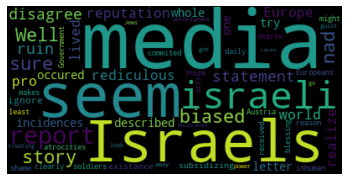

In [20]:
# Text process selects the text from data_samples
text = data_samples[0]

# Wordcloud is created and generated
wordcloud = WordCloud().generate(text)

# Wordcloud is displayed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()